In [1]:
# load some packages
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import glob
from tqdm import tqdm

In [2]:
# timeseries - time step of SP-CESM model run
DS3 = {}

for k in range(2):
    fpath = f'/work/bd1179/from_Mistral/bd1179/b381624/'
    fname = f'CESM2_NN2_pelayout01_ens_07.cam.h1.2013-0[2-6]-*-*.nc' 
    flist = glob.glob(fpath+fname)
    DS3[k] = xr.open_mfdataset(flist, decode_times=False)


In [ ]:
# timeseries - time step of \overline{ANN}-CESM
DS2 = {}

kexp='NOCLDTEND'
for k in range(1):

    fpath = f'../SPCESM_data/Fronterra_runs/Cheyenne_runs/ENS_lin_boost_6_whole_year/'
    fname = f'CESM2_ANNs_ncpl-48_spcam-dt-20_2013-02-01_partial-coupling-NOCLDTEND_ens_lin_ANN_06_boost_whole_year.cam.h{k+3}.2013-0[2-7]-*-*.nc'
    flist = glob.glob(fpath+fname)
    DS2[k] = xr.open_mfdataset(flist, decode_times=False)


In [ ]:
# timeseries - time step of ANN-ens-CESM
DS2_stoch = {}

for k in range(1):

    fpath = f'../SPCESM_data/Fronterra_runs/Cheyenne_runs/stoch_ENS_lin_boost_6_whole_year/'
    fname = f'CESM2_ANNs_lin_ncpl-48_spcam-dt-20_2013-02-01_partial-coupling-NOCLDTEND_ANN_6_boost_sENS_5_whole_year.cam.h{k+3}.2013-0[2-7]-*-*.nc'
    flist = glob.glob(fpath+fname)
    DS2_stoch[k] = xr.open_mfdataset(flist, decode_times=False)



In [ ]:
# timeseries - time step of ZM-CESM
DS_ctr_cam = {}

for k in range(1):
    fpath = f'../SPCESM_data/Fronterra_runs/Cheyenne_runs/CAM_ctr_whole_year/'
    fname = f'CESM2_2013-02-01_ctrl-CAM.cam.h1.2013-0[2-6]-*-*.nc' 
    flist = glob.glob(fpath+fname)
    DS_ctr_cam[k] = xr.open_mfdataset(flist, decode_times=False)


In [ ]:
time_axis=DS2_stoch[0]['time'].values
#np.save('precip_raw_data_Feb_June_13/time_axis',time_axis)

In [3]:
time_axis=np.load('precip_raw_data_Feb_June_13/time_axis.npy')
Feb_JUN=np.where(time_axis<182)[0]


In [4]:
#save precipitation online data 

#!mkdir precip_raw_data_Feb_June_13

#get precip of \overline{ANN}-CESM
precip_ANN_i_CESM_Feb_June=(3600*1000*(DS2[0]['PRECC2'][Feb_JUN])).values
#np.save('precip_raw_data_Feb_June_13/ANN_i_precip_feb_june',precip_ANN_i_CESM_Feb_June)

#get precip of ANN-ens-CESM
precip_ANN_ensemble_CESM_Feb_June=(3600*1000*(DS2_stoch[0]['PRECC2'][Feb_JUN])).values
#np.save('precip_raw_data_Feb_June_13/ANN_ensemble_precip_feb_june',precip_ANN_ensemble_CESM_Feb_June)

#get precip of ZM-CESM
precip_CTRL_CAM_ensemble_CESM_Feb_June=(3600*1000*(DS_ctr_cam[0]['PRECT'][Feb_JUN])).values
#np.save('precip_raw_data_Feb_June_13/CTRL_CESM_precip_feb_june',precip_CTRL_CAM_ensemble_CESM_Feb_June)



NameError: name 'DS2' is not defined

Load saved online precip data 

In [5]:
# \overline{ANN}-CESM
precip_ANN_i_CESM_Feb_June=np.load('precip_raw_data_Feb_June_13/ANN_i_precip_feb_june.npy')
# ANN-ens-CESM
precip_ANN_ens_CESM_Feb_June=np.load('precip_raw_data_Feb_June_13/ANN_ensemble_precip_feb_june.npy')
# ZM-CESM
precip_ANN_ctrl_CESM_Feb_June=np.load('precip_raw_data_Feb_June_13/CTRL_CESM_precip_feb_june.npy')


In [13]:
# and SP-CESM
precip_SP_ref=3600*1000*(DS3[1]['PRECC'][Feb_JUN]).values

In [14]:
precip_SP_ref.shape

(5759, 96, 144)

In [15]:
precip_ANN_ens_CESM_Feb_June.shape

(5759, 96, 144)

In [16]:
precip_ANN_ctrl_CESM_Feb_June.shape

(5759, 96, 144)

In [17]:
# select quantile range from 50th to 95th percentile
quantiles_of_interest=np.arange(50,95.1,1)

In [18]:
# append extreme percentiles
quantiles_of_interest=np.append(quantiles_of_interest,(96,97,97.5,98,98.5,99,99.5,99.9,99.95,99.99,99.999,99.9995,99.9999))

In [19]:
quantiles_of_interest

array([50.    , 51.    , 52.    , 53.    , 54.    , 55.    , 56.    ,
       57.    , 58.    , 59.    , 60.    , 61.    , 62.    , 63.    ,
       64.    , 65.    , 66.    , 67.    , 68.    , 69.    , 70.    ,
       71.    , 72.    , 73.    , 74.    , 75.    , 76.    , 77.    ,
       78.    , 79.    , 80.    , 81.    , 82.    , 83.    , 84.    ,
       85.    , 86.    , 87.    , 88.    , 89.    , 90.    , 91.    ,
       92.    , 93.    , 94.    , 95.    , 96.    , 97.    , 97.5   ,
       98.    , 98.5   , 99.    , 99.5   , 99.9   , 99.95  , 99.99  ,
       99.999 , 99.9995, 99.9999])

In [20]:
def compute_percentiles(precip_data,quantiles):
    """
    compute respective percentile array of gigiven precip data set
    precip_data=data_set
    quantiles=array of selected quantiles
    quantile_value=resp. quantiles of precip_data 
    """
    quantile_value=np.nan*np.zeros(quantiles.size)
    precip_data_flat_=np.reshape(precip_data,((precip_data[:,1,1].size*precip_data[1,:,1].size*precip_data[1,1,:].size,1)))
    
    quantile_value=np.percentile(precip_data_flat_,quantiles)
    
    
    return quantile_value

        

In [21]:
# compute quantiles for SP-CESM
SP_ref_quantile=compute_percentiles(precip_SP_ref,quantiles_of_interest)

In [22]:
print(SP_ref_quantile)

[4.39010808e-03 4.98567531e-03 5.65043052e-03 6.38013544e-03
 7.17913736e-03 8.04290574e-03 8.97836957e-03 9.98557237e-03
 1.10710358e-02 1.22417820e-02 1.35013329e-02 1.48405016e-02
 1.62880962e-02 1.78387721e-02 1.94951623e-02 2.12565873e-02
 2.31326441e-02 2.51354649e-02 2.72724665e-02 2.95748002e-02
 3.20401561e-02 3.47017570e-02 3.75733550e-02 4.06968154e-02
 4.40967624e-02 4.78139584e-02 5.18654694e-02 5.62997329e-02
 6.11678330e-02 6.65767857e-02 7.25837630e-02 7.92834608e-02
 8.68027263e-02 9.52400079e-02 1.04839651e-01 1.15829263e-01
 1.28545108e-01 1.43244329e-01 1.60472444e-01 1.80987748e-01
 2.05806661e-01 2.36550532e-01 2.75251734e-01 3.24939630e-01
 3.89935472e-01 4.77000250e-01 5.98216685e-01 7.74705443e-01
 8.96819732e-01 1.05517026e+00 1.27063396e+00 1.58985437e+00
 2.15840267e+00 3.49264704e+00 4.05930456e+00 5.38189985e+00
 7.34079768e+00 7.92506422e+00 9.41414798e+00]


In [23]:
# compute quantiles for \overline{ANN}-CESM
ANN_i_quantile=compute_percentiles(precip_ANN_i_CESM_Feb_June,quantiles_of_interest)

In [24]:
print(ANN_i_quantile)

[0.03010081 0.03102134 0.03197609 0.03296676 0.03399867 0.03506509
 0.03616043 0.03729336 0.03847379 0.03971313 0.04101939 0.04239242
 0.04383586 0.04535507 0.0469713  0.0486873  0.05050562 0.05243421
 0.05448905 0.0566775  0.0590161  0.06150716 0.06416095 0.06702744
 0.07011029 0.07345689 0.07710391 0.08110676 0.08547283 0.09031033
 0.09563384 0.10149254 0.10799554 0.1152834  0.12347251 0.13274811
 0.14329445 0.15542456 0.16949621 0.18596927 0.20555071 0.22908605
 0.25816807 0.2946143  0.34164559 0.40416494 0.49049627 0.61604281
 0.70307095 0.81558565 0.96933697 1.19820957 1.6162876  2.65139726
 3.11066152 4.24329272 5.91566025 6.43284644 7.6821546 ]


In [25]:
# compute quantiles for ANN-ens-CESM
ANN_ens_quantile=compute_percentiles(precip_ANN_ens_CESM_Feb_June,quantiles_of_interest)

In [26]:
print(ANN_ens_quantile)

[0.03204181 0.03290278 0.03380945 0.03475682 0.0357489  0.03678475
 0.03786804 0.03899613 0.04017285 0.04140199 0.04269535 0.04405463
 0.045484   0.04699417 0.04859382 0.05028456 0.05207708 0.05398078
 0.0560098  0.058165   0.06046494 0.06292696 0.06556431 0.06839466
 0.071454   0.07476682 0.07837393 0.08231339 0.08665728 0.09143284
 0.09670951 0.10253712 0.10900625 0.11623132 0.124379   0.13361852
 0.14415689 0.1562973  0.17036069 0.18688151 0.20654089 0.23031094
 0.25963722 0.29641418 0.34365486 0.40643606 0.49287964 0.61850872
 0.70552798 0.81843302 0.97296582 1.2029765  1.61463287 2.63024963
 3.09934612 4.2655024  5.98712119 6.45419308 7.60778926]


In [27]:
# compute quantiles for ZM-CESM
CAM_ens_quantile=compute_percentiles(precip_ANN_ctrl_CESM_Feb_June,quantiles_of_interest)

In [28]:
print(CAM_ens_quantile)

[0.01187285 0.01279686 0.01378809 0.01483839 0.01595676 0.01716429
 0.01844448 0.01981499 0.02127681 0.02285808 0.02456155 0.02642056
 0.02841782 0.03056419 0.03290812 0.03544753 0.03820044 0.04117994
 0.04441293 0.04787831 0.05161249 0.05561931 0.05992665 0.06452382
 0.06944861 0.07473164 0.08042055 0.08656273 0.09324041 0.10049693
 0.10843228 0.11709557 0.12667389 0.13728088 0.14904403 0.16216976
 0.17693184 0.19353297 0.21233521 0.23380459 0.25848436 0.28707421
 0.32066288 0.36070845 0.40949485 0.47067009 0.55039746 0.66185031
 0.73769137 0.83589795 0.96966183 1.17147766 1.53764056 2.41696242
 2.78256326 3.59915286 5.01005409 5.58623367 7.14032451]


Text(0.5, 1.0, 'Precipitation distribution')

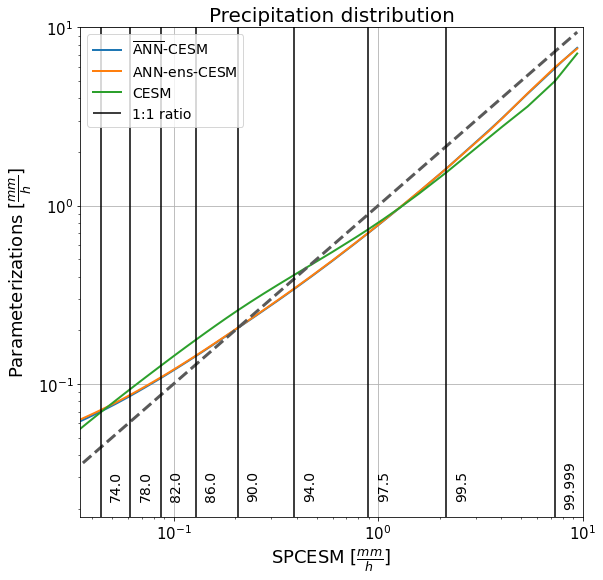

In [99]:
# construct quantile-quantile plot 

plt.figure(1,(9,9))

plt.plot(SP_ref_quantile,ANN_i_quantile,linewidth=2,label=r'$\mathrm{\overline{ANN}}$-CESM')
plt.plot(SP_ref_quantile,ANN_ens_quantile,linewidth=2,label=r'$\mathrm{ANN}$-ens-CESM')
plt.plot(SP_ref_quantile,CAM_ens_quantile,linewidth=2,label='CESM')

plt.plot(SP_ref_quantile,SP_ref_quantile,color=[0.35,0.35,0.35],linestyle='--',linewidth=3)
plt.xscale('log')
plt.yscale('log')
plt.vlines(x=SP_ref_quantile[24:-1:4], ymin=0, ymax=15, color = 'k',label='1:1 ratio')

for i in np.arange(SP_ref_quantile[24:-1:4].size):
    
    plt.text(SP_ref_quantile[24:-1:4][i]+0.1*(SP_ref_quantile[24:-1:4][i]), 0.027,
             str(quantiles_of_interest[24:-1:4][i]),fontsize=14, rotation=90, verticalalignment='center')

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.xlabel(r'SPCESM [$\frac{mm}{h}$]',fontsize=18)

plt.ylabel(r'Parameterizations [$\frac{mm}{h}$]',fontsize=18)

plt.ylim(0.018,10)
plt.xlim(0.035,10)
plt.grid(True)
plt.legend(fontsize=14)
plt.title('Precipitation distribution',fontsize=20)

Text(0.5, 1.0, 'Precipitation distribution')

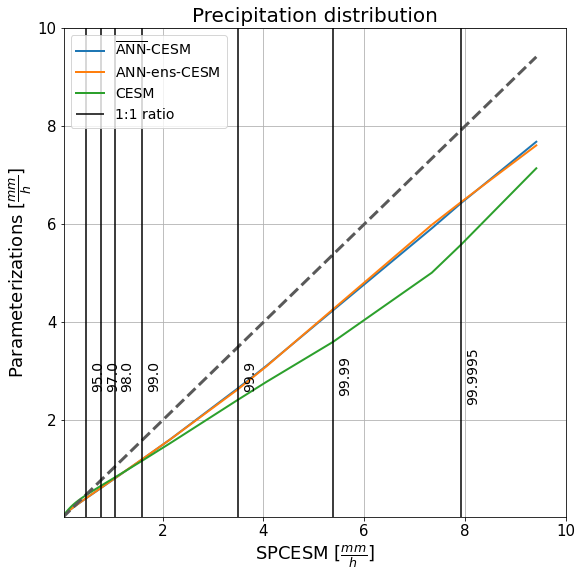

In [32]:
# linear-linear version
plt.figure(1,(9,9))

plt.plot(SP_ref_quantile,ANN_i_quantile,linewidth=2,label=r'$\mathrm{\overline{ANN}}$-CESM')
plt.plot(SP_ref_quantile,ANN_ens_quantile,linewidth=2,label=r'$\mathrm{ANN}$-ens-CESM')
plt.plot(SP_ref_quantile,CAM_ens_quantile,linewidth=2,label='CESM')

plt.plot(SP_ref_quantile,SP_ref_quantile,color=[0.35,0.35,0.35],linestyle='--',linewidth=3)
#plt.xscale('log')
#plt.yscale('log')
plt.vlines(x=SP_ref_quantile[45:-1:2], ymin=0, ymax=15, color = 'k',label='1:1 ratio')

for i in np.arange(SP_ref_quantile[45:-1:2].size):
    
    plt.text(SP_ref_quantile[45:-1:2][i]+0.1, 2.9,
             str(quantiles_of_interest[45:-1:2][i]),fontsize=14, rotation=90, verticalalignment='center')

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.xlabel(r'SPCESM [$\frac{mm}{h}$]',fontsize=18)

plt.ylabel(r'Parameterizations [$\frac{mm}{h}$]',fontsize=18)

plt.ylim(0.018,10)
plt.xlim(0.035,10)
plt.grid(True)
plt.legend(fontsize=14)
plt.title('Precipitation distribution',fontsize=20)

In [29]:
#selected precip bins for histogram

precip_bins=[0,0.02,0.05,0.1,0.2,0.5,1,1.5,2,3,4,5,8]


In [30]:
random_samples_NO=int(10E6) #select 10M samples

In [31]:
precip_ANN_ens_CESM_Feb_June.size

79612416

In [32]:
# select 10 M random samples form all params with identical IDs
a=np.random.choice(np.arange(precip_ANN_ens_CESM_Feb_June.size),random_samples_NO,replace=False)

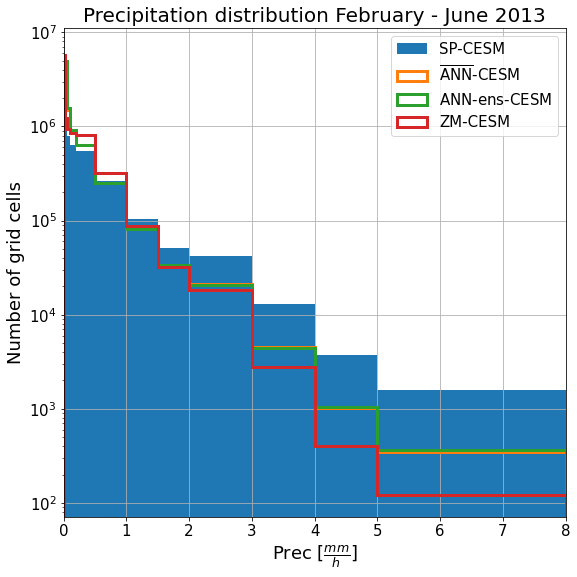

In [12]:
# histogram plot
plt.figure(2,(9,9))
plt.hist(np.ndarray.flatten(precip_SP_ref)[a],bins=precip_bins,label='SP-CESM')
plt.hist(np.ndarray.flatten(precip_ANN_i_CESM_Feb_June)[a],histtype='step',linewidth=3,
         bins=precip_bins,label=r'$\mathrm{\overline{ANN}}$-CESM')
plt.hist(np.ndarray.flatten(precip_ANN_ens_CESM_Feb_June)[a],histtype='step',linewidth=3,
         bins=precip_bins,label=r'$\mathrm{ANN}$-ens-CESM')

plt.hist(np.ndarray.flatten(precip_ANN_ctrl_CESM_Feb_June)[a],histtype='step',linewidth=3,
         bins=precip_bins,label=r'ZM-CESM')

plt.xlim(0,8)
plt.ylabel('Number of grid cells',fontsize=18)
plt.xlabel(r'Prec $[\frac{mm}{h}]$',fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Precipitation distribution February - June 2013',fontsize=20)
#plt.ylim(2E3,3E7)
plt.grid(True)
plt.yscale('log')
plt.legend(fontsize=15)

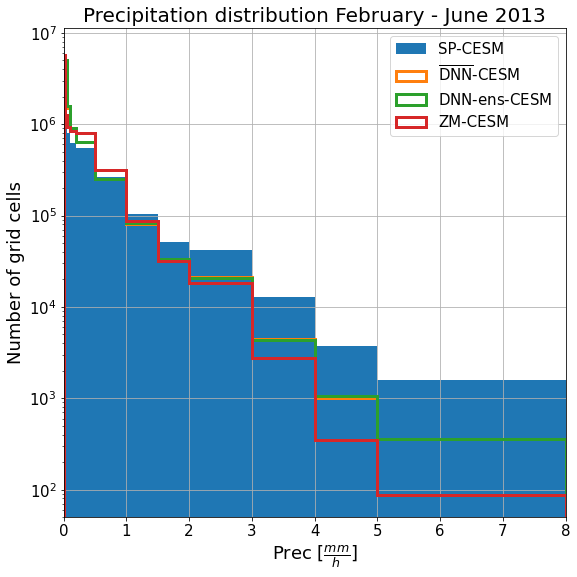

In [33]:
# histogram plot
plt.figure(2,(9,9))
plt.hist(np.ndarray.flatten(precip_SP_ref)[a],bins=precip_bins,label='SP-CESM')
plt.hist(np.ndarray.flatten(precip_ANN_i_CESM_Feb_June)[a],histtype='step',linewidth=3,
         bins=precip_bins,label=r'$\mathrm{\overline{DNN}}$-CESM')
plt.hist(np.ndarray.flatten(precip_ANN_ens_CESM_Feb_June)[a],histtype='step',linewidth=3,
         bins=precip_bins,label=r'$\mathrm{DNN}$-ens-CESM')

plt.hist(np.ndarray.flatten(precip_ANN_ctrl_CESM_Feb_June)[a],histtype='step',linewidth=3,
         bins=precip_bins,label=r'ZM-CESM')

plt.xlim(0,8)
plt.ylabel('Number of grid cells',fontsize=18)
plt.xlabel(r'Prec $[\frac{mm}{h}]$',fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Precipitation distribution February - June 2013',fontsize=20)
#plt.ylim(2E3,3E7)
plt.grid(True)
plt.yscale('log')
plt.legend(fontsize=15)

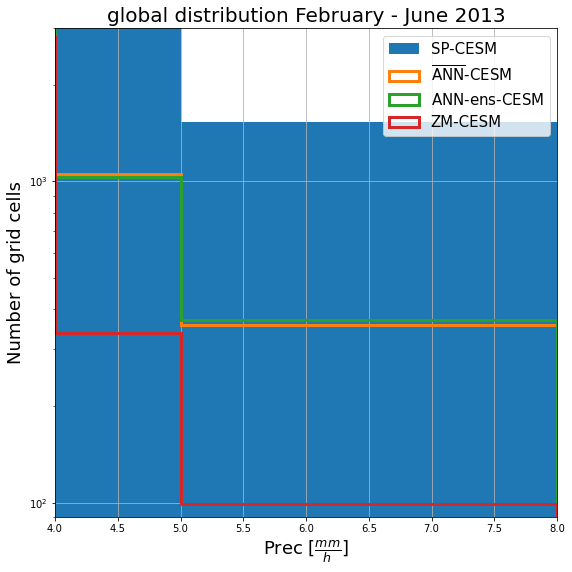

In [29]:
# extreme precip bins 
plt.figure(2,(9,9))
plt.hist(np.ndarray.flatten(precip_SP_ref)[a],bins=precip_bins,label='SP-CESM')
plt.hist(np.ndarray.flatten(precip_ANN_i_CESM_Feb_June)[a],histtype='step',linewidth=3,
         bins=precip_bins,label=r'$\mathrm{\overline{ANN}}$-CESM')
plt.hist(np.ndarray.flatten(precip_ANN_ens_CESM_Feb_June)[a],histtype='step',linewidth=3,
         bins=precip_bins,label=r'$\mathrm{ANN}$-ens-CESM')

plt.hist(np.ndarray.flatten(precip_ANN_ctrl_CESM_Feb_June)[a],histtype='step',linewidth=3,
         bins=precip_bins,label=r'ZM-CESM')

plt.xlim(4,8)
plt.ylabel('Number of grid cells',fontsize=18)
plt.xlabel(r'Prec $[\frac{mm}{h}]$',fontsize=18)
plt.title('global distribution February - June 2013',fontsize=20)
plt.ylim(9E1,3E3)
plt.grid(True)
plt.yscale('log')
plt.legend(fontsize=15)

In [34]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as plb
import matplotlib.image as imag

In [35]:
import cartopy
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import math

import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER


In [36]:
fz = 20
lw = 4
siz = 100

plt.rc('text', usetex=False)
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['font.family'] = 'STIXGeneral'
plt.rc('font', family='serif', size=fz)
mpl.rcParams['lines.linewidth'] = lw


In [37]:
# Create custom colormap following [https://stackoverflow.com/questions/14777066/matplotlib-discrete-colorbar]
def color_map_personalizer(Number_of_Colors,vmin__,vmax__,colorscale):
    
    cmap = mpl.colormaps[colorscale]
    # extract all colors from the .seismic map
    cmaplist = [cmap(i) for i in np.arange(cmap.N)]
    # create the new map
    cmap = mpl.colors.LinearSegmentedColormap.from_list(
    'Custom cmap', cmaplist, cmap.N)
    # define the bins and normalize
    bounds = np.linspace(vmin__, vmax__, Number_of_Colors)
    norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
    return cmap , norm

In [38]:
vmin0 = 0.0
vmax0 = 1.4

In [39]:
vmin0_diff =-0.2
vmax0_diff = 0.2

In [40]:
lat=np.arange(-90,90,180/96)
lon=np.arange(0,360,360/144)

In [41]:
seism_,norm_seism=color_map_personalizer(21,vmin0,vmax0,'Blues')

In [42]:
seism_diff,norm_seism_=color_map_personalizer(21,vmin0_diff,vmax0_diff,'RdBu')

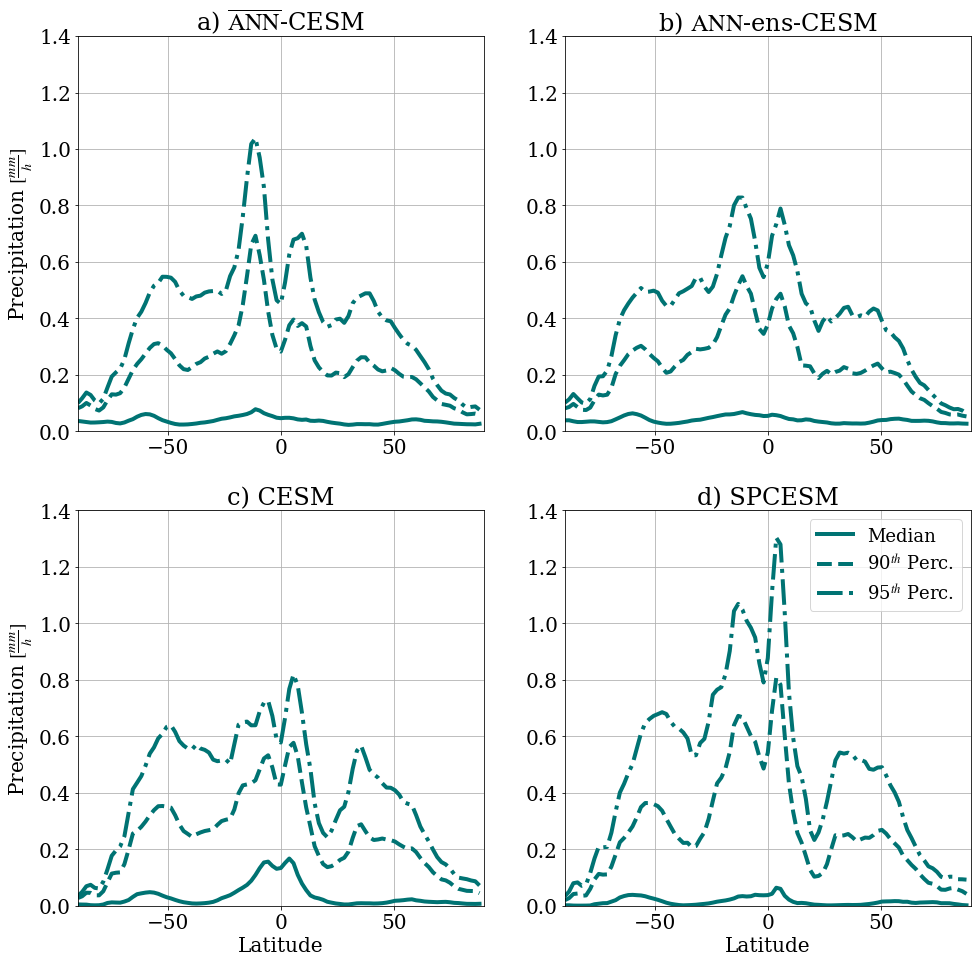

In [54]:
# zonal averages of disctinct percentiles 
plt.figure(1,(16,16))


plt.subplot(2,2,1)

plt.plot(lat,np.mean(np.median(precip_ANN_i_CESM_Feb_June,0),1),color=[0,0.45,0.45])
plt.plot(lat,np.mean(np.percentile(precip_ANN_i_CESM_Feb_June,90,0),1),'--',color=[0,0.45,0.45])
plt.plot(lat,np.mean(np.percentile(precip_ANN_i_CESM_Feb_June,95,0),1),'-.',color=[0,0.45,0.45])
plt.grid(True)
plt.ylim(0,1.4)
plt.xlim(-90,90)
plt.ylabel(r'Precipitation $[\frac{mm}{h}]$')
plt.title('a) $\mathrm{\overline{ANN}}$-CESM')

plt.subplot(2,2,2)

plt.plot(lat,np.mean(np.median(precip_ANN_ens_CESM_Feb_June,0),1),color=[0,0.45,0.45])
plt.plot(lat,np.mean(np.percentile(precip_ANN_ens_CESM_Feb_June,90,0),1),'--',color=[0,0.45,0.45])
plt.plot(lat,np.mean(np.percentile(precip_ANN_ens_CESM_Feb_June,95,0),1),'-.',color=[0,0.45,0.45])
plt.grid(True)
plt.ylim(0,1.4)
plt.xlim(-90,90)
plt.title('b) $\mathrm{ANN}$-ens-CESM')


plt.subplot(2,2,3)

plt.plot(lat,np.mean(np.median(precip_ANN_ctrl_CESM_Feb_June,0),1),color=[0,0.45,0.45])
plt.plot(lat,np.mean(np.percentile(precip_ANN_ctrl_CESM_Feb_June,90,0),1),'--',color=[0,0.45,0.45])
plt.plot(lat,np.mean(np.percentile(precip_ANN_ctrl_CESM_Feb_June,95,0),1),'-.',color=[0,0.45,0.45])
plt.grid(True)
plt.xlabel('Latitude')
plt.ylabel(r'Precipitation $[\frac{mm}{h}]$')
plt.title('c) CESM')
plt.ylim(0,1.4)
plt.xlim(-90,90)



plt.subplot(2,2,4)

plt.plot(lat,np.mean(np.median(precip_SP_ref,0),1),color=[0,0.45,0.45],label='Median')
plt.plot(lat,np.mean(np.percentile(precip_SP_ref,90,0),1),'--',color=[0,0.45,0.45],label='90$^{th}$ Perc.')
plt.plot(lat,np.mean(np.percentile(precip_SP_ref,95,0),1),'-.',color=[0,0.45,0.45],label='95$^{th}$ Perc.')
plt.grid(True)
plt.xlabel('Latitude')
plt.title('d) SPCESM')
plt.ylim(0,1.4)
plt.xlim(-90,90)
plt.legend(fontsize=18)

In [43]:
def uncertain_shuffle(precip_raw,Number_Samples,NO_bootstrap):
    """
    generate uncertainty ranges of percentiles with bootstrapping
    precip_raw=precip data
    Number_Samples=selected subsample size 
    No_bootstrap=number of bootstrap iterations 
    """
    
    shuffle_array=np.nan*np.zeros((NO_bootstrap,Number_Samples,lat.size,lon.size)) 
    
    for i in tqdm(np.arange(NO_bootstrap)):
        random_ID=np.random.choice(precip_raw[:,1,1].size,Number_Samples,replace=False)
        #print(random_ID)
        #print(precip_raw.shape)
        shuffle_array[i]=precip_raw[random_ID,:,:]
        
        
    shuffle_array_median=np.median(shuffle_array,1)
    shuffle_array_90=np.percentile(shuffle_array,90,1)
    shuffle_array_95=np.percentile(shuffle_array,95,1)
    del shuffle_array
    shuffle_array_median_min=np.min(shuffle_array_median,0)
    shuffle_array_median_max=np.max(shuffle_array_median,0)
    
    shuffle_array_90_min=np.min(shuffle_array_90,0)
    shuffle_array_90_max=np.max(shuffle_array_90,0)
    
    shuffle_array_95_min=np.min(shuffle_array_95,0)
    shuffle_array_95_max=np.max(shuffle_array_95,0)
    del shuffle_array_median,shuffle_array_90,shuffle_array_95
    return shuffle_array_median_min,shuffle_array_median_max,shuffle_array_90_min,shuffle_array_90_max,shuffle_array_95_min,shuffle_array_95_max
    
    

In [44]:
# bootstrap uncertainties for SP-CESM
SP_median_min,SP_median_max,SP_90_min,SP_90_max,SP_95_min,SP_95_max=uncertain_shuffle(precip_SP_ref,2000,50)

100%|██████████| 50/50 [00:04<00:00, 11.91it/s]


In [45]:
# bootstrap uncertainties for \overline{ANN}-CESM \ \overline{DNN}-CESM

ANN_i_median_min,ANN_i_median_max,ANN_i_90_min,ANN_i_90_max,ANN_i_95_min,ANN_i_95_max=uncertain_shuffle(precip_ANN_i_CESM_Feb_June,2000,50)

100%|██████████| 50/50 [00:04<00:00, 12.08it/s]


In [46]:
# bootstrap uncertainties for ANN-ens-CESM \ DNN-ens-CESM

ANN_ens_median_min,ANN_ens_median_max,ANN_ens_90_min,ANN_ens_90_max,ANN_ens_95_min,ANN_ens_95_max=uncertain_shuffle(precip_ANN_ens_CESM_Feb_June,2000,50)

100%|██████████| 50/50 [00:04<00:00, 11.92it/s]


In [47]:
# bootstrap uncertainties for ZM-CESM

ZM_median_min,ZM_median_max,ZM_90_min,ZM_90_max,ZM_95_min,ZM_95_max=uncertain_shuffle(precip_ANN_ctrl_CESM_Feb_June,2000,50)

100%|██████████| 50/50 [00:04<00:00, 12.12it/s]


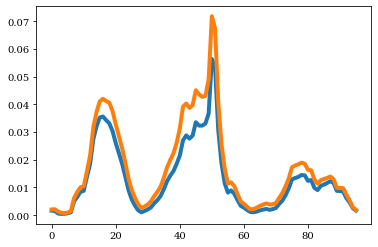

In [50]:
plt.plot(np.mean(SP_median_min,1))
plt.plot(np.mean(SP_median_max,1))

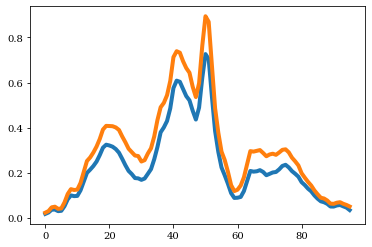

In [51]:
plt.plot(np.mean(SP_90_min,1))
plt.plot(np.mean(SP_90_max,1))

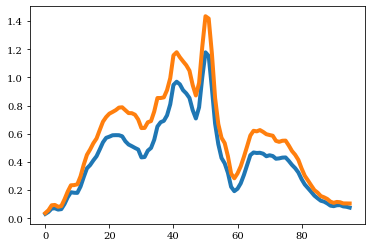

In [52]:
plt.plot(np.mean(SP_95_min,1))
plt.plot(np.mean(SP_95_max,1))

Text(0.5, 1.0, 'd) Overall Precipitation distribution')

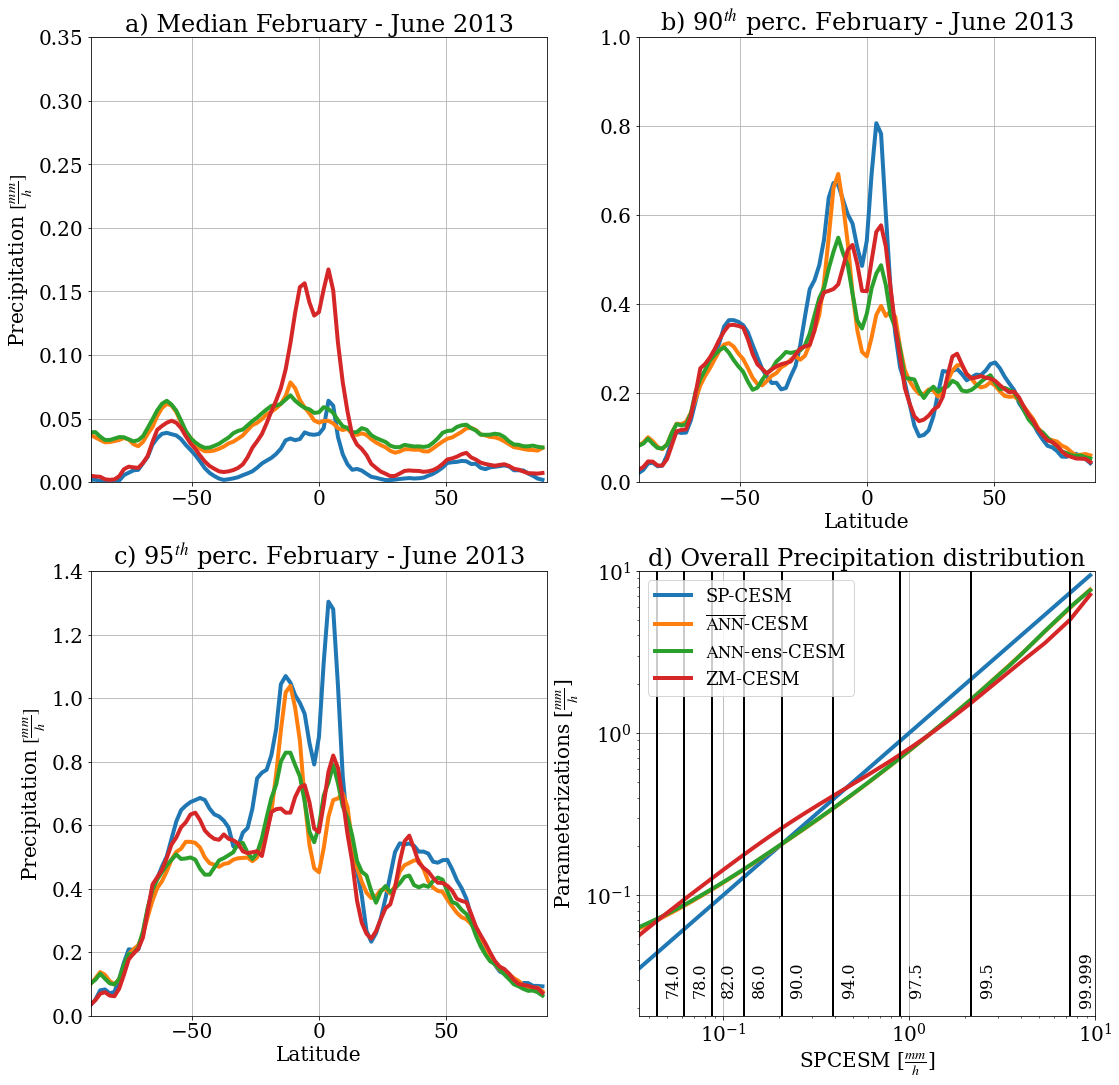

In [43]:
#plot zonal averages and quantile-quantile diagram

plt.figure(1,(18,18))


plt.subplot(2,2,1)

plt.plot(lat,np.mean(np.median(precip_SP_ref,0),1))
plt.plot(lat,np.mean(np.median(precip_ANN_i_CESM_Feb_June,0),1))
plt.plot(lat,np.mean(np.median(precip_ANN_ens_CESM_Feb_June,0),1))
plt.plot(lat,np.mean(np.median(precip_ANN_ctrl_CESM_Feb_June,0),1))
plt.grid(True)
plt.ylim(0,0.35)
plt.xlim(-90,90)
plt.ylabel(r'Precipitation $[\frac{mm}{h}]$')
plt.title('a) Median February - June 2013')

plt.subplot(2,2,2)

plt.plot(lat,np.mean(np.percentile(precip_SP_ref,90,0),1))
plt.plot(lat,np.mean(np.percentile(precip_ANN_i_CESM_Feb_June,90,0),1))
plt.plot(lat,np.mean(np.percentile(precip_ANN_ens_CESM_Feb_June,90,0),1))
plt.plot(lat,np.mean(np.percentile(precip_ANN_ctrl_CESM_Feb_June,90,0),1))
plt.grid(True)
plt.ylim(0,1.0)
plt.xlim(-90,90)
plt.xlabel('Latitude')

plt.title(r'b) 90$^{th}$ perc. February - June 2013')


plt.subplot(2,2,3)

plt.plot(lat,np.mean(np.percentile(precip_SP_ref,95,0),1))
plt.plot(lat,np.mean(np.percentile(precip_ANN_i_CESM_Feb_June,95,0),1))
plt.plot(lat,np.mean(np.percentile(precip_ANN_ens_CESM_Feb_June,95,0),1))
plt.plot(lat,np.mean(np.percentile(precip_ANN_ctrl_CESM_Feb_June,95,0),1))
plt.grid(True)
plt.xlabel('Latitude')
plt.ylabel(r'Precipitation $[\frac{mm}{h}]$')
plt.title(r'c) 95$^{th}$ perc. February - June 2013')
plt.ylim(0,1.4)
plt.xlim(-90,90)



plt.subplot(2,2,4)


plt.plot(SP_ref_quantile,SP_ref_quantile,label='SP-CESM')
plt.plot(SP_ref_quantile,ANN_i_quantile,label=r'$\mathrm{\overline{ANN}}$-CESM')
plt.plot(SP_ref_quantile,ANN_ens_quantile,label=r'$\mathrm{ANN}$-ens-CESM')
plt.plot(SP_ref_quantile,CAM_ens_quantile,label='ZM-CESM')

plt.xscale('log')
plt.yscale('log')
plt.vlines(x=SP_ref_quantile[24:-1:4], ymin=0, ymax=15,linewidth=2, color = 'k')

for i in np.arange(SP_ref_quantile[24:-1:4].size):
    
    plt.text(SP_ref_quantile[24:-1:4][i]+0.1*(SP_ref_quantile[24:-1:4][i]), 0.03,
             str(quantiles_of_interest[24:-1:4][i]),fontsize=16, rotation=90, verticalalignment='center')

#plt.xticks(fontsize=15)
#plt.yticks(fontsize=15)

plt.xlabel(r'SPCESM [$\frac{mm}{h}$]')

plt.ylabel(r'Parameterizations [$\frac{mm}{h}$]')

plt.ylim(0.018,10)
plt.xlim(0.035,10)
plt.grid(True)
plt.legend(fontsize=18)
plt.title('d) Overall Precipitation distribution')

Text(0.5, 1.0, 'd) Overall Precipitation distribution')

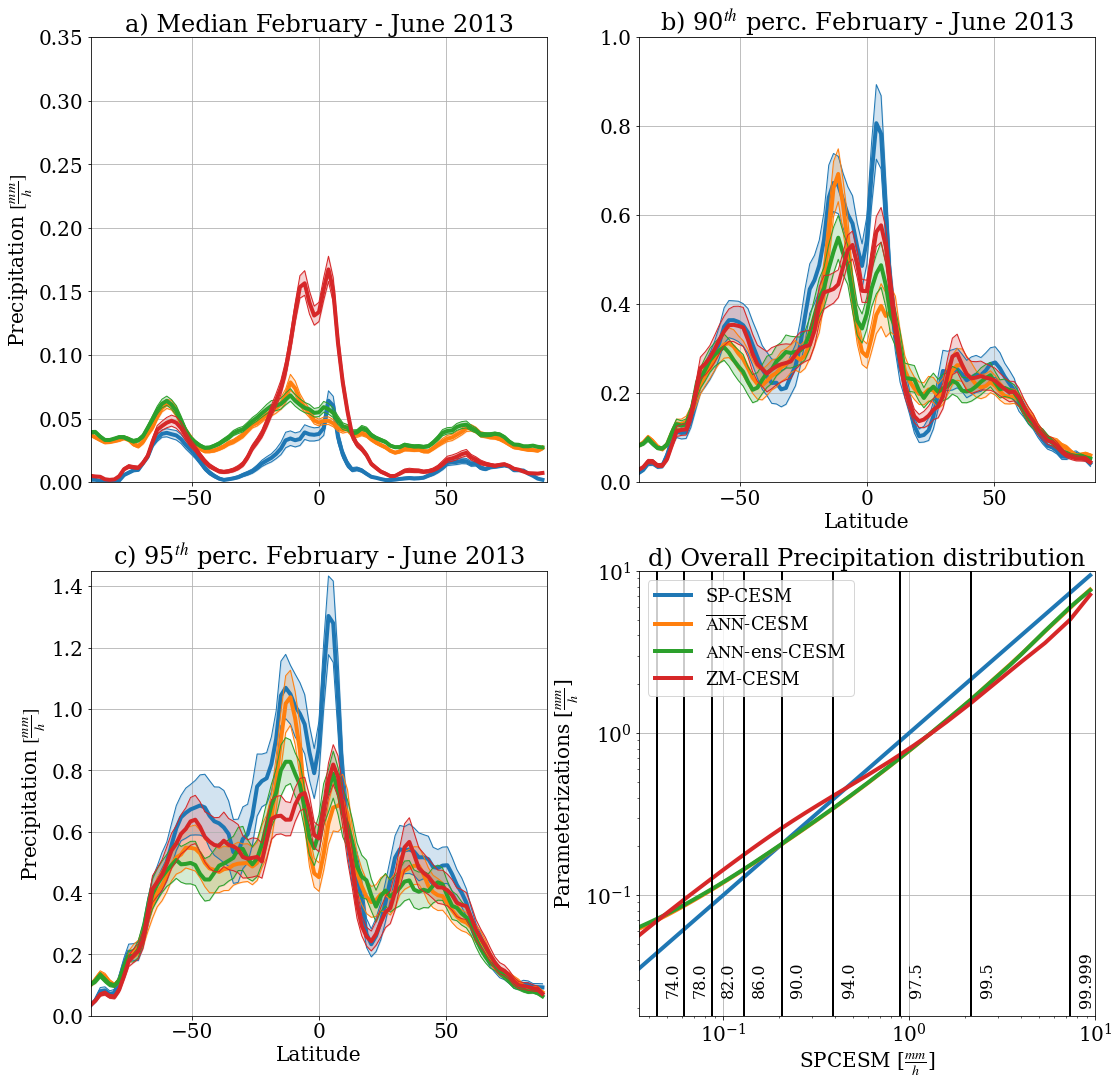

In [77]:
#plot zonal averages with uncertainties and quantile-quantile diagram


plt.figure(1,(18,18))


plt.subplot(2,2,1)

plt.plot(lat,np.mean(np.median(precip_SP_ref,0),1))
plt.plot(lat,np.mean(SP_median_min,1),linewidth=1,color='#1f77b4')
plt.plot(lat,np.mean(SP_median_max,1),linewidth=1,color='#1f77b4')
plt.fill_between(lat,np.mean(SP_median_min,1),np.mean(SP_median_max,1),color='#1f77b4',alpha=0.2)

plt.plot(lat,np.mean(np.median(precip_ANN_i_CESM_Feb_June,0),1))

plt.plot(lat,np.mean(ANN_i_median_min,1),linewidth=1,color='#ff7f0e')
plt.plot(lat,np.mean(ANN_i_median_max,1),linewidth=1,color='#ff7f0e')
plt.fill_between(lat,np.mean(ANN_i_median_min,1),np.mean(ANN_i_median_max,1),color='#ff7f0e',alpha=0.2)



plt.plot(lat,np.mean(np.median(precip_ANN_ens_CESM_Feb_June,0),1))
plt.plot(lat,np.mean(ANN_ens_median_min,1),linewidth=1,color='#2ca02c')
plt.plot(lat,np.mean(ANN_ens_median_max,1),linewidth=1,color='#2ca02c')
plt.fill_between(lat,np.mean(ANN_ens_median_min,1),np.mean(ANN_ens_median_max,1),color='#2ca02c',alpha=0.2)



plt.plot(lat,np.mean(np.median(precip_ANN_ctrl_CESM_Feb_June,0),1))
plt.plot(lat,np.mean(ZM_median_min,1),linewidth=1,color='#d62728')
plt.plot(lat,np.mean(ZM_median_max,1),linewidth=1,color='#d62728')
plt.fill_between(lat,np.mean(ZM_median_min,1),np.mean(ZM_median_max,1),color='#d62728',alpha=0.2)



plt.grid(True)
plt.ylim(0,0.35)
plt.xlim(-90,90)
plt.ylabel(r'Precipitation $[\frac{mm}{h}]$')
plt.title('a) Median February - June 2013')

plt.subplot(2,2,2)

plt.plot(lat,np.mean(np.percentile(precip_SP_ref,90,0),1))
plt.plot(lat,np.mean(SP_90_min,1),linewidth=1,color='#1f77b4')
plt.plot(lat,np.mean(SP_90_max,1),linewidth=1,color='#1f77b4')
plt.fill_between(lat,np.mean(SP_90_min,1),np.mean(SP_90_max,1),color='#1f77b4',alpha=0.2)


plt.plot(lat,np.mean(np.percentile(precip_ANN_i_CESM_Feb_June,90,0),1))
plt.plot(lat,np.mean(ANN_i_90_min,1),linewidth=1,color='#ff7f0e')
plt.plot(lat,np.mean(ANN_i_90_max,1),linewidth=1,color='#ff7f0e')
plt.fill_between(lat,np.mean(ANN_i_90_min,1),np.mean(ANN_i_90_max,1),color='#ff7f0e',alpha=0.2)




plt.plot(lat,np.mean(np.percentile(precip_ANN_ens_CESM_Feb_June,90,0),1))
plt.plot(lat,np.mean(ANN_ens_90_min,1),linewidth=1,color='#2ca02c')
plt.plot(lat,np.mean(ANN_ens_90_max,1),linewidth=1,color='#2ca02c')
plt.fill_between(lat,np.mean(ANN_ens_90_min,1),np.mean(ANN_ens_90_max,1),color='#2ca02c',alpha=0.2)



plt.plot(lat,np.mean(np.percentile(precip_ANN_ctrl_CESM_Feb_June,90,0),1))
plt.plot(lat,np.mean(ZM_90_min,1),linewidth=1,color='#d62728')
plt.plot(lat,np.mean(ZM_90_max,1),linewidth=1,color='#d62728')
plt.fill_between(lat,np.mean(ZM_90_min,1),np.mean(ZM_90_max,1),color='#d62728',alpha=0.2)



plt.grid(True)
plt.ylim(0,1.0)
plt.xlim(-90,90)
plt.xlabel('Latitude')

plt.title(r'b) 90$^{th}$ perc. February - June 2013')


plt.subplot(2,2,3)

plt.plot(lat,np.mean(np.percentile(precip_SP_ref,95,0),1))
plt.plot(lat,np.mean(SP_95_min,1),linewidth=1,color='#1f77b4')
plt.plot(lat,np.mean(SP_95_max,1),linewidth=1,color='#1f77b4')
plt.fill_between(lat,np.mean(SP_95_min,1),np.mean(SP_95_max,1),color='#1f77b4',alpha=0.2)

plt.plot(lat,np.mean(np.percentile(precip_ANN_i_CESM_Feb_June,95,0),1))
plt.plot(lat,np.mean(ANN_i_95_min,1),linewidth=1,color='#ff7f0e')
plt.plot(lat,np.mean(ANN_i_95_max,1),linewidth=1,color='#ff7f0e')
plt.fill_between(lat,np.mean(ANN_i_95_min,1),np.mean(ANN_i_95_max,1),color='#ff7f0e',alpha=0.2)




plt.plot(lat,np.mean(np.percentile(precip_ANN_ens_CESM_Feb_June,95,0),1))
plt.plot(lat,np.mean(ANN_ens_95_min,1),linewidth=1,color='#2ca02c')
plt.plot(lat,np.mean(ANN_ens_95_max,1),linewidth=1,color='#2ca02c')
plt.fill_between(lat,np.mean(ANN_ens_95_min,1),np.mean(ANN_ens_95_max,1),color='#2ca02c',alpha=0.2)



plt.plot(lat,np.mean(np.percentile(precip_ANN_ctrl_CESM_Feb_June,95,0),1))
plt.plot(lat,np.mean(ZM_95_min,1),linewidth=1,color='#d62728')
plt.plot(lat,np.mean(ZM_95_max,1),linewidth=1,color='#d62728')
plt.fill_between(lat,np.mean(ZM_95_min,1),np.mean(ZM_95_max,1),color='#d62728',alpha=0.2)



plt.grid(True)
plt.xlabel('Latitude')
plt.ylabel(r'Precipitation $[\frac{mm}{h}]$')
plt.title(r'c) 95$^{th}$ perc. February - June 2013')
plt.ylim(0,1.45)
plt.xlim(-90,90)



plt.subplot(2,2,4)


plt.plot(SP_ref_quantile,SP_ref_quantile,label='SP-CESM')
plt.plot(SP_ref_quantile,ANN_i_quantile,label=r'$\mathrm{\overline{ANN}}$-CESM')
plt.plot(SP_ref_quantile,ANN_ens_quantile,label=r'$\mathrm{ANN}$-ens-CESM')
plt.plot(SP_ref_quantile,CAM_ens_quantile,label='ZM-CESM')

plt.xscale('log')
plt.yscale('log')
plt.vlines(x=SP_ref_quantile[24:-1:4], ymin=0, ymax=15,linewidth=2, color = 'k')

for i in np.arange(SP_ref_quantile[24:-1:4].size):
    
    plt.text(SP_ref_quantile[24:-1:4][i]+0.1*(SP_ref_quantile[24:-1:4][i]), 0.03,
             str(quantiles_of_interest[24:-1:4][i]),fontsize=16, rotation=90, verticalalignment='center')

#plt.xticks(fontsize=15)
#plt.yticks(fontsize=15)

plt.xlabel(r'SPCESM [$\frac{mm}{h}$]')

plt.ylabel(r'Parameterizations [$\frac{mm}{h}$]')

plt.ylim(0.018,10)
plt.xlim(0.035,10)
plt.grid(True)
plt.legend(fontsize=18)
plt.title('d) Overall Precipitation distribution')

Text(0.5, 1.0, 'd) Overall Precipitation distribution')

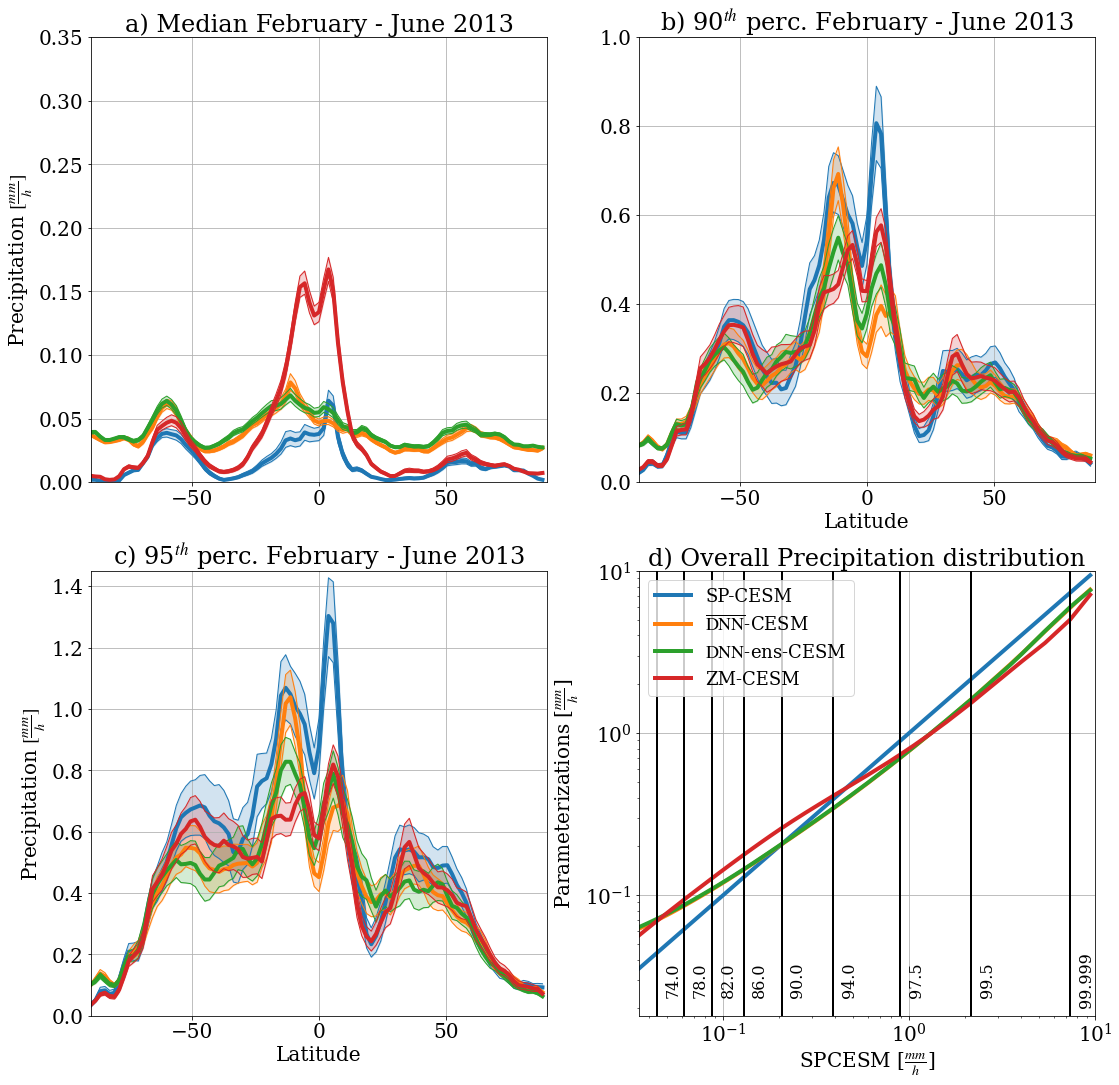

In [48]:
#plot zonal averages with uncertainties and quantile-quantile diagram


plt.figure(1,(18,18))


plt.subplot(2,2,1)

plt.plot(lat,np.mean(np.median(precip_SP_ref,0),1))
plt.plot(lat,np.mean(SP_median_min,1),linewidth=1,color='#1f77b4')
plt.plot(lat,np.mean(SP_median_max,1),linewidth=1,color='#1f77b4')
plt.fill_between(lat,np.mean(SP_median_min,1),np.mean(SP_median_max,1),color='#1f77b4',alpha=0.2)

plt.plot(lat,np.mean(np.median(precip_ANN_i_CESM_Feb_June,0),1))

plt.plot(lat,np.mean(ANN_i_median_min,1),linewidth=1,color='#ff7f0e')
plt.plot(lat,np.mean(ANN_i_median_max,1),linewidth=1,color='#ff7f0e')
plt.fill_between(lat,np.mean(ANN_i_median_min,1),np.mean(ANN_i_median_max,1),color='#ff7f0e',alpha=0.2)



plt.plot(lat,np.mean(np.median(precip_ANN_ens_CESM_Feb_June,0),1))
plt.plot(lat,np.mean(ANN_ens_median_min,1),linewidth=1,color='#2ca02c')
plt.plot(lat,np.mean(ANN_ens_median_max,1),linewidth=1,color='#2ca02c')
plt.fill_between(lat,np.mean(ANN_ens_median_min,1),np.mean(ANN_ens_median_max,1),color='#2ca02c',alpha=0.2)



plt.plot(lat,np.mean(np.median(precip_ANN_ctrl_CESM_Feb_June,0),1))
plt.plot(lat,np.mean(ZM_median_min,1),linewidth=1,color='#d62728')
plt.plot(lat,np.mean(ZM_median_max,1),linewidth=1,color='#d62728')
plt.fill_between(lat,np.mean(ZM_median_min,1),np.mean(ZM_median_max,1),color='#d62728',alpha=0.2)



plt.grid(True)
plt.ylim(0,0.35)
plt.xlim(-90,90)
plt.ylabel(r'Precipitation $[\frac{mm}{h}]$')
plt.title('a) Median February - June 2013')

plt.subplot(2,2,2)

plt.plot(lat,np.mean(np.percentile(precip_SP_ref,90,0),1))
plt.plot(lat,np.mean(SP_90_min,1),linewidth=1,color='#1f77b4')
plt.plot(lat,np.mean(SP_90_max,1),linewidth=1,color='#1f77b4')
plt.fill_between(lat,np.mean(SP_90_min,1),np.mean(SP_90_max,1),color='#1f77b4',alpha=0.2)


plt.plot(lat,np.mean(np.percentile(precip_ANN_i_CESM_Feb_June,90,0),1))
plt.plot(lat,np.mean(ANN_i_90_min,1),linewidth=1,color='#ff7f0e')
plt.plot(lat,np.mean(ANN_i_90_max,1),linewidth=1,color='#ff7f0e')
plt.fill_between(lat,np.mean(ANN_i_90_min,1),np.mean(ANN_i_90_max,1),color='#ff7f0e',alpha=0.2)




plt.plot(lat,np.mean(np.percentile(precip_ANN_ens_CESM_Feb_June,90,0),1))
plt.plot(lat,np.mean(ANN_ens_90_min,1),linewidth=1,color='#2ca02c')
plt.plot(lat,np.mean(ANN_ens_90_max,1),linewidth=1,color='#2ca02c')
plt.fill_between(lat,np.mean(ANN_ens_90_min,1),np.mean(ANN_ens_90_max,1),color='#2ca02c',alpha=0.2)



plt.plot(lat,np.mean(np.percentile(precip_ANN_ctrl_CESM_Feb_June,90,0),1))
plt.plot(lat,np.mean(ZM_90_min,1),linewidth=1,color='#d62728')
plt.plot(lat,np.mean(ZM_90_max,1),linewidth=1,color='#d62728')
plt.fill_between(lat,np.mean(ZM_90_min,1),np.mean(ZM_90_max,1),color='#d62728',alpha=0.2)



plt.grid(True)
plt.ylim(0,1.0)
plt.xlim(-90,90)
plt.xlabel('Latitude')

plt.title(r'b) 90$^{th}$ perc. February - June 2013')


plt.subplot(2,2,3)

plt.plot(lat,np.mean(np.percentile(precip_SP_ref,95,0),1))
plt.plot(lat,np.mean(SP_95_min,1),linewidth=1,color='#1f77b4')
plt.plot(lat,np.mean(SP_95_max,1),linewidth=1,color='#1f77b4')
plt.fill_between(lat,np.mean(SP_95_min,1),np.mean(SP_95_max,1),color='#1f77b4',alpha=0.2)

plt.plot(lat,np.mean(np.percentile(precip_ANN_i_CESM_Feb_June,95,0),1))
plt.plot(lat,np.mean(ANN_i_95_min,1),linewidth=1,color='#ff7f0e')
plt.plot(lat,np.mean(ANN_i_95_max,1),linewidth=1,color='#ff7f0e')
plt.fill_between(lat,np.mean(ANN_i_95_min,1),np.mean(ANN_i_95_max,1),color='#ff7f0e',alpha=0.2)




plt.plot(lat,np.mean(np.percentile(precip_ANN_ens_CESM_Feb_June,95,0),1))
plt.plot(lat,np.mean(ANN_ens_95_min,1),linewidth=1,color='#2ca02c')
plt.plot(lat,np.mean(ANN_ens_95_max,1),linewidth=1,color='#2ca02c')
plt.fill_between(lat,np.mean(ANN_ens_95_min,1),np.mean(ANN_ens_95_max,1),color='#2ca02c',alpha=0.2)



plt.plot(lat,np.mean(np.percentile(precip_ANN_ctrl_CESM_Feb_June,95,0),1))
plt.plot(lat,np.mean(ZM_95_min,1),linewidth=1,color='#d62728')
plt.plot(lat,np.mean(ZM_95_max,1),linewidth=1,color='#d62728')
plt.fill_between(lat,np.mean(ZM_95_min,1),np.mean(ZM_95_max,1),color='#d62728',alpha=0.2)



plt.grid(True)
plt.xlabel('Latitude')
plt.ylabel(r'Precipitation $[\frac{mm}{h}]$')
plt.title(r'c) 95$^{th}$ perc. February - June 2013')
plt.ylim(0,1.45)
plt.xlim(-90,90)



plt.subplot(2,2,4)


plt.plot(SP_ref_quantile,SP_ref_quantile,label='SP-CESM')
plt.plot(SP_ref_quantile,ANN_i_quantile,label=r'$\mathrm{\overline{DNN}}$-CESM')
plt.plot(SP_ref_quantile,ANN_ens_quantile,label=r'$\mathrm{DNN}$-ens-CESM')
plt.plot(SP_ref_quantile,CAM_ens_quantile,label='ZM-CESM')

plt.xscale('log')
plt.yscale('log')
plt.vlines(x=SP_ref_quantile[24:-1:4], ymin=0, ymax=15,linewidth=2, color = 'k')

for i in np.arange(SP_ref_quantile[24:-1:4].size):
    
    plt.text(SP_ref_quantile[24:-1:4][i]+0.1*(SP_ref_quantile[24:-1:4][i]), 0.03,
             str(quantiles_of_interest[24:-1:4][i]),fontsize=16, rotation=90, verticalalignment='center')

#plt.xticks(fontsize=15)
#plt.yticks(fontsize=15)

plt.xlabel(r'SPCESM [$\frac{mm}{h}$]')

plt.ylabel(r'Parameterizations [$\frac{mm}{h}$]')

plt.ylim(0.018,10)
plt.xlim(0.035,10)
plt.grid(True)
plt.legend(fontsize=18)
plt.title('d) Overall Precipitation distribution')

Other versions of plot 

In [46]:
x_ticks=np.sin(np.deg2rad([-90,-45,-30,0,30,45,90]))

In [47]:
x_label=["-90","-45","-30","0","30","45","90"]

Text(0.5, 1.0, 'd) Overall Precipitation distribution')

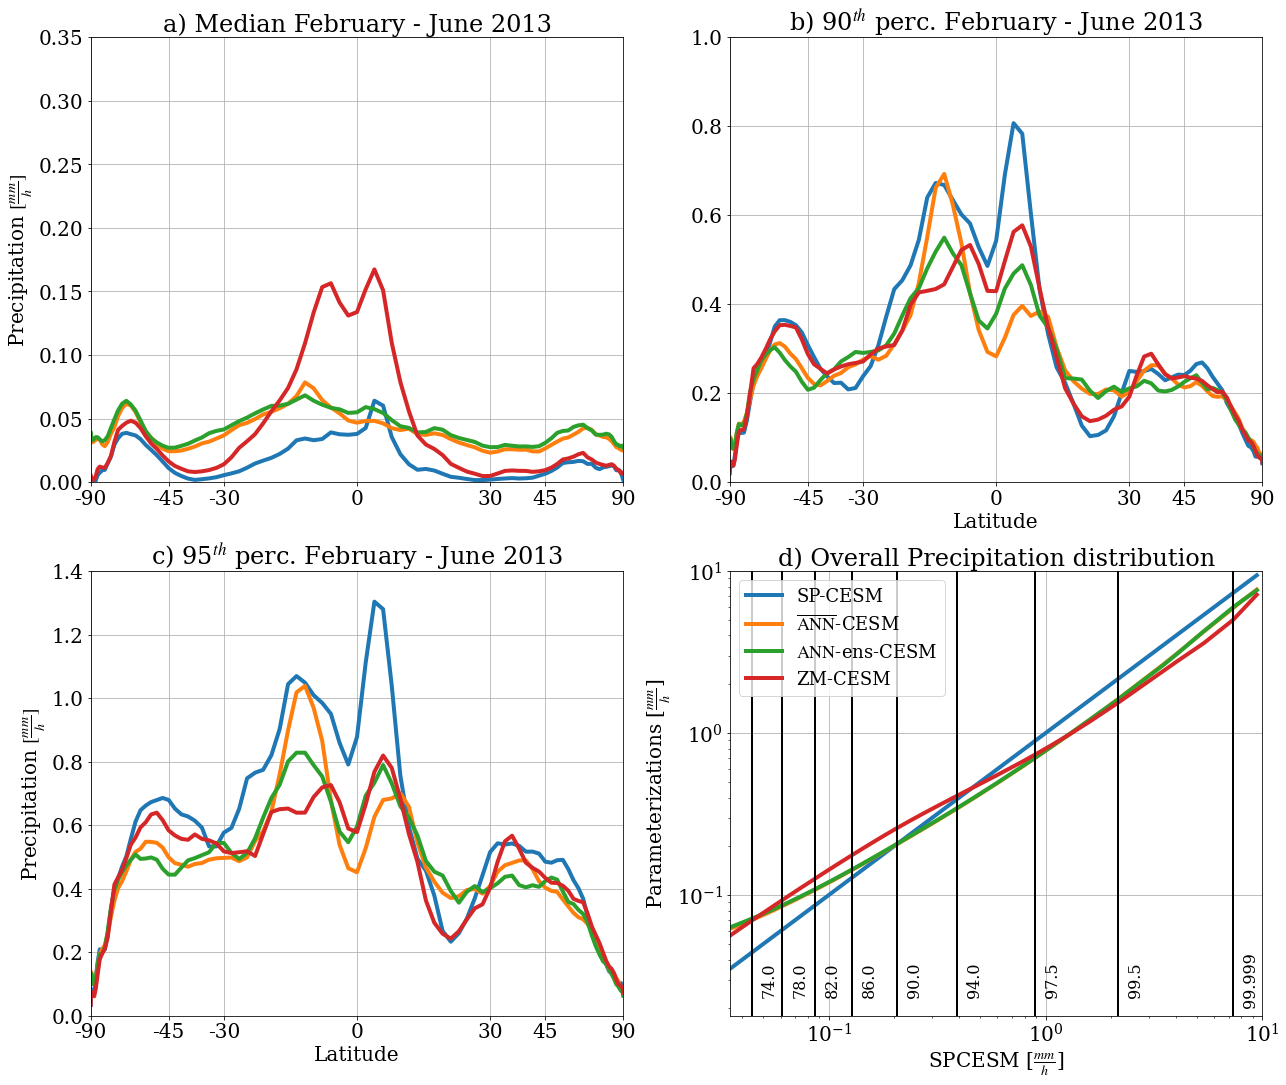

In [48]:
plt.figure(1,(21,18))


plt.subplot(2,2,1)

plt.plot(np.sin(np.deg2rad(lat)),np.mean(np.median(precip_SP_ref,0),1))
plt.plot(np.sin(np.deg2rad(lat)),np.mean(np.median(precip_ANN_i_CESM_Feb_June,0),1))
plt.plot(np.sin(np.deg2rad(lat)),np.mean(np.median(precip_ANN_ens_CESM_Feb_June,0),1))
plt.plot(np.sin(np.deg2rad(lat)),np.mean(np.median(precip_ANN_ctrl_CESM_Feb_June,0),1))
plt.grid(True)
plt.ylim(0,0.35)
plt.xticks(x_ticks,labels=x_label)
plt.xlim(-1,1)

#plt.xlim(-90,90)
plt.ylabel(r'Precipitation $[\frac{mm}{h}]$')
plt.title('a) Median February - June 2013')

plt.subplot(2,2,2)

plt.plot(np.sin(np.deg2rad(lat)),np.mean(np.percentile(precip_SP_ref,90,0),1))
plt.plot(np.sin(np.deg2rad(lat)),np.mean(np.percentile(precip_ANN_i_CESM_Feb_June,90,0),1))
plt.plot(np.sin(np.deg2rad(lat)),np.mean(np.percentile(precip_ANN_ens_CESM_Feb_June,90,0),1))
plt.plot(np.sin(np.deg2rad(lat)),np.mean(np.percentile(precip_ANN_ctrl_CESM_Feb_June,90,0),1))
plt.grid(True)
plt.ylim(0,1.0)
plt.xticks(x_ticks,labels=x_label)
plt.xlim(-1,1)
#plt.xlim(-90,90)
plt.xlabel('Latitude')

plt.title(r'b) 90$^{th}$ perc. February - June 2013')


plt.subplot(2,2,3)

plt.plot(np.sin(np.deg2rad(lat)),np.mean(np.percentile(precip_SP_ref,95,0),1))
plt.plot(np.sin(np.deg2rad(lat)),np.mean(np.percentile(precip_ANN_i_CESM_Feb_June,95,0),1))
plt.plot(np.sin(np.deg2rad(lat)),np.mean(np.percentile(precip_ANN_ens_CESM_Feb_June,95,0),1))
plt.plot(np.sin(np.deg2rad(lat)),np.mean(np.percentile(precip_ANN_ctrl_CESM_Feb_June,95,0),1))
plt.grid(True)
plt.xlabel('Latitude')
plt.ylabel(r'Precipitation $[\frac{mm}{h}]$')
plt.title(r'c) 95$^{th}$ perc. February - June 2013')
plt.ylim(0,1.4)
plt.xlim(-1,1)

plt.xticks(x_ticks,labels=x_label)

#plt.xlim(-90,90)



plt.subplot(2,2,4)


plt.plot(SP_ref_quantile,SP_ref_quantile,label='SP-CESM')
plt.plot(SP_ref_quantile,ANN_i_quantile,label=r'$\mathrm{\overline{ANN}}$-CESM')
plt.plot(SP_ref_quantile,ANN_ens_quantile,label=r'$\mathrm{ANN}$-ens-CESM')
plt.plot(SP_ref_quantile,CAM_ens_quantile,label='ZM-CESM')

plt.xscale('log')
plt.yscale('log')
plt.vlines(x=SP_ref_quantile[24:-1:4], ymin=0, ymax=15,linewidth=2, color = 'k')

for i in np.arange(SP_ref_quantile[24:-1:4].size):
    
    plt.text(SP_ref_quantile[24:-1:4][i]+0.1*(SP_ref_quantile[24:-1:4][i]), 0.03,
             str(quantiles_of_interest[24:-1:4][i]),fontsize=16, rotation=90, verticalalignment='center')

#plt.xticks(fontsize=15)
#plt.yticks(fontsize=15)

plt.xlabel(r'SPCESM [$\frac{mm}{h}$]')

plt.ylabel(r'Parameterizations [$\frac{mm}{h}$]')

plt.ylim(0.018,10)
plt.xlim(0.035,10)
plt.grid(True)
plt.legend(fontsize=18)
plt.title('d) Overall Precipitation distribution')

Text(0.5, 1.0, 'd) Overall Precipitation distribution')

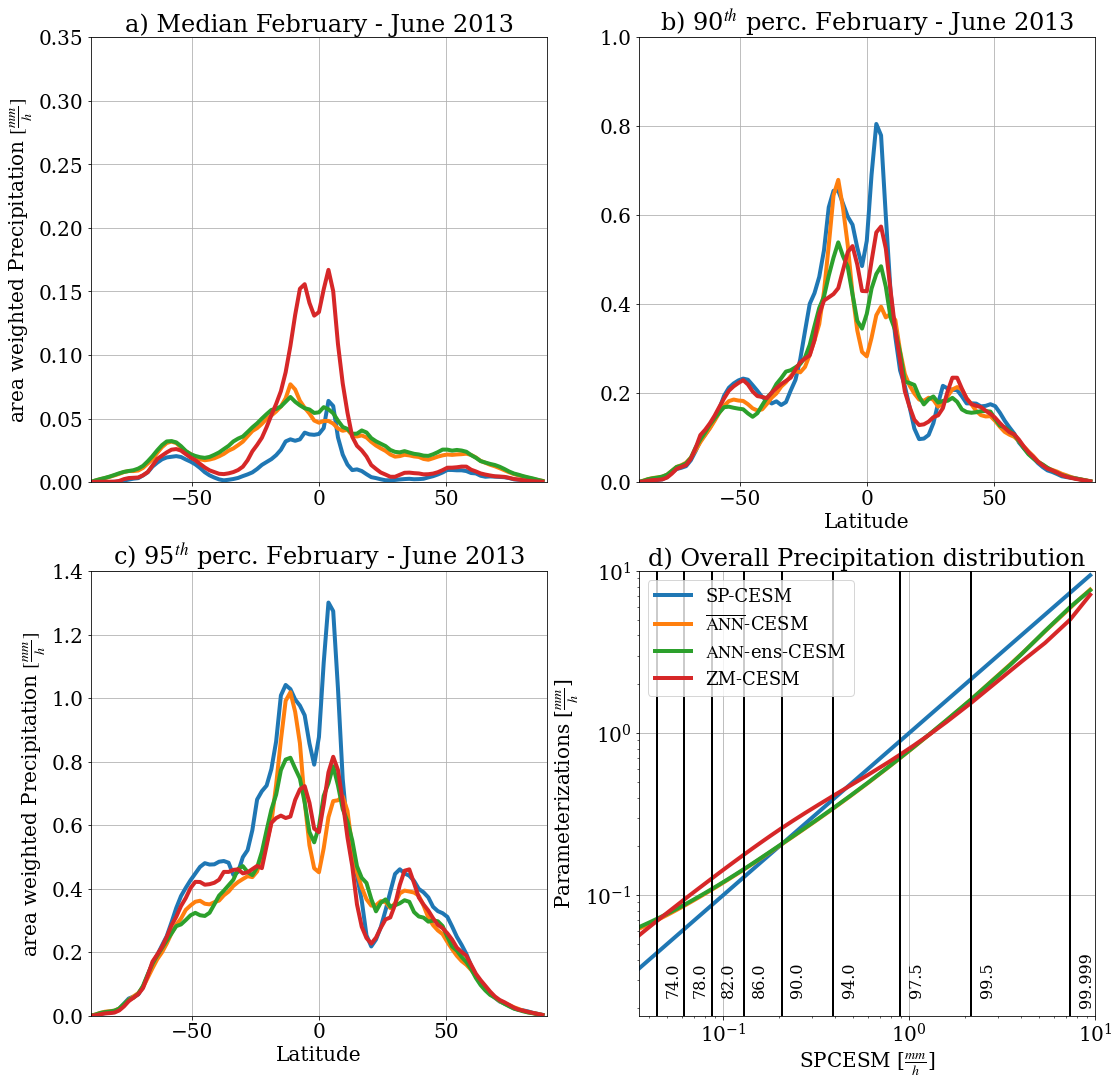

In [42]:
plt.figure(1,(18,18))


plt.subplot(2,2,1)

plt.plot(lat,np.mean(np.median(precip_SP_ref,0)*np.cos(np.deg2rad(lat*np.ones((1,1)))).T,1))
plt.plot(lat,np.mean(np.median(precip_ANN_i_CESM_Feb_June,0)*np.cos(np.deg2rad(lat*np.ones((1,1)))).T,1))
plt.plot(lat,np.mean(np.median(precip_ANN_ens_CESM_Feb_June,0)*np.cos(np.deg2rad(lat*np.ones((1,1)))).T,1))
plt.plot(lat,np.mean(np.median(precip_ANN_ctrl_CESM_Feb_June,0)*np.cos(np.deg2rad(lat*np.ones((1,1)))).T,1))
plt.grid(True)
plt.ylim(0,0.35)
plt.xlim(-90,90)
plt.ylabel(r'area weighted Precipitation $[\frac{mm}{h}]$')
plt.title('a) Median February - June 2013')

plt.subplot(2,2,2)

plt.plot(lat,np.mean(np.percentile(precip_SP_ref,90,0)*np.cos(np.deg2rad(lat*np.ones((1,1)))).T,1))
plt.plot(lat,np.mean(np.percentile(precip_ANN_i_CESM_Feb_June,90,0)*np.cos(np.deg2rad(lat*np.ones((1,1)))).T,1))
plt.plot(lat,np.mean(np.percentile(precip_ANN_ens_CESM_Feb_June,90,0)*np.cos(np.deg2rad(lat*np.ones((1,1)))).T,1))
plt.plot(lat,np.mean(np.percentile(precip_ANN_ctrl_CESM_Feb_June,90,0)*np.cos(np.deg2rad(lat*np.ones((1,1)))).T,1))
plt.grid(True)
plt.ylim(0,1.0)
plt.xlim(-90,90)
plt.xlabel('Latitude')

plt.title(r'b) 90$^{th}$ perc. February - June 2013')


plt.subplot(2,2,3)

plt.plot(lat,np.mean(np.percentile(precip_SP_ref,95,0)*np.cos(np.deg2rad(lat*np.ones((1,1)))).T,1))
plt.plot(lat,np.mean(np.percentile(precip_ANN_i_CESM_Feb_June,95,0)*np.cos(np.deg2rad(lat*np.ones((1,1)))).T,1))
plt.plot(lat,np.mean(np.percentile(precip_ANN_ens_CESM_Feb_June,95,0)*np.cos(np.deg2rad(lat*np.ones((1,1)))).T,1))
plt.plot(lat,np.mean(np.percentile(precip_ANN_ctrl_CESM_Feb_June,95,0)*np.cos(np.deg2rad(lat*np.ones((1,1)))).T,1))
plt.grid(True)
plt.xlabel('Latitude')
plt.ylabel(r'area weighted Precipitation $[\frac{mm}{h}]$')
plt.title(r'c) 95$^{th}$ perc. February - June 2013')
plt.ylim(0,1.4)
plt.xlim(-90,90)



plt.subplot(2,2,4)


plt.plot(SP_ref_quantile,SP_ref_quantile,label='SP-CESM')
plt.plot(SP_ref_quantile,ANN_i_quantile,label=r'$\mathrm{\overline{ANN}}$-CESM')
plt.plot(SP_ref_quantile,ANN_ens_quantile,label=r'$\mathrm{ANN}$-ens-CESM')
plt.plot(SP_ref_quantile,CAM_ens_quantile,label='ZM-CESM')

plt.xscale('log')
plt.yscale('log')
plt.vlines(x=SP_ref_quantile[24:-1:4], ymin=0, ymax=15,linewidth=2, color = 'k')

for i in np.arange(SP_ref_quantile[24:-1:4].size):
    
    plt.text(SP_ref_quantile[24:-1:4][i]+0.1*(SP_ref_quantile[24:-1:4][i]), 0.03,
             str(quantiles_of_interest[24:-1:4][i]),fontsize=16, rotation=90, verticalalignment='center')

#plt.xticks(fontsize=15)
#plt.yticks(fontsize=15)

plt.xlabel(r'SPCESM [$\frac{mm}{h}$]')

plt.ylabel(r'Parameterizations [$\frac{mm}{h}$]')

plt.ylim(0.018,10)
plt.xlim(0.035,10)
plt.grid(True)
plt.legend(fontsize=18)
plt.title('d) Overall Precipitation distribution')

Median Lat-lon plots 

In [49]:
vmin0_median = 0.0
vmax0_median = 0.4

In [50]:
seism_diff_median,norm_seism_median_=color_map_personalizer(21,vmin0_median,vmax0_median,'Blues')

In [51]:
# compute RMSE of median values of param wrt to SP-CESM
ANN_i_median_global_rmse=np.sqrt(np.mean((np.reshape(np.median(precip_ANN_i_CESM_Feb_June,0),((lat.size*lon.size),1))-np.reshape(np.median(precip_SP_ref,0),((lat.size*lon.size),1)))**2))
ANN_ensemble_median_global_rmse=np.sqrt(np.mean((np.reshape(np.median(precip_ANN_ens_CESM_Feb_June,0),((lat.size*lon.size),1))-np.reshape(np.median(precip_SP_ref,0),((lat.size*lon.size),1)))**2))


CTRL_cam_median_global_rmse=np.sqrt(np.mean((np.reshape(np.median(precip_ANN_ctrl_CESM_Feb_June,0),((lat.size*lon.size),1))-np.reshape(np.median(precip_SP_ref,0),((lat.size*lon.size),1)))**2))


0
0
1
1
0
1


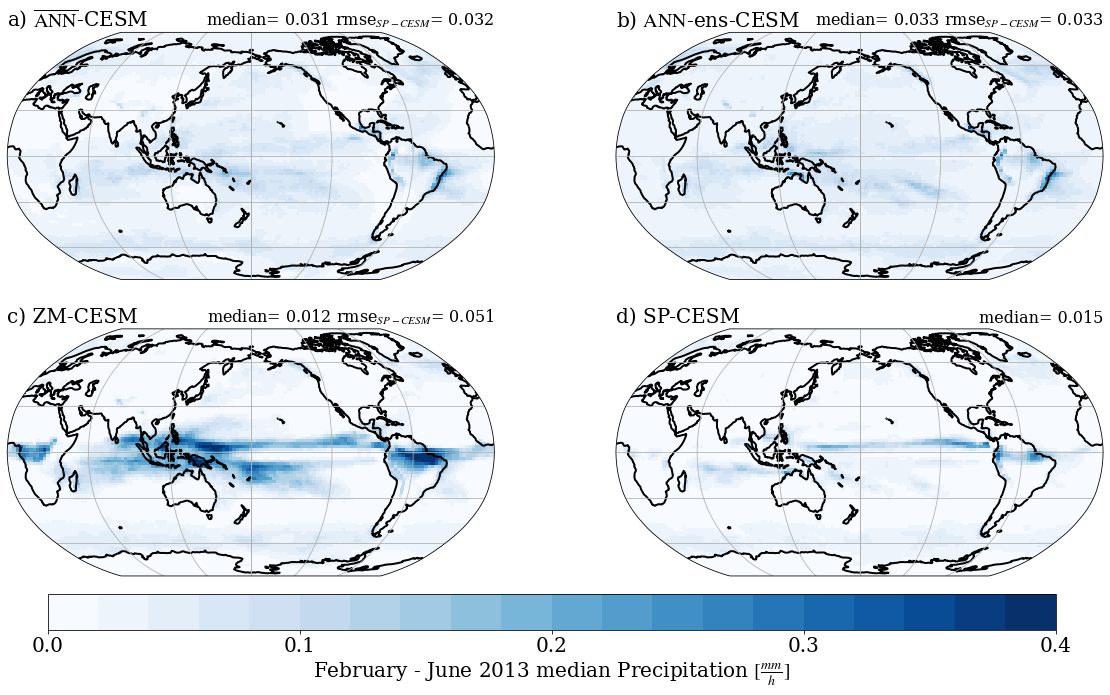

In [30]:
#plot lat-lon maps of median precip
fig, ax = plt.subplots(2,2,subplot_kw={'projection':ccrs.Robinson(central_longitude=180)},figsize=(20,10))


for isub in range(0,2): # Loop over 4 subplots
    #print(isub)
    isub0 = isub-2*math.floor(isub/2) # Determine location of subplot (out of 4)
    print(isub0)
    for iax in range(2): # 
        
        if iax==0: 
            
            if isub0==0: 
            
                data = np.median(precip_ANN_i_CESM_Feb_June,0);
                tit = r'a) $\mathrm{\overline{ANN}}$-CESM';
                tit_2=r'median= '+str(np.round(np.median(np.reshape(np.median(precip_ANN_i_CESM_Feb_June,0),(lat.size*lon.size)),0),
                                           3))+r' rmse$_{SP-CESM}$= '+ str(np.round(ANN_i_median_global_rmse,
                                                                                   3));
                
            if isub0==1: 
            
                data = np.median(precip_ANN_ens_CESM_Feb_June,0);
                tit = r'b) $\mathrm{ANN}$-ens-CESM';
                tit_2=r'median= '+str(np.round(np.median(np.reshape(np.median(precip_ANN_ens_CESM_Feb_June,0),(lat.size*lon.size))),
                                           3))+r' rmse$_{SP-CESM}$= '+ str(np.round(ANN_ensemble_median_global_rmse,
                                                                                   3));
                
                   
        if iax==1: 
            
            if isub0==0:
                
                data = np.median(precip_ANN_ctrl_CESM_Feb_June,0);
                tit = r'c) ZM-CESM';
                tit_2=r'median= '+str(np.round(np.median(np.reshape(np.median(precip_ANN_ctrl_CESM_Feb_June,0),(lat.size*lon.size))),
                                           3))+r' rmse$_{SP-CESM}$= '+ str(np.round(CTRL_cam_median_global_rmse,
                                                                                   3));
            

                
            if isub0==1:
                
                data = np.median(precip_SP_ref,0);
                tit = r'd) SP-CESM';
                tit_2=r'median= '+str(np.round(np.mean(np.reshape(np.median(precip_SP_ref,0),(lat.size*lon.size))),
                                           3));
                                                 

        iax7 = iax+2*math.floor(isub/2) # To make 6 panels 
        print(iax7)
        imag = ax[iax7][isub0].pcolormesh(lon, lat, data,
                                cmap=seism_diff_median, norm=norm_seism_median_, 
                                transform=ccrs.PlateCarree())
        ax[iax7][isub0].coastlines(color='black',linewidth=2)
        ax[iax7][isub0].gridlines()
        ax[iax7][isub0].set_title(tit,loc='left',fontsize=fz)
        ax[iax7][isub0].set_title(tit_2,loc='right',fontsize=fz*0.8)

        
         
        # Colorbar
        if isub==1 and iax==1:
            cbar_ax = fig.add_axes([0.16, 0.05, 0.7, 0.05])
            cb=fig.colorbar(imag, label=r"February - June 2013 median Precipitation $[\frac{mm}{h}]$", cax=cbar_ax,
                            ticks=np.arange(0,0.41,0.1),orientation='horizontal')
            

0
0
1
1
0
1


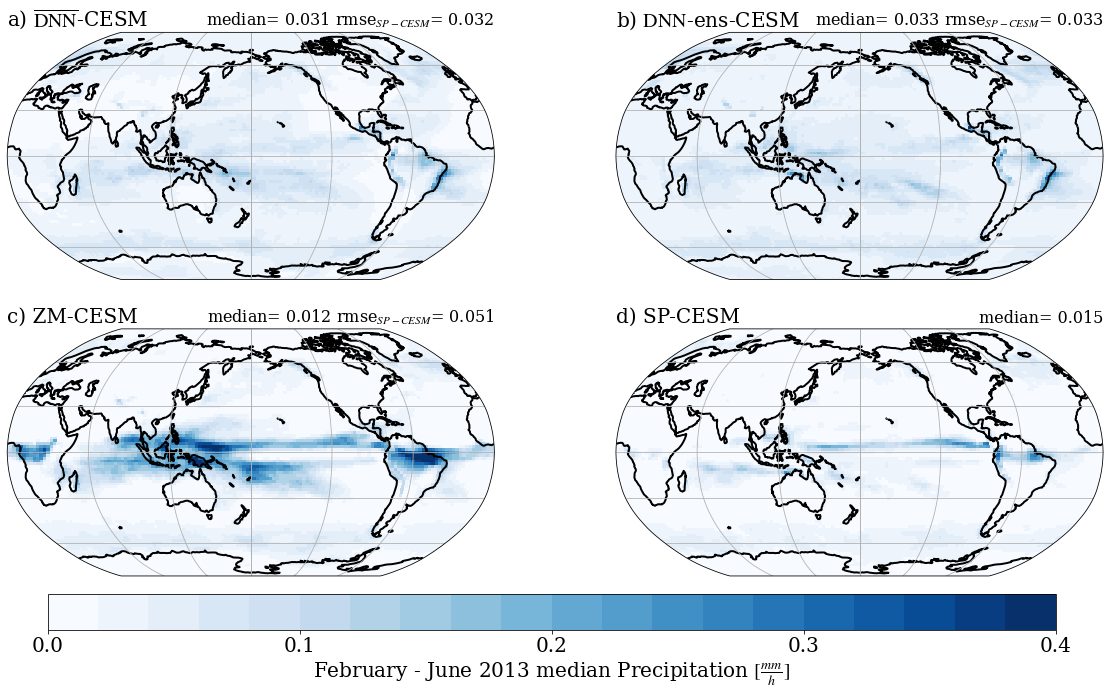

In [52]:
#plot lat-lon maps of median precip
fig, ax = plt.subplots(2,2,subplot_kw={'projection':ccrs.Robinson(central_longitude=180)},figsize=(20,10))


for isub in range(0,2): # Loop over 4 subplots
    #print(isub)
    isub0 = isub-2*math.floor(isub/2) # Determine location of subplot (out of 4)
    print(isub0)
    for iax in range(2): # 
        
        if iax==0: 
            
            if isub0==0: 
            
                data = np.median(precip_ANN_i_CESM_Feb_June,0);
                tit = r'a) $\mathrm{\overline{DNN}}$-CESM';
                tit_2=r'median= '+str(np.round(np.median(np.reshape(np.median(precip_ANN_i_CESM_Feb_June,0),(lat.size*lon.size)),0),
                                           3))+r' rmse$_{SP-CESM}$= '+ str(np.round(ANN_i_median_global_rmse,
                                                                                   3));
                
            if isub0==1: 
            
                data = np.median(precip_ANN_ens_CESM_Feb_June,0);
                tit = r'b) $\mathrm{DNN}$-ens-CESM';
                tit_2=r'median= '+str(np.round(np.median(np.reshape(np.median(precip_ANN_ens_CESM_Feb_June,0),(lat.size*lon.size))),
                                           3))+r' rmse$_{SP-CESM}$= '+ str(np.round(ANN_ensemble_median_global_rmse,
                                                                                   3));
                
                   
        if iax==1: 
            
            if isub0==0:
                
                data = np.median(precip_ANN_ctrl_CESM_Feb_June,0);
                tit = r'c) ZM-CESM';
                tit_2=r'median= '+str(np.round(np.median(np.reshape(np.median(precip_ANN_ctrl_CESM_Feb_June,0),(lat.size*lon.size))),
                                           3))+r' rmse$_{SP-CESM}$= '+ str(np.round(CTRL_cam_median_global_rmse,
                                                                                   3));
            

                
            if isub0==1:
                
                data = np.median(precip_SP_ref,0);
                tit = r'd) SP-CESM';
                tit_2=r'median= '+str(np.round(np.mean(np.reshape(np.median(precip_SP_ref,0),(lat.size*lon.size))),
                                           3));
                                                 

        iax7 = iax+2*math.floor(isub/2) # To make 6 panels 
        print(iax7)
        imag = ax[iax7][isub0].pcolormesh(lon, lat, data,
                                cmap=seism_diff_median, norm=norm_seism_median_, 
                                transform=ccrs.PlateCarree())
        ax[iax7][isub0].coastlines(color='black',linewidth=2)
        ax[iax7][isub0].gridlines()
        ax[iax7][isub0].set_title(tit,loc='left',fontsize=fz)
        ax[iax7][isub0].set_title(tit_2,loc='right',fontsize=fz*0.8)

        
         
        # Colorbar
        if isub==1 and iax==1:
            cbar_ax = fig.add_axes([0.16, 0.05, 0.7, 0.05])
            cb=fig.colorbar(imag, label=r"February - June 2013 median Precipitation $[\frac{mm}{h}]$", cax=cbar_ax,
                            ticks=np.arange(0,0.41,0.1),orientation='horizontal')
            

# Diurnal precip cycle analysis

In [53]:
x = 144 # number of grid cells in zonal direction
y = 96 # number of grid cells in meridional direction
z = 26 # number of grid cells in vertical direction
t = int(precip_SP_ref.size/(x*y))
print(t)

5759


 The following code is adjuested to SPCESM, but directly based on Griffin Mooers notebook for SPCAM5 (https://github.com/gmooers96/Real_Geography_Manuscript/blob/master/New_LST_Map.ipynb).

In [23]:
precip_SP_ref.shape

(5759, 96, 144)

In [54]:
# define hyperparameter of data set
ny = lat.size
nx = lon.size
nday = int(t/48) # number of days
nperday = 48 # samples per day



In [55]:

#Make an empty array of 0's by days, samples in a day, at each lat/lon coord
SPCESM_data_reorganized = np.zeros(shape=(nday, nperday, ny, nx))
ANN_CESM_data_reorganized = np.zeros(shape=(nday, nperday, ny, nx))
ANN_ens_CESM_data_reorganized = np.zeros(shape=(nday, nperday, ny, nx))
ZM_CESM_data_reorganized = np.zeros(shape=(nday, nperday, ny, nx))

#loop over the number of days
count = 0
for i in range(len(SPCESM_data_reorganized)):
    #loop over the samples per day
    for j in range(len(SPCESM_data_reorganized[0])):
        SPCESM_data_reorganized[i, j, :, :] = np.squeeze(precip_SP_ref[count , :, :])
        ANN_CESM_data_reorganized[i, j, :, :] = np.squeeze(precip_ANN_i_CESM_Feb_June[count , :, :])
        ANN_ens_CESM_data_reorganized[i, j, :, :] = np.squeeze(precip_ANN_ens_CESM_Feb_June[count , :, :])
        ZM_CESM_data_reorganized[i, j, :, :] = np.squeeze(precip_ANN_ctrl_CESM_Feb_June[count , :, :])
        count = count+1

In [56]:
SPCESM_data_reorganized.shape

(119, 48, 96, 144)

In [57]:
# compute mean and std for given daily time step in SP-CESM
SPCESM_themean = np.nanmean(SPCESM_data_reorganized, axis = 0)
SPCESM_thestd = np.nanstd(SPCESM_data_reorganized, axis = 0)

In [58]:
SPCESM_amplitude_map = np.zeros(shape=(ny, nx))
SPCESM_phase_map_utc = np.zeros(shape=(ny, nx))
SPCESM_phase_map_lst = np.zeros(shape=(ny, nx))


In [59]:
# compute mean and std for given daily time step in \overline{ANN}-CESM

ANN_CESM_themean = np.nanmean(ANN_CESM_data_reorganized, axis = 0)
ANN_CESM_thestd = np.nanstd(ANN_CESM_data_reorganized, axis = 0)

In [60]:
ANN_CESM_amplitude_map = np.zeros(shape=(ny, nx))
ANN_CESM_phase_map_utc = np.zeros(shape=(ny, nx))
ANN_CESM_phase_map_lst = np.zeros(shape=(ny, nx))


In [61]:
# compute mean and std for given daily time step in ANN-ens-CESM


ANN_ens_CESM_themean = np.nanmean(ANN_ens_CESM_data_reorganized, axis = 0)
ANN_ens_CESM_thestd = np.nanstd(ANN_ens_CESM_data_reorganized, axis = 0)

In [62]:
ANN_ens_CESM_amplitude_map = np.zeros(shape=(ny, nx))
ANN_ens_CESM_phase_map_utc = np.zeros(shape=(ny, nx))
ANN_ens_CESM_phase_map_lst = np.zeros(shape=(ny, nx))


In [63]:
# compute mean and std for given daily time step in ZM-CESM

ZM_CESM_themean = np.nanmean(ZM_CESM_data_reorganized, axis = 0)
ZM_CESM_thestd = np.nanstd(ZM_CESM_data_reorganized, axis = 0)

In [64]:
ZM_CESM_amplitude_map = np.zeros(shape=(ny, nx))
ZM_CESM_phase_map_utc = np.zeros(shape=(ny, nx))
ZM_CESM_phase_map_lst = np.zeros(shape=(ny, nx))


In [65]:
# compute utc hours of distict longitudes 
import math
t = time_axis
utc_hour = (t[:48] - math.floor(t[0]))*24.0-0.5
utc_hour[0] = utc_hour[0]+24

In [66]:
utc_hour

array([24. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
        5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5,
       11. , 11.5, 12. , 12.5, 13. , 13.5, 14. , 14.5, 15. , 15.5, 16. ,
       16.5, 17. , 17.5, 18. , 18.5, 19. , 19.5, 20. , 20.5, 21. , 21.5,
       22. , 22.5, 23. , 23.5])

In [67]:
# compute occurence of peak diurnal precip in all grid cells and for all paramaterizations

#loop through longitudes
for i in range(len(SPCESM_data_reorganized[0][0][0])):
    lst_hour = utc_hour +(lon[i]/360.)*24.
    lst_hour[lst_hour > 24] = lst_hour[lst_hour > 24] - 24
    
    #loop through latitudes
    for j in range(len(SPCESM_data_reorganized[0][0])):
        SPCESM_precip_cycle = np.squeeze(SPCESM_themean[:, j, i])
        SPCESM_amplitude_here = max(SPCESM_precip_cycle)-min(SPCESM_precip_cycle)
        SPCESM_stderr_here = np.squeeze(max(SPCESM_thestd[:,j,i]))/(math.sqrt(nday/4.0-1.0))
        
        ANN_CESM_precip_cycle = np.squeeze(ANN_CESM_themean[:, j, i])
        ANN_CESM_amplitude_here = max(ANN_CESM_precip_cycle)-min(ANN_CESM_precip_cycle)
        ANN_CESM_stderr_here = np.squeeze(max(ANN_CESM_thestd[:,j,i]))/(math.sqrt(nday/4.0-1.0))
        
        
        ANN_ens_CESM_precip_cycle = np.squeeze(ANN_ens_CESM_themean[:, j, i])
        ANN_ens_CESM_amplitude_here = max(ANN_ens_CESM_precip_cycle)-min(ANN_ens_CESM_precip_cycle)
        ANN_ens_CESM_stderr_here = np.squeeze(max(ANN_ens_CESM_thestd[:,j,i]))/(math.sqrt(nday/4.0-1.0))
        
        
        ZM_CESM_precip_cycle = np.squeeze(ZM_CESM_themean[:, j, i])
        ZM_CESM_amplitude_here = max(ZM_CESM_precip_cycle)-min(ZM_CESM_precip_cycle)
        ZM_CESM_stderr_here = np.squeeze(max(ZM_CESM_thestd[:,j,i]))/(math.sqrt(nday/4.0-1.0))
        #avoid high latitudes where unnesesary variation can occur
 #GB: modified treshold before 2 in Mooers2021 now 1.5  (longer period analysed than in Mooers2021)     
        if SPCESM_amplitude_here >= 1.5*SPCESM_stderr_here:
            SPCESM_amplitude_map[j, i] = SPCESM_amplitude_here
            if np.std(SPCESM_precip_cycle) > 0.0:
                index_max = np.argmax(SPCESM_precip_cycle)
                SPCESM_phase_map_utc[j, i] = utc_hour[index_max]
                SPCESM_phase_map_lst[j, i] = lst_hour[index_max]
                
        if ANN_CESM_amplitude_here >= 1.5*ANN_CESM_stderr_here:
            ANN_CESM_amplitude_map[j, i] = ANN_CESM_amplitude_here
            if np.std(ANN_CESM_precip_cycle) > 0.0:
                index_max = np.argmax(ANN_CESM_precip_cycle)
                ANN_CESM_phase_map_utc[j, i] = utc_hour[index_max]
                ANN_CESM_phase_map_lst[j, i] = lst_hour[index_max]
                
        if ANN_ens_CESM_amplitude_here >= 1.5*ANN_ens_CESM_stderr_here:
            ANN_ens_CESM_amplitude_map[j, i] = ANN_ens_CESM_amplitude_here
            if np.std(ANN_ens_CESM_precip_cycle) > 0.0:
                index_max = np.argmax(ANN_ens_CESM_precip_cycle)
                ANN_ens_CESM_phase_map_utc[j, i] = utc_hour[index_max]
                ANN_ens_CESM_phase_map_lst[j, i] = lst_hour[index_max]
                
      
        if ZM_CESM_amplitude_here >= 1.5*ZM_CESM_stderr_here:
            ZM_CESM_amplitude_map[j, i] = ZM_CESM_amplitude_here
            if np.std(ZM_CESM_precip_cycle) > 0.0:
                index_max = np.argmax(ZM_CESM_precip_cycle)
                ZM_CESM_phase_map_utc[j, i] = utc_hour[index_max]
                ZM_CESM_phase_map_lst[j, i] = lst_hour[index_max]
                

#generate apropriate lat/lon map
Xvar, Yvar = np.meshgrid(lon, lat)

In [68]:
lst_hour.size

48

In [69]:
range(len(SPCESM_themean))

range(0, 48)

In [70]:
# compute local solar time map
#loop through longitudes
lst_map =np.nan*np.zeros(SPCESM_themean.shape)
for h in range(len(SPCESM_themean)):
    for i in range(len(SPCESM_themean[0][0])):
        lst_hour = utc_hour +(lon[i]/360.)*24.
        lst_hour[lst_hour > 24] = lst_hour[lst_hour > 24] - 24
        
        
        lst_map[h,:,i] =lst_hour[h]
       
            

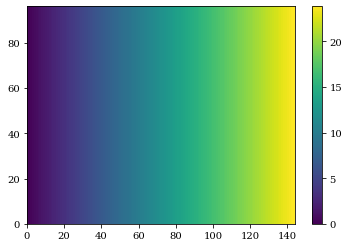

In [58]:
plt.pcolor(lst_map[0])
plt.colorbar()

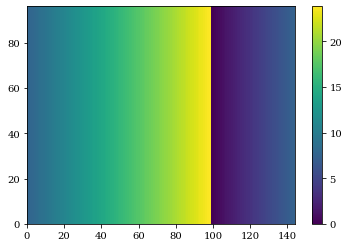

In [59]:
plt.pcolor(lst_map[15])
plt.colorbar()

In [71]:
LST_map_resh=np.reshape(lst_map,int(48*lat.size*lon.size))

LST_map_sort=np.argsort(LST_map_resh)
SPCESM_precip_themean_resh=np.reshape(SPCESM_themean,int(48*lat.size*lon.size))
ANN_CESM_precip_themean_resh=np.reshape(ANN_CESM_themean,int(48*lat.size*lon.size))
ANN_ens_CESM_precip_themean_resh=np.reshape(ANN_ens_CESM_themean,int(48*lat.size*lon.size))
ZM_CESM_precip_themean_resh=np.reshape(ZM_CESM_themean,int(48*lat.size*lon.size))

SPCESM_precip_themean_resh_sort=SPCESM_precip_themean_resh[LST_map_sort]
ANN_CESM_precip_themean_resh_sort=ANN_CESM_precip_themean_resh[LST_map_sort]
ANN_ens_CESM_precip_themean_resh_sort=ANN_ens_CESM_precip_themean_resh[LST_map_sort]
ZM_CESM_precip_themean_resh_sort=ZM_CESM_precip_themean_resh[LST_map_sort]


SPCESM_the_mean_lst=np.reshape(SPCESM_precip_themean_resh,(48,lat.size,lon.size))
ANN_CESM_the_mean_lst=np.reshape(ANN_CESM_precip_themean_resh,(48,lat.size,lon.size))
ANN_ens_CESM_the_mean_lst=np.reshape(ANN_ens_CESM_precip_themean_resh,(48,lat.size,lon.size))
ZM_CESM_the_mean_lst=np.reshape(ZM_CESM_precip_themean_resh,(48,lat.size,lon.size))

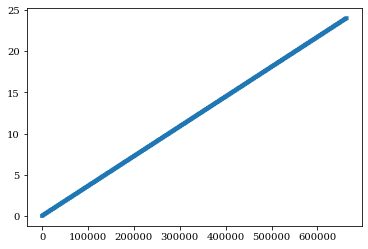

In [66]:
plt.plot(LST_map_resh[LST_map_sort])

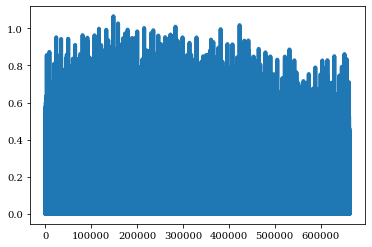

In [67]:
plt.plot(SPCESM_precip_themean_resh_sort)

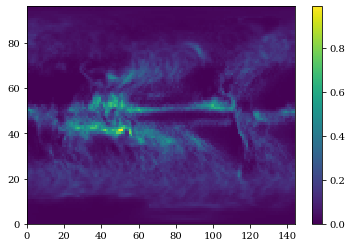

In [63]:
plt.pcolor(SPCESM_the_mean_lst[0])
plt.colorbar()

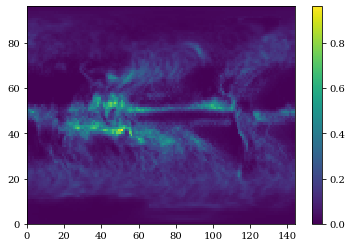

In [64]:
plt.pcolor(SPCESM_the_mean_lst[1])
plt.colorbar()

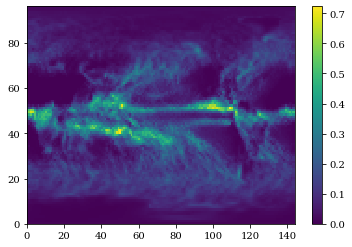

In [65]:
plt.pcolor(SPCESM_the_mean_lst[24])
plt.colorbar()

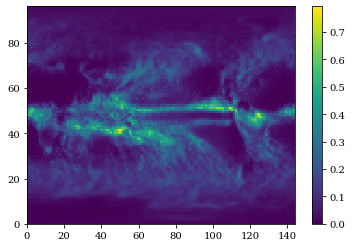

In [66]:
plt.pcolor(SPCESM_the_mean_lst[30])
plt.colorbar()

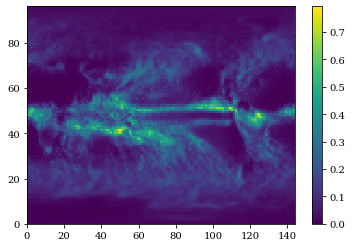

In [67]:
plt.pcolor(SPCESM_themean[30])
plt.colorbar()

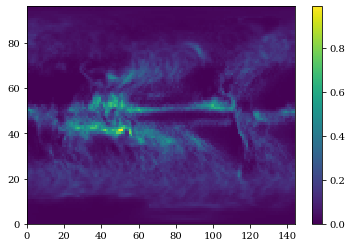

In [68]:
plt.pcolor(SPCESM_themean[0])
plt.colorbar()

In [72]:
utc_hour

array([24. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
        5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5,
       11. , 11.5, 12. , 12.5, 13. , 13.5, 14. , 14.5, 15. , 15.5, 16. ,
       16.5, 17. , 17.5, 18. , 18.5, 19. , 19.5, 20. , 20.5, 21. , 21.5,
       22. , 22.5, 23. , 23.5])

In [73]:
#set NaN flags 

SPCESM_nan_map_utc = SPCESM_phase_map_utc 
SPCESM_nan_map_lst = SPCESM_phase_map_lst
for i in range(len(SPCESM_phase_map_utc)):
    for j in range(len(SPCESM_phase_map_utc[i])):
        if SPCESM_phase_map_utc[i][j] == 0.0:
            SPCESM_nan_map_utc[i][j] = np.nan
            SPCESM_nan_map_lst[i][j] = np.nan

            
            
ANN_CESM_nan_map_utc = ANN_CESM_phase_map_utc 
ANN_CESM_nan_map_lst = ANN_CESM_phase_map_lst
for i in range(len(ANN_CESM_phase_map_utc)):
    for j in range(len(ANN_CESM_phase_map_utc[i])):
        if ANN_CESM_phase_map_utc[i][j] == 0.0:
            ANN_CESM_nan_map_utc[i][j] = np.nan
            ANN_CESM_nan_map_lst[i][j] = np.nan
            
            
ANN_ens_CESM_nan_map_utc = ANN_ens_CESM_phase_map_utc 
ANN_ens_CESM_nan_map_lst = ANN_ens_CESM_phase_map_lst
for i in range(len(ANN_ens_CESM_phase_map_utc)):
    for j in range(len(ANN_ens_CESM_phase_map_utc[i])):
        if ANN_ens_CESM_phase_map_utc[i][j] == 0.0:
            ANN_ens_CESM_nan_map_utc[i][j] = np.nan
            ANN_ens_CESM_nan_map_lst[i][j] = np.nan
           

ZM_CESM_nan_map_utc = ZM_CESM_phase_map_utc 
ZM_CESM_nan_map_lst = ZM_CESM_phase_map_lst
for i in range(len(ZM_CESM_phase_map_utc)):
    for j in range(len(ZM_CESM_phase_map_utc[i])):
        if ZM_CESM_phase_map_utc[i][j] == 0.0:
            ZM_CESM_nan_map_utc[i][j] = np.nan
            ZM_CESM_nan_map_lst[i][j] = np.nan
           
        
        

In [74]:
fz = 15*1.5
lw = 4
siz = 100
XNNA = 1.25 # Abscissa where architecture-constrained network will be placed
XTEXT = 0.25 # Text placement
YTEXT = 0.3 # Text placement

plt.rc('text', usetex=False)
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['font.family'] = 'STIXGeneral'
#mpl.rcParams["font.serif"] = "STIX"
plt.rc('font', family='serif', size=fz)
mpl.rcParams['lines.linewidth'] = lw

Text(0.52, 0.92, 'Hour of Daily Maximum Precipitation')

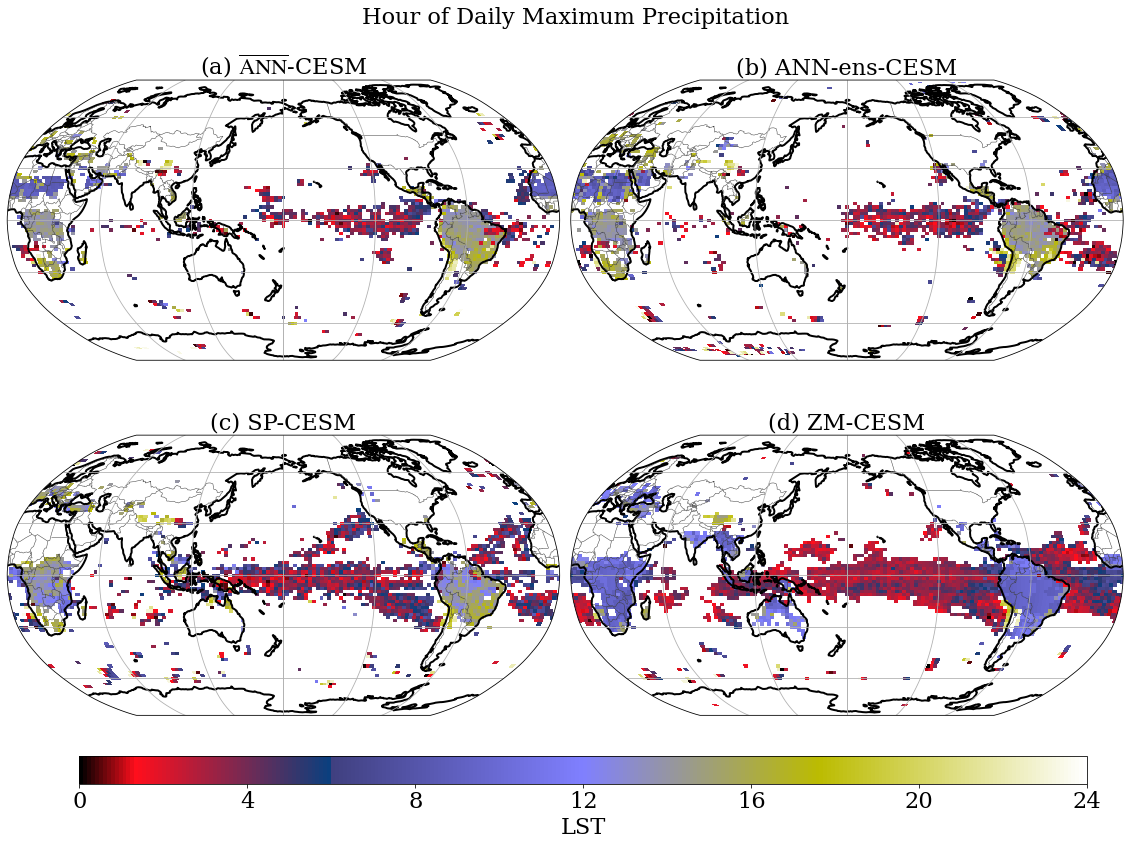

In [75]:
# plot peak diurnal precip for all params in LST

fig, ax = plt.subplots(2,2,subplot_kw={'projection':ccrs.Robinson(central_longitude=180)})
fig.set_size_inches(20,13)

contour_plot = ax[1,0].pcolormesh(Xvar, Yvar, SPCESM_nan_map_lst,cmap='gist_stern', transform=ccrs.PlateCarree())
ax[1,0].set_title('(c) SP-CESM', fontsize = fz)
ax[1,0].coastlines(linewidth=2.0,edgecolor='0.25')
ax[1,0].gridlines()
ax[1,0].add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')



contour_plot = ax[1,1].pcolormesh(Xvar, Yvar, ZM_CESM_nan_map_lst,cmap='gist_stern', transform=ccrs.PlateCarree())
ax[1,1].set_title('(d) ZM-CESM', fontsize = fz)
ax[1,1].coastlines(linewidth=2.0,edgecolor='0.25')
ax[1,1].gridlines()
ax[1,1].add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')


contour_plot = ax[0,0].pcolormesh(Xvar, Yvar, ANN_CESM_nan_map_lst,cmap='gist_stern', transform=ccrs.PlateCarree())
ax[0,0].set_title(r'(a) $\mathrm{\overline{ANN}}$-CESM', fontsize = fz)
ax[0,0].coastlines(linewidth=2.0,edgecolor='0.25')
ax[0,0].gridlines()
ax[0,0].add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')


contour_plot = ax[0,1].pcolormesh(Xvar, Yvar, ANN_ens_CESM_nan_map_lst,cmap='gist_stern', transform=ccrs.PlateCarree())
ax[0,1].set_title(r'(b) ANN-ens-CESM', fontsize = fz)
ax[0,1].coastlines(linewidth=2.0,edgecolor='0.25')
ax[0,1].gridlines()
ax[0,1].add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')



p0 = ax[0,0].get_position().get_points().flatten()
p1 = ax[1,1].get_position().get_points().flatten()
ax_cbar = fig.add_axes([p0[0]+0.05, 0.09, p1[2]-0.20, 0.03])
plt.colorbar(contour_plot, cax=ax_cbar,ticks=np.arange(0,24.1,4.0), orientation='horizontal', label="LST")
plt.subplots_adjust(hspace=0.01, wspace=0.02)
plt.suptitle("Hour of Daily Maximum Precipitation", y=0.92, x=0.52, fontsize = fz)



Text(0.52, 0.92, 'Hour of Daily Maximum Precipitation')

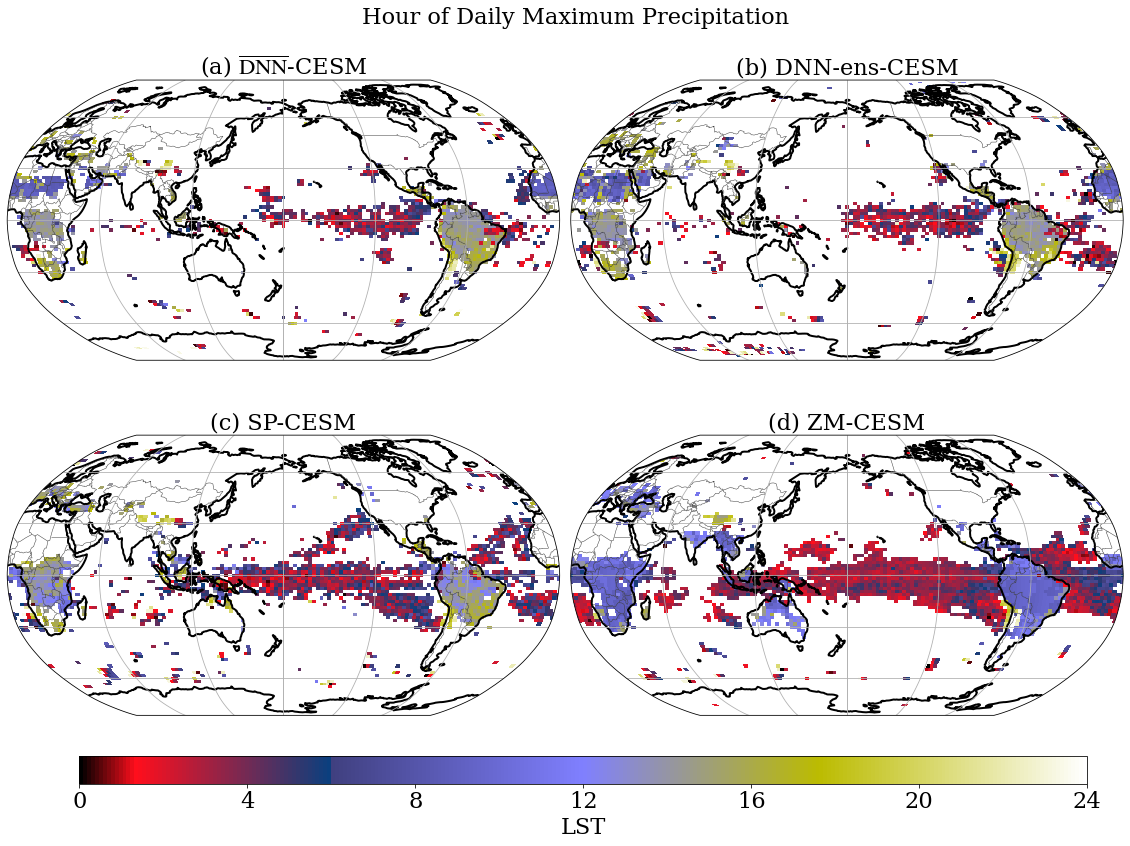

In [78]:
# plot peak diurnal precip for all params in LST

fig, ax = plt.subplots(2,2,subplot_kw={'projection':ccrs.Robinson(central_longitude=180)})
fig.set_size_inches(20,13)

contour_plot = ax[1,0].pcolormesh(Xvar, Yvar, SPCESM_nan_map_lst,cmap='gist_stern', transform=ccrs.PlateCarree())
ax[1,0].set_title('(c) SP-CESM', fontsize = fz)
ax[1,0].coastlines(linewidth=2.0,edgecolor='0.25')
ax[1,0].gridlines()
ax[1,0].add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')



contour_plot = ax[1,1].pcolormesh(Xvar, Yvar, ZM_CESM_nan_map_lst,cmap='gist_stern', transform=ccrs.PlateCarree())
ax[1,1].set_title('(d) ZM-CESM', fontsize = fz)
ax[1,1].coastlines(linewidth=2.0,edgecolor='0.25')
ax[1,1].gridlines()
ax[1,1].add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')


contour_plot = ax[0,0].pcolormesh(Xvar, Yvar, ANN_CESM_nan_map_lst,cmap='gist_stern', transform=ccrs.PlateCarree())
ax[0,0].set_title(r'(a) $\mathrm{\overline{DNN}}$-CESM', fontsize = fz)
ax[0,0].coastlines(linewidth=2.0,edgecolor='0.25')
ax[0,0].gridlines()
ax[0,0].add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')


contour_plot = ax[0,1].pcolormesh(Xvar, Yvar, ANN_ens_CESM_nan_map_lst,cmap='gist_stern', transform=ccrs.PlateCarree())
ax[0,1].set_title(r'(b) DNN-ens-CESM', fontsize = fz)
ax[0,1].coastlines(linewidth=2.0,edgecolor='0.25')
ax[0,1].gridlines()
ax[0,1].add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')



p0 = ax[0,0].get_position().get_points().flatten()
p1 = ax[1,1].get_position().get_points().flatten()
ax_cbar = fig.add_axes([p0[0]+0.05, 0.09, p1[2]-0.20, 0.03])
plt.colorbar(contour_plot, cax=ax_cbar,ticks=np.arange(0,24.1,4.0), orientation='horizontal', label="LST")
plt.subplots_adjust(hspace=0.01, wspace=0.02)
plt.suptitle("Hour of Daily Maximum Precipitation", y=0.92, x=0.52, fontsize = fz)



Text(0.52, 0.92, 'Hour of Daily Maximum Precipitation')

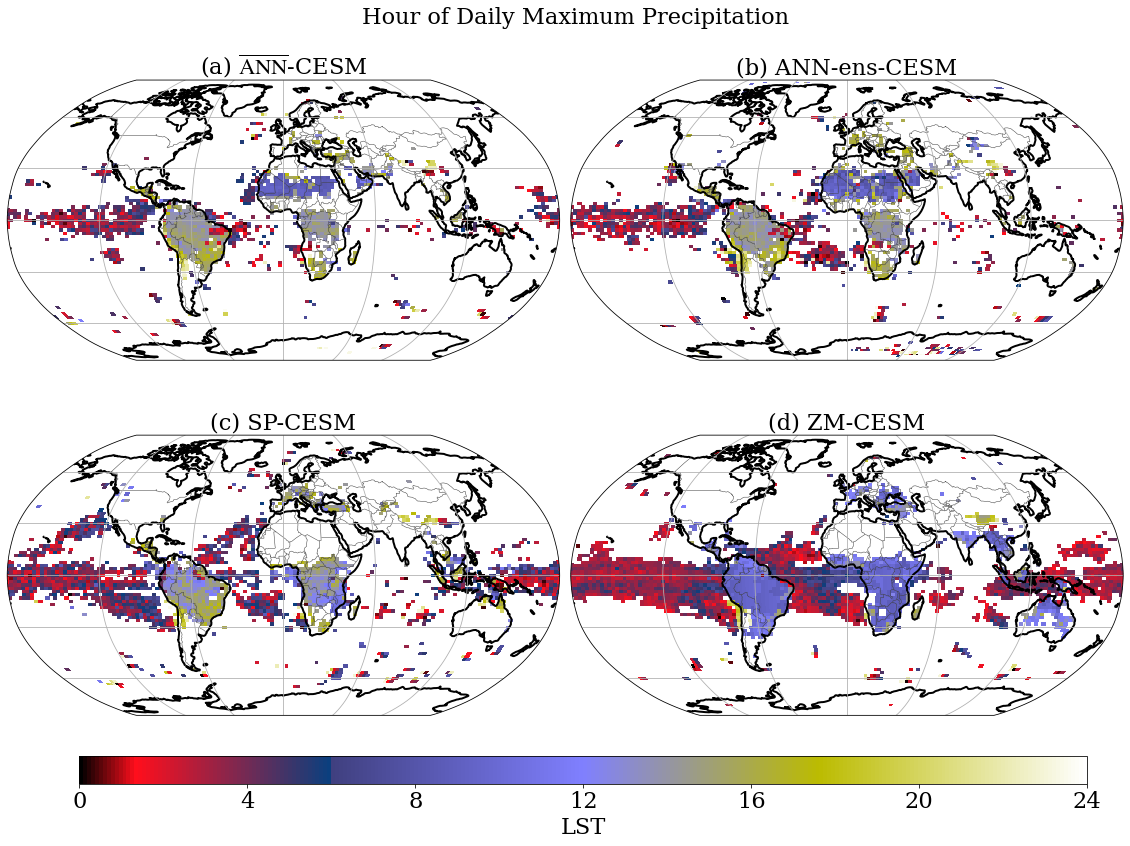

In [81]:
# plot peak diurnal precip for all params in LST


fig, ax = plt.subplots(2,2,subplot_kw={'projection':ccrs.Robinson(central_longitude=0)})
fig.set_size_inches(20,13)

contour_plot = ax[1,0].pcolormesh(Xvar, Yvar, SPCESM_nan_map_lst,cmap='gist_stern', transform=ccrs.PlateCarree())
ax[1,0].set_title('(c) SP-CESM', fontsize = fz)
ax[1,0].coastlines(linewidth=2.0,edgecolor='0.25')
ax[1,0].gridlines()
ax[1,0].add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')



contour_plot = ax[1,1].pcolormesh(Xvar, Yvar, ZM_CESM_nan_map_lst,cmap='gist_stern', transform=ccrs.PlateCarree())
ax[1,1].set_title('(d) ZM-CESM', fontsize = fz)
ax[1,1].coastlines(linewidth=2.0,edgecolor='0.25')
ax[1,1].gridlines()
ax[1,1].add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')


contour_plot = ax[0,0].pcolormesh(Xvar, Yvar, ANN_CESM_nan_map_lst,cmap='gist_stern', transform=ccrs.PlateCarree())
ax[0,0].set_title(r'(a) $\mathrm{\overline{ANN}}$-CESM', fontsize = fz)
ax[0,0].coastlines(linewidth=2.0,edgecolor='0.25')
ax[0,0].gridlines()
ax[0,0].add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')


contour_plot = ax[0,1].pcolormesh(Xvar, Yvar, ANN_ens_CESM_nan_map_lst,cmap='gist_stern', transform=ccrs.PlateCarree())
ax[0,1].set_title(r'(b) ANN-ens-CESM', fontsize = fz)
ax[0,1].coastlines(linewidth=2.0,edgecolor='0.25')
ax[0,1].gridlines()
ax[0,1].add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')



p0 = ax[0,0].get_position().get_points().flatten()
p1 = ax[1,1].get_position().get_points().flatten()
ax_cbar = fig.add_axes([p0[0]+0.05, 0.09, p1[2]-0.20, 0.03])
plt.colorbar(contour_plot, cax=ax_cbar,ticks=np.arange(0,24.1,4.0), orientation='horizontal', label="LST")
plt.subplots_adjust(hspace=0.01, wspace=0.02)
plt.suptitle("Hour of Daily Maximum Precipitation", y=0.92, x=0.52, fontsize = fz)



Text(0.52, 0.92, 'Hour of Daily Maximum Precipitation')

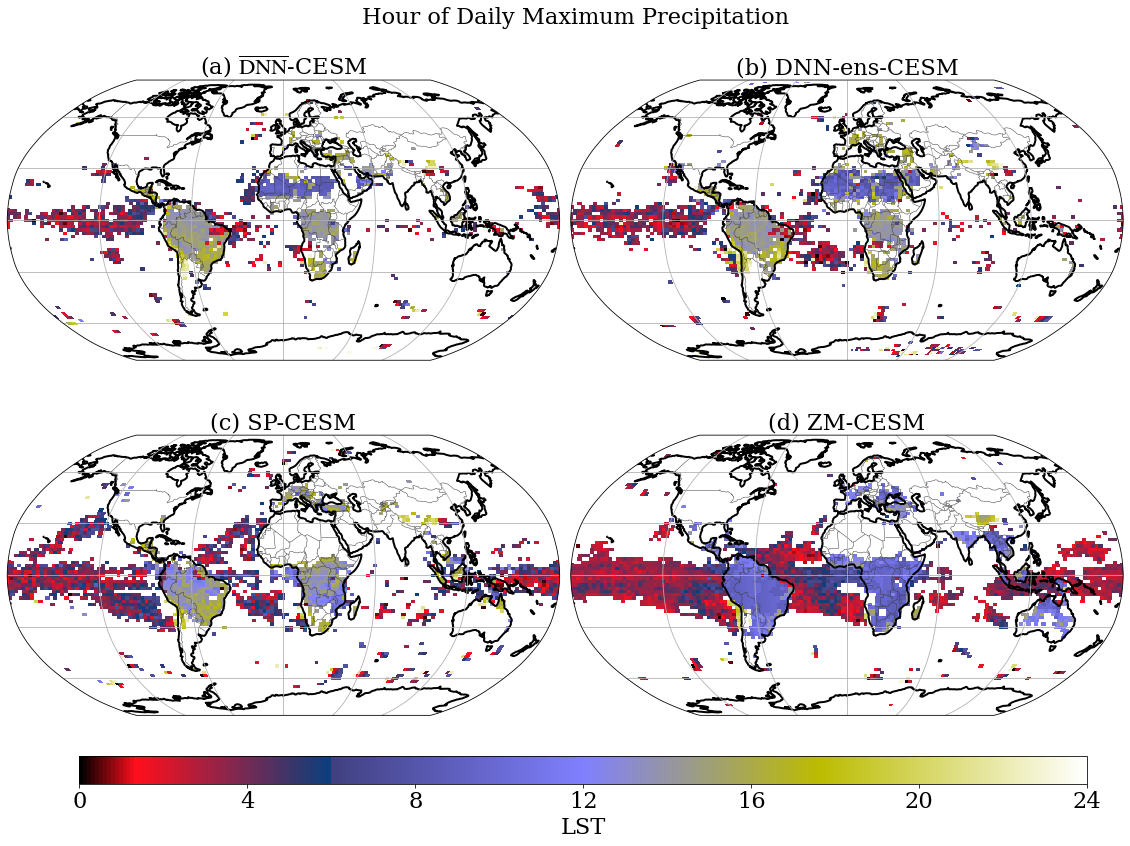

In [77]:
# plot peak diurnal precip for all params in LST


fig, ax = plt.subplots(2,2,subplot_kw={'projection':ccrs.Robinson(central_longitude=0)})
fig.set_size_inches(20,13)

contour_plot = ax[1,0].pcolormesh(Xvar, Yvar, SPCESM_nan_map_lst,cmap='gist_stern', transform=ccrs.PlateCarree())
ax[1,0].set_title('(c) SP-CESM', fontsize = fz)
ax[1,0].coastlines(linewidth=2.0,edgecolor='0.25')
ax[1,0].gridlines()
ax[1,0].add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')



contour_plot = ax[1,1].pcolormesh(Xvar, Yvar, ZM_CESM_nan_map_lst,cmap='gist_stern', transform=ccrs.PlateCarree())
ax[1,1].set_title('(d) ZM-CESM', fontsize = fz)
ax[1,1].coastlines(linewidth=2.0,edgecolor='0.25')
ax[1,1].gridlines()
ax[1,1].add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')


contour_plot = ax[0,0].pcolormesh(Xvar, Yvar, ANN_CESM_nan_map_lst,cmap='gist_stern', transform=ccrs.PlateCarree())
ax[0,0].set_title(r'(a) $\mathrm{\overline{DNN}}$-CESM', fontsize = fz)
ax[0,0].coastlines(linewidth=2.0,edgecolor='0.25')
ax[0,0].gridlines()
ax[0,0].add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')


contour_plot = ax[0,1].pcolormesh(Xvar, Yvar, ANN_ens_CESM_nan_map_lst,cmap='gist_stern', transform=ccrs.PlateCarree())
ax[0,1].set_title(r'(b) DNN-ens-CESM', fontsize = fz)
ax[0,1].coastlines(linewidth=2.0,edgecolor='0.25')
ax[0,1].gridlines()
ax[0,1].add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')



p0 = ax[0,0].get_position().get_points().flatten()
p1 = ax[1,1].get_position().get_points().flatten()
ax_cbar = fig.add_axes([p0[0]+0.05, 0.09, p1[2]-0.20, 0.03])
plt.colorbar(contour_plot, cax=ax_cbar,ticks=np.arange(0,24.1,4.0), orientation='horizontal', label="LST")
plt.subplots_adjust(hspace=0.01, wspace=0.02)
plt.suptitle("Hour of Daily Maximum Precipitation", y=0.92, x=0.52, fontsize = fz)



Text(0.52, 0.92, 'Hour of Daily Maximum Precipitation')

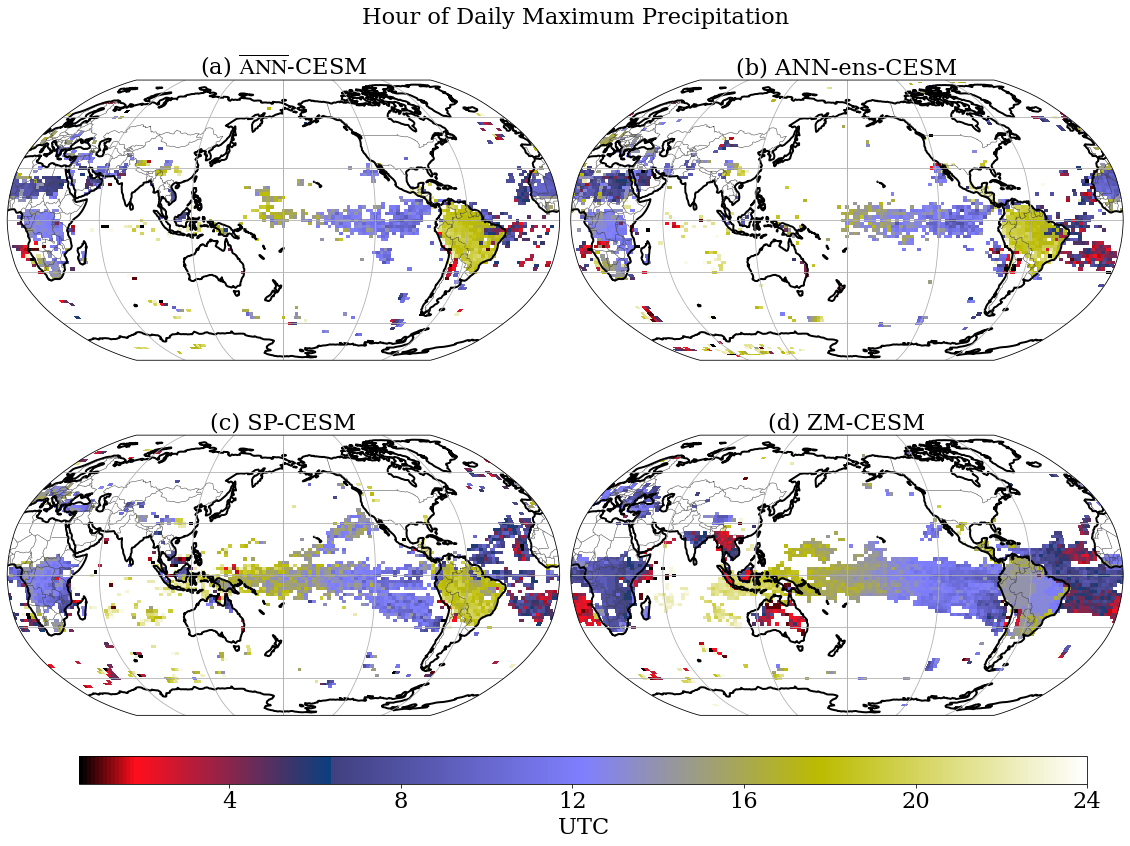

In [73]:
# plot peak diurnal precip for all params in UTC

fig, ax = plt.subplots(2,2,subplot_kw={'projection':ccrs.Robinson(central_longitude=180)})
fig.set_size_inches(20,13)

contour_plot = ax[1,0].pcolormesh(Xvar, Yvar, SPCESM_phase_map_utc,cmap='gist_stern', transform=ccrs.PlateCarree())
ax[1,0].set_title('(c) SP-CESM', fontsize = fz)
ax[1,0].coastlines(linewidth=2.0,edgecolor='0.25')
ax[1,0].gridlines()
ax[1,0].add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')



contour_plot = ax[1,1].pcolormesh(Xvar, Yvar, ZM_CESM_phase_map_utc,cmap='gist_stern', transform=ccrs.PlateCarree())
ax[1,1].set_title('(d) ZM-CESM', fontsize = fz)
ax[1,1].coastlines(linewidth=2.0,edgecolor='0.25')
ax[1,1].gridlines()
ax[1,1].add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')


contour_plot = ax[0,0].pcolormesh(Xvar, Yvar, ANN_CESM_phase_map_utc,cmap='gist_stern', transform=ccrs.PlateCarree())
ax[0,0].set_title(r'(a) $\mathrm{\overline{ANN}}$-CESM', fontsize = fz)
ax[0,0].coastlines(linewidth=2.0,edgecolor='0.25')
ax[0,0].gridlines()
ax[0,0].add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')


contour_plot = ax[0,1].pcolormesh(Xvar, Yvar, ANN_ens_CESM_phase_map_utc,cmap='gist_stern', transform=ccrs.PlateCarree())
ax[0,1].set_title(r'(b) ANN-ens-CESM', fontsize = fz)
ax[0,1].coastlines(linewidth=2.0,edgecolor='0.25')
ax[0,1].gridlines()
ax[0,1].add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')



p0 = ax[0,0].get_position().get_points().flatten()
p1 = ax[1,1].get_position().get_points().flatten()
ax_cbar = fig.add_axes([p0[0]+0.05, 0.09, p1[2]-0.20, 0.03])
plt.colorbar(contour_plot, cax=ax_cbar,ticks=np.arange(0,24.1,4.0), orientation='horizontal', label="UTC")
plt.subplots_adjust(hspace=0.01, wspace=0.02)
plt.suptitle("Hour of Daily Maximum Precipitation", y=0.92, x=0.52, fontsize = fz)



Text(0.52, 0.92, 'Hour of Daily Maximum Precipitation')

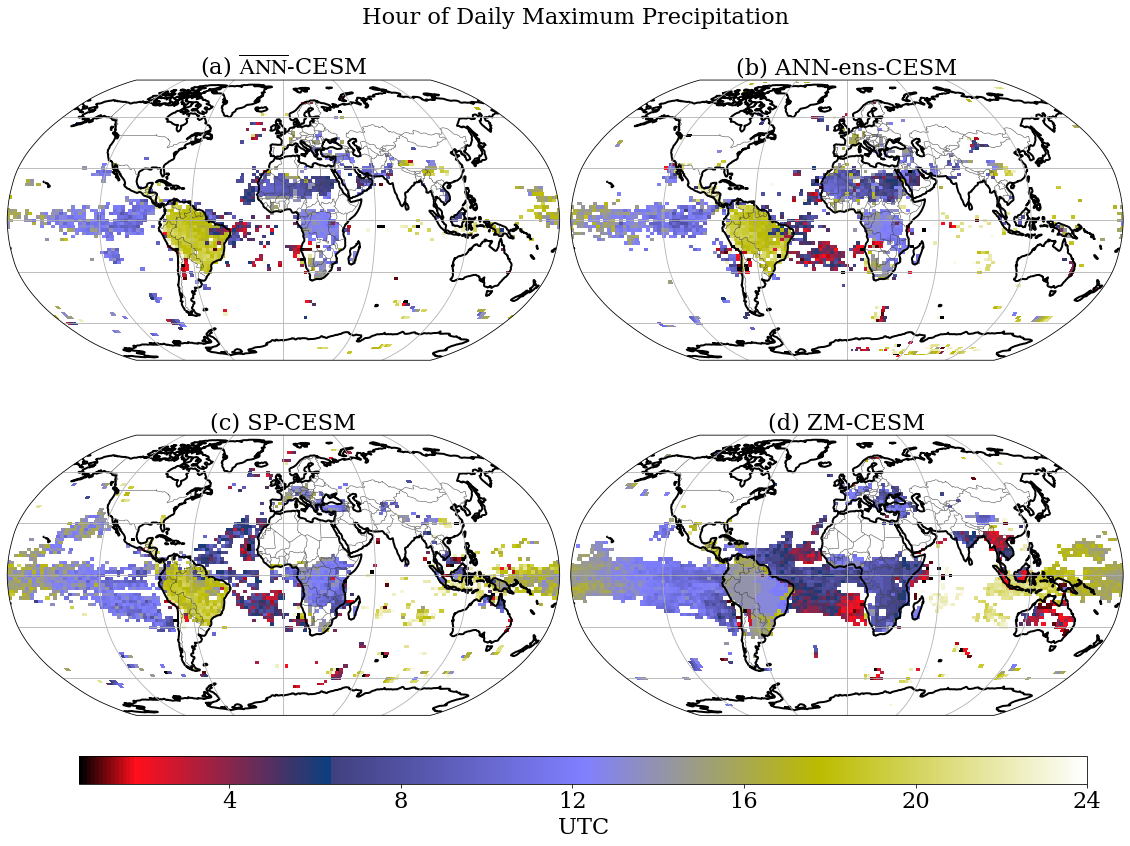

In [74]:
# plot peak diurnal precip for all params in UTC

fig, ax = plt.subplots(2,2,subplot_kw={'projection':ccrs.Robinson(central_longitude=0)})
fig.set_size_inches(20,13)

contour_plot = ax[1,0].pcolormesh(Xvar, Yvar, SPCESM_phase_map_utc,cmap='gist_stern', transform=ccrs.PlateCarree())
ax[1,0].set_title('(c) SP-CESM', fontsize = fz)
ax[1,0].coastlines(linewidth=2.0,edgecolor='0.25')
ax[1,0].gridlines()
ax[1,0].add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')



contour_plot = ax[1,1].pcolormesh(Xvar, Yvar, ZM_CESM_phase_map_utc,cmap='gist_stern', transform=ccrs.PlateCarree())
ax[1,1].set_title('(d) ZM-CESM', fontsize = fz)
ax[1,1].coastlines(linewidth=2.0,edgecolor='0.25')
ax[1,1].gridlines()
ax[1,1].add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')


contour_plot = ax[0,0].pcolormesh(Xvar, Yvar, ANN_CESM_phase_map_utc,cmap='gist_stern', transform=ccrs.PlateCarree())
ax[0,0].set_title(r'(a) $\mathrm{\overline{ANN}}$-CESM', fontsize = fz)
ax[0,0].coastlines(linewidth=2.0,edgecolor='0.25')
ax[0,0].gridlines()
ax[0,0].add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')


contour_plot = ax[0,1].pcolormesh(Xvar, Yvar, ANN_ens_CESM_phase_map_utc,cmap='gist_stern', transform=ccrs.PlateCarree())
ax[0,1].set_title(r'(b) ANN-ens-CESM', fontsize = fz)
ax[0,1].coastlines(linewidth=2.0,edgecolor='0.25')
ax[0,1].gridlines()
ax[0,1].add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')



p0 = ax[0,0].get_position().get_points().flatten()
p1 = ax[1,1].get_position().get_points().flatten()
ax_cbar = fig.add_axes([p0[0]+0.05, 0.09, p1[2]-0.20, 0.03])
plt.colorbar(contour_plot, cax=ax_cbar,ticks=np.arange(0,24.1,4.0), orientation='horizontal', label="UTC")
plt.subplots_adjust(hspace=0.01, wspace=0.02)
plt.suptitle("Hour of Daily Maximum Precipitation", y=0.92, x=0.52, fontsize = fz)



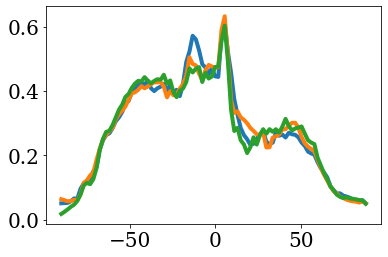

# regions_of_interest

In [82]:
US_lat_min=27
US_lat_max=51
US_lon_min=-117+360
US_lon_max=-70+360

In [83]:
EU_lat_min=33
EU_lat_max=50
EU_lon_min=10
EU_lon_max=25


In [84]:
Amazon_lat_min=-15
Amazon_lat_max=2
Amazon_lon_min=-67+360
Amazon_lon_max=-47+360

In [85]:
Africa_lat_min=-20
Africa_lat_max=2
Africa_lon_min=10
Africa_lon_max=45

In [86]:
S_Brazil_lat_min=-28
S_Brazil_lat_max=-15
S_Brazil_lon_min=-55+360
S_Brazil_lon_max=-35+360

In [87]:
India_lat_min=8
India_lat_max=27
India_lon_min=70
India_lon_max=90

In [88]:
Sahel_lat_min=3
Sahel_lat_max=18
Sahel_lon_min=0
Sahel_lon_max=15

In [89]:
Sahara_Arab_lat_min=10
Sahara_Arab_lat_max=30
Sahara_Arab_lon_min=-20+360
Sahara_Arab_lon_max=55

In [90]:
ITCZ_west_lat_min=-3
ITCZ_west_lat_max=15
ITCZ_west_lon_min=180
ITCZ_west_lon_max=360

In [91]:
ITCZ_east_lat_min=-3
ITCZ_east_lat_max=15
ITCZ_east_lon_min=160
ITCZ_east_lon_max=190

In [92]:
Pacific_lat_min=-23
Pacific_lat_max=-3
Pacific_lon_min=130
Pacific_lon_max=190

In [93]:
Australia_lat_min=-38
Australia_lat_max=-12
Australia_lon_min=115
Australia_lon_max=157

In [94]:
Ind_Oc_lat_min=-35
Ind_Oc_lat_max=0
Ind_Oc_lon_min=57
Ind_Oc_lon_max=97

In [95]:
S_Africa_lat_min=-35
S_Africa_lat_max=-20
S_Africa_lon_min=15
S_Africa_lon_max=37


In [70]:
SPCESM_themean.shape

(48, 96, 144)

In [71]:
lat

array([-90.   , -88.125, -86.25 , -84.375, -82.5  , -80.625, -78.75 ,
       -76.875, -75.   , -73.125, -71.25 , -69.375, -67.5  , -65.625,
       -63.75 , -61.875, -60.   , -58.125, -56.25 , -54.375, -52.5  ,
       -50.625, -48.75 , -46.875, -45.   , -43.125, -41.25 , -39.375,
       -37.5  , -35.625, -33.75 , -31.875, -30.   , -28.125, -26.25 ,
       -24.375, -22.5  , -20.625, -18.75 , -16.875, -15.   , -13.125,
       -11.25 ,  -9.375,  -7.5  ,  -5.625,  -3.75 ,  -1.875,   0.   ,
         1.875,   3.75 ,   5.625,   7.5  ,   9.375,  11.25 ,  13.125,
        15.   ,  16.875,  18.75 ,  20.625,  22.5  ,  24.375,  26.25 ,
        28.125,  30.   ,  31.875,  33.75 ,  35.625,  37.5  ,  39.375,
        41.25 ,  43.125,  45.   ,  46.875,  48.75 ,  50.625,  52.5  ,
        54.375,  56.25 ,  58.125,  60.   ,  61.875,  63.75 ,  65.625,
        67.5  ,  69.375,  71.25 ,  73.125,  75.   ,  76.875,  78.75 ,
        80.625,  82.5  ,  84.375,  86.25 ,  88.125])

In [72]:
lon

array([  0. ,   2.5,   5. ,   7.5,  10. ,  12.5,  15. ,  17.5,  20. ,
        22.5,  25. ,  27.5,  30. ,  32.5,  35. ,  37.5,  40. ,  42.5,
        45. ,  47.5,  50. ,  52.5,  55. ,  57.5,  60. ,  62.5,  65. ,
        67.5,  70. ,  72.5,  75. ,  77.5,  80. ,  82.5,  85. ,  87.5,
        90. ,  92.5,  95. ,  97.5, 100. , 102.5, 105. , 107.5, 110. ,
       112.5, 115. , 117.5, 120. , 122.5, 125. , 127.5, 130. , 132.5,
       135. , 137.5, 140. , 142.5, 145. , 147.5, 150. , 152.5, 155. ,
       157.5, 160. , 162.5, 165. , 167.5, 170. , 172.5, 175. , 177.5,
       180. , 182.5, 185. , 187.5, 190. , 192.5, 195. , 197.5, 200. ,
       202.5, 205. , 207.5, 210. , 212.5, 215. , 217.5, 220. , 222.5,
       225. , 227.5, 230. , 232.5, 235. , 237.5, 240. , 242.5, 245. ,
       247.5, 250. , 252.5, 255. , 257.5, 260. , 262.5, 265. , 267.5,
       270. , 272.5, 275. , 277.5, 280. , 282.5, 285. , 287.5, 290. ,
       292.5, 295. , 297.5, 300. , 302.5, 305. , 307.5, 310. , 312.5,
       315. , 317.5,

# United States

In [97]:
US_lat=np.where((lat>US_lat_min)&(lat<US_lat_max))[0]
US_lon=np.where((lon>US_lon_min)&(lon<US_lon_max))[0]


In [98]:
SPCESM_US_mean=np.mean(np.mean(SPCESM_the_mean_lst[:,US_lat][:,:,US_lon],2),1)
ANN_CESM_US_mean=np.mean(np.mean(ANN_CESM_the_mean_lst[:,US_lat][:,:,US_lon],2),1)
ANN_ens_CESM_US_mean=np.mean(np.mean(ANN_ens_CESM_the_mean_lst[:,US_lat][:,:,US_lon],2),1)
ZM_CESM_US_mean=np.mean(np.mean(ZM_CESM_the_mean_lst[:,US_lat][:,:,US_lon],2),1)

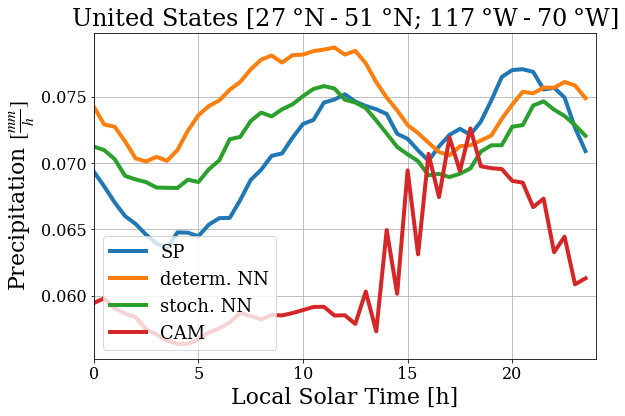

In [99]:
plt.figure(1,(9,6))

plt.title(r'United States [27$~$°N$~$-$~$51$~$°N; 117$~$°W$~$-$~$70$~$°W]',fontsize=24)

plt.plot(np.arange(0,24,0.5),SPCESM_US_mean,label='SP')
plt.plot(np.arange(0,24,0.5),ANN_CESM_US_mean,label='determ. NN')
plt.plot(np.arange(0,24,0.5),ANN_ens_CESM_US_mean,label='stoch. NN')
plt.plot(np.arange(0,24,0.5),ZM_CESM_US_mean,label='CAM')
plt.xlim(0,24)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=18,loc=3)
plt.ylabel(r'Precipitation $[\frac{mm}{h}]$',fontsize=22)
plt.xlabel('Local Solar Time [h]',fontsize=22)
plt.grid(True)


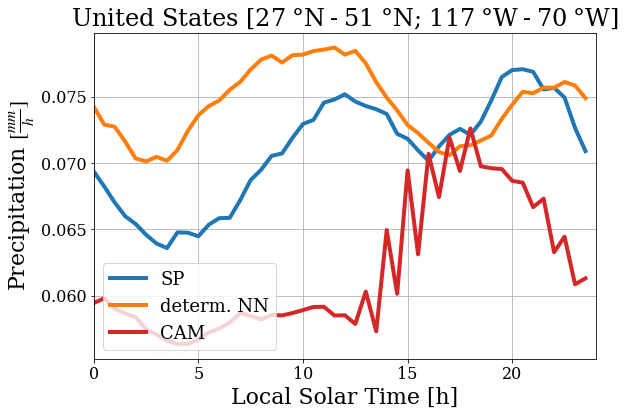

In [100]:
plt.figure(1,(9,6))

plt.title(r'United States [27$~$°N$~$-$~$51$~$°N; 117$~$°W$~$-$~$70$~$°W]',fontsize=24)

plt.plot(np.arange(0,24,0.5),SPCESM_US_mean,label='SP')
plt.plot(np.arange(0,24,0.5),ANN_CESM_US_mean,label='determ. NN')
#plt.plot(np.arange(0,24,0.5),ANN_ens_CESM_US_mean,label='stoch. NN')
plt.plot(np.arange(0,24,0.5),ZM_CESM_US_mean,label='CAM',color='#d62728')
plt.xlim(0,24)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=18,loc=3)
plt.ylabel(r'Precipitation $[\frac{mm}{h}]$',fontsize=22)
plt.xlabel('Local Solar Time [h]',fontsize=22)
plt.grid(True)


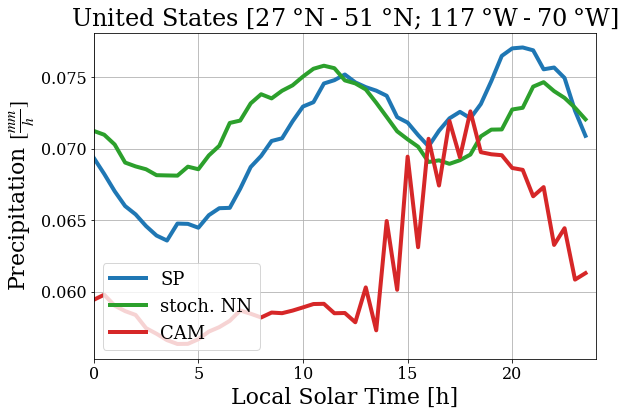

In [101]:
plt.figure(1,(9,6))

plt.title(r'United States [27$~$°N$~$-$~$51$~$°N; 117$~$°W$~$-$~$70$~$°W]',fontsize=24)

plt.plot(np.arange(0,24,0.5),SPCESM_US_mean,label='SP')
#plt.plot(np.arange(0,24,0.5),ANN_CESM_US_mean,label='determ. NN')
plt.plot(np.arange(0,24,0.5),ANN_ens_CESM_US_mean,label='stoch. NN',color='#2ca02c')
plt.plot(np.arange(0,24,0.5),ZM_CESM_US_mean,label='CAM',color='#d62728')
plt.xlim(0,24)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=18,loc=3)
plt.ylabel(r'Precipitation $[\frac{mm}{h}]$',fontsize=22)
plt.xlabel('Local Solar Time [h]',fontsize=22)
plt.grid(True)


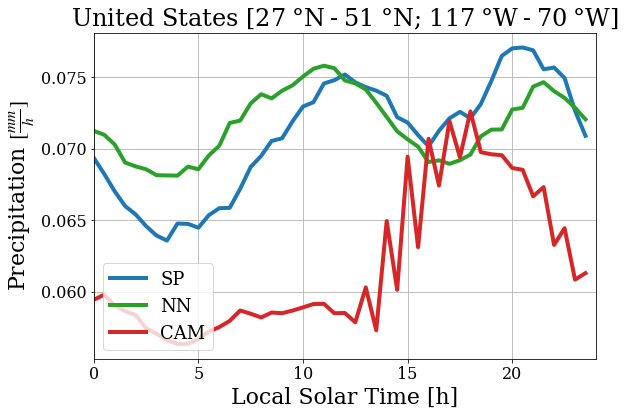

In [102]:
plt.figure(1,(9,6))

plt.title(r'United States [27$~$°N$~$-$~$51$~$°N; 117$~$°W$~$-$~$70$~$°W]',fontsize=24)

plt.plot(np.arange(0,24,0.5),SPCESM_US_mean,label='SP')
#plt.plot(np.arange(0,24,0.5),ANN_CESM_US_mean,label='determ. NN')
plt.plot(np.arange(0,24,0.5),ANN_ens_CESM_US_mean,label='NN',color='#2ca02c')
plt.plot(np.arange(0,24,0.5),ZM_CESM_US_mean,label='CAM',color='#d62728')
plt.xlim(0,24)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=18,loc=3)
plt.ylabel(r'Precipitation $[\frac{mm}{h}]$',fontsize=22)
plt.xlabel('Local Solar Time [h]',fontsize=22)
plt.grid(True)


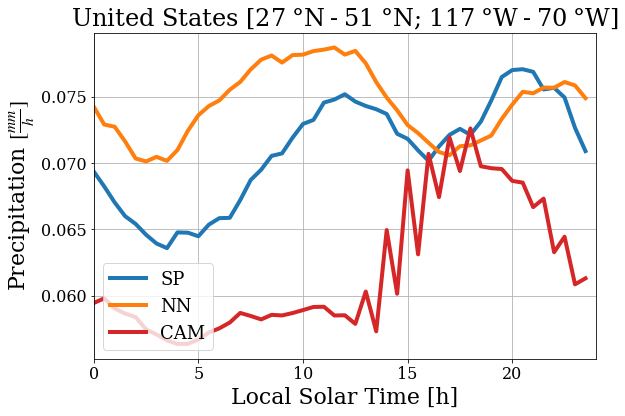

In [103]:
plt.figure(1,(9,6))

plt.title(r'United States [27$~$°N$~$-$~$51$~$°N; 117$~$°W$~$-$~$70$~$°W]',fontsize=24)

plt.plot(np.arange(0,24,0.5),SPCESM_US_mean,label='SP')
plt.plot(np.arange(0,24,0.5),ANN_CESM_US_mean,label='NN')
#plt.plot(np.arange(0,24,0.5),ANN_ens_CESM_US_mean,label='NN',color='#2ca02c')
plt.plot(np.arange(0,24,0.5),ZM_CESM_US_mean,label='CAM',color='#d62728')
plt.xlim(0,24)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=18,loc=3)
plt.ylabel(r'Precipitation $[\frac{mm}{h}]$',fontsize=22)
plt.xlabel('Local Solar Time [h]',fontsize=22)
plt.grid(True)


# Europe

In [104]:
EU_lat=np.where((lat>EU_lat_min)&(lat<EU_lat_max))[0]
EU_lon=np.where((lon>EU_lon_min)&(lon<EU_lon_max))[0]


In [105]:
SPCESM_EU_mean=np.mean(np.mean(SPCESM_the_mean_lst[:,EU_lat][:,:,EU_lon],2),1)
ANN_CESM_EU_mean=np.mean(np.mean(ANN_CESM_the_mean_lst[:,EU_lat][:,:,EU_lon],2),1)
ANN_ens_CESM_EU_mean=np.mean(np.mean(ANN_ens_CESM_the_mean_lst[:,EU_lat][:,:,EU_lon],2),1)
ZM_CESM_EU_mean=np.mean(np.mean(ZM_CESM_the_mean_lst[:,EU_lat][:,:,EU_lon],2),1)

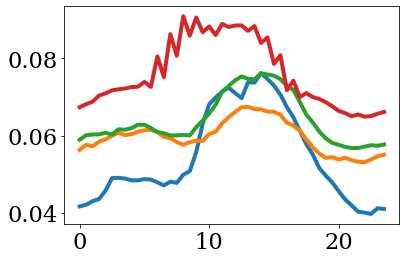

In [106]:
plt.plot(np.arange(0,24,0.5),SPCESM_EU_mean)
plt.plot(np.arange(0,24,0.5),ANN_CESM_EU_mean)
plt.plot(np.arange(0,24,0.5),ANN_ens_CESM_EU_mean)
plt.plot(np.arange(0,24,0.5),ZM_CESM_EU_mean)


# Amazonia

In [107]:
Amazon_lat=np.where((lat>Amazon_lat_min)&(lat<Amazon_lat_max))[0]
Amazon_lon=np.where((lon>Amazon_lon_min)&(lon<Amazon_lon_max))[0]


In [108]:
SPCESM_Amazon_mean=np.mean(np.mean(SPCESM_the_mean_lst[:,Amazon_lat][:,:,Amazon_lon],2),1)
ANN_CESM_Amazon_mean=np.mean(np.mean(ANN_CESM_the_mean_lst[:,Amazon_lat][:,:,Amazon_lon],2),1)
ANN_ens_CESM_Amazon_mean=np.mean(np.mean(ANN_ens_CESM_the_mean_lst[:,Amazon_lat][:,:,Amazon_lon],2),1)
ZM_CESM_Amazon_mean=np.mean(np.mean(ZM_CESM_the_mean_lst[:,Amazon_lat][:,:,Amazon_lon],2),1)

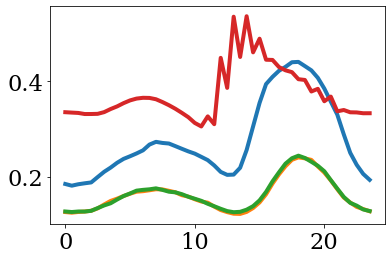

In [109]:
plt.plot(np.arange(0,24,0.5),SPCESM_Amazon_mean)
plt.plot(np.arange(0,24,0.5),ANN_CESM_Amazon_mean)
plt.plot(np.arange(0,24,0.5),ANN_ens_CESM_Amazon_mean)
plt.plot(np.arange(0,24,0.5),ZM_CESM_Amazon_mean)


# Tropical Africa

In [110]:
Africa_lat=np.where((lat>Africa_lat_min)&(lat<Africa_lat_max))[0]
Africa_lon=np.where((lon>Africa_lon_min)&(lon<Africa_lon_max))[0]


In [111]:
SPCESM_Africa_mean=np.mean(np.mean(SPCESM_the_mean_lst[:,Africa_lat][:,:,Africa_lon],2),1)
ANN_CESM_Africa_mean=np.mean(np.mean(ANN_CESM_the_mean_lst[:,Africa_lat][:,:,Africa_lon],2),1)
ANN_ens_CESM_Africa_mean=np.mean(np.mean(ANN_ens_CESM_the_mean_lst[:,Africa_lat][:,:,Africa_lon],2),1)
ZM_CESM_Africa_mean=np.mean(np.mean(ZM_CESM_the_mean_lst[:,Africa_lat][:,:,Africa_lon],2),1)

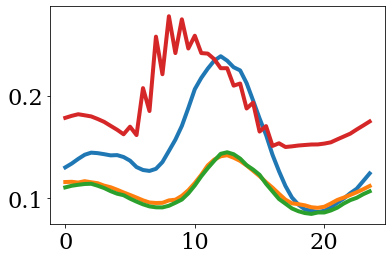

In [112]:
plt.plot(np.arange(0,24,0.5),SPCESM_Africa_mean)
plt.plot(np.arange(0,24,0.5),ANN_CESM_Africa_mean)
plt.plot(np.arange(0,24,0.5),ANN_ens_CESM_Africa_mean)
plt.plot(np.arange(0,24,0.5),ZM_CESM_Africa_mean)


# Southern Brazil

In [113]:
S_Brazil_lat=np.where((lat>S_Brazil_lat_min)&(lat<S_Brazil_lat_max))[0]
S_Brazil_lon=np.where((lon>S_Brazil_lon_min)&(lon<S_Brazil_lon_max))[0]


In [114]:
SPCESM_S_Brazil_mean=np.mean(np.mean(SPCESM_the_mean_lst[:,S_Brazil_lat][:,:,S_Brazil_lon],2),1)
ANN_CESM_S_Brazil_mean=np.mean(np.mean(ANN_CESM_the_mean_lst[:,S_Brazil_lat][:,:,S_Brazil_lon],2),1)
ANN_ens_CESM_S_Brazil_mean=np.mean(np.mean(ANN_ens_CESM_the_mean_lst[:,S_Brazil_lat][:,:,S_Brazil_lon],2),1)
ZM_CESM_S_Brazil_mean=np.mean(np.mean(ZM_CESM_the_mean_lst[:,S_Brazil_lat][:,:,S_Brazil_lon],2),1)

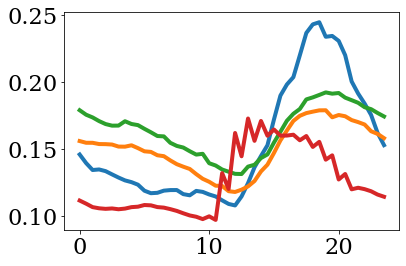

In [115]:
plt.plot(np.arange(0,24,0.5),SPCESM_S_Brazil_mean)
plt.plot(np.arange(0,24,0.5),ANN_CESM_S_Brazil_mean)
plt.plot(np.arange(0,24,0.5),ANN_ens_CESM_S_Brazil_mean)
plt.plot(np.arange(0,24,0.5),ZM_CESM_S_Brazil_mean)


# India

In [116]:
India_lat=np.where((lat>India_lat_min)&(lat<India_lat_max))[0]
India_lon=np.where((lon>India_lon_min)&(lon<India_lon_max))[0]


In [117]:
SPCESM_India_mean=np.mean(np.mean(SPCESM_the_mean_lst[:,India_lat][:,:,India_lon],2),1)
ANN_CESM_India_mean=np.mean(np.mean(ANN_CESM_the_mean_lst[:,India_lat][:,:,India_lon],2),1)
ANN_ens_CESM_India_mean=np.mean(np.mean(ANN_ens_CESM_the_mean_lst[:,India_lat][:,:,India_lon],2),1)
ZM_CESM_India_mean=np.mean(np.mean(ZM_CESM_the_mean_lst[:,India_lat][:,:,India_lon],2),1)

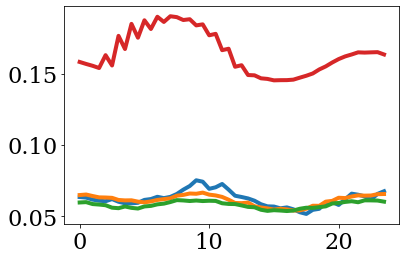

In [118]:
plt.plot(np.arange(0,24,0.5),SPCESM_India_mean)
plt.plot(np.arange(0,24,0.5),ANN_CESM_India_mean)
plt.plot(np.arange(0,24,0.5),ANN_ens_CESM_India_mean)
plt.plot(np.arange(0,24,0.5),ZM_CESM_India_mean)


# Sahel

In [119]:
Sahel_lat=np.where((lat>Sahel_lat_min)&(lat<Sahel_lat_max))[0]
Sahel_lon=np.where((lon>Sahel_lon_min)&(lon<Sahel_lon_max))[0]


In [120]:
SPCESM_Sahel_mean=np.mean(np.mean(SPCESM_the_mean_lst[:,Sahel_lat][:,:,Sahel_lon],2),1)
ANN_CESM_Sahel_mean=np.mean(np.mean(ANN_CESM_the_mean_lst[:,Sahel_lat][:,:,Sahel_lon],2),1)
ANN_ens_CESM_Sahel_mean=np.mean(np.mean(ANN_ens_CESM_the_mean_lst[:,Sahel_lat][:,:,Sahel_lon],2),1)
ZM_CESM_Sahel_mean=np.mean(np.mean(ZM_CESM_the_mean_lst[:,Sahel_lat][:,:,Sahel_lon],2),1)

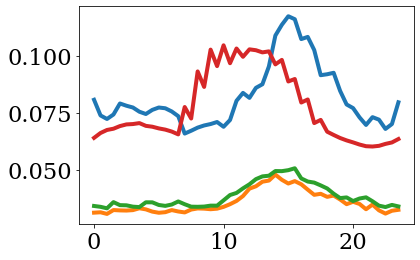

In [121]:
plt.plot(np.arange(0,24,0.5),SPCESM_Sahel_mean)
plt.plot(np.arange(0,24,0.5),ANN_CESM_Sahel_mean)
plt.plot(np.arange(0,24,0.5),ANN_ens_CESM_Sahel_mean)
plt.plot(np.arange(0,24,0.5),ZM_CESM_Sahel_mean)


# Bias over Sahara and Arab. peninsula

In [122]:
Sahara_Arab_lat=np.where((lat>Sahara_Arab_lat_min)&(lat<Sahara_Arab_lat_max))[0]
Sahara_Arab_lon=np.where((lon>Sahara_Arab_lon_min)|(lon<Sahara_Arab_lon_max))[0]


In [123]:
Sahara_Arab_lon

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21, 137, 138, 139, 140,
       141, 142, 143])

In [124]:
SPCESM_Sahara_Arab_mean=np.mean(np.mean(SPCESM_the_mean_lst[:,Sahara_Arab_lat][:,:,Sahara_Arab_lon],2),1)
ANN_CESM_Sahara_Arab_mean=np.mean(np.mean(ANN_CESM_the_mean_lst[:,Sahara_Arab_lat][:,:,Sahara_Arab_lon],2),1)
ANN_ens_CESM_Sahara_Arab_mean=np.mean(np.mean(ANN_ens_CESM_the_mean_lst[:,Sahara_Arab_lat][:,:,Sahara_Arab_lon],2),1)
ZM_CESM_Sahara_Arab_mean=np.mean(np.mean(ZM_CESM_the_mean_lst[:,Sahara_Arab_lat][:,:,Sahara_Arab_lon],2),1)

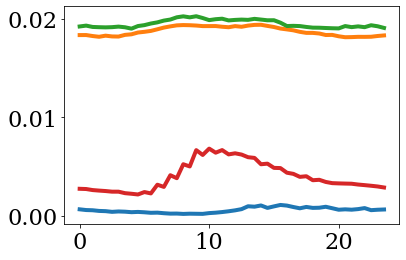

In [125]:
plt.plot(np.arange(0,24,0.5),SPCESM_Sahara_Arab_mean)
plt.plot(np.arange(0,24,0.5),ANN_CESM_Sahara_Arab_mean)
plt.plot(np.arange(0,24,0.5),ANN_ens_CESM_Sahara_Arab_mean)
plt.plot(np.arange(0,24,0.5),ZM_CESM_Sahara_Arab_mean)


In [126]:
Xvar.shape

(96, 144)

In [127]:
Yvar.shape

(96, 144)

In [128]:
precip_SP_ref.shape

(5759, 96, 144)

In [129]:
Sahara_Arab_lat

array([54, 55, 56, 57, 58, 59, 60, 61, 62, 63])

In [130]:
np.mean(precip_SP_ref[:,Sahara_Arab_lat][:,:,Sahara_Arab_lon],0)

array([[7.59643014e-03, 4.94468129e-03, 3.12992538e-03, 3.41036852e-03,
        5.37425315e-03, 1.31218205e-03, 7.74213405e-04, 3.61145196e-03,
        5.20530243e-03, 5.15661491e-03, 2.26634750e-03, 3.81585846e-03,
        4.89759912e-03, 1.77670292e-02, 2.05516944e-02, 1.06391902e-03,
        4.48354922e-04, 1.30700219e-05, 2.14356039e-04, 2.43012506e-04,
        1.42198777e-03, 1.32651566e-03, 1.05094652e-03, 8.15263082e-04,
        3.22407307e-03, 8.13095535e-03, 4.24586148e-03, 7.98658716e-03,
        6.82871347e-03],
       [9.56184356e-04, 1.43389080e-03, 6.31471966e-04, 7.59360702e-04,
        3.20972790e-05, 1.94507635e-05, 8.07459699e-05, 1.23428875e-04,
        8.27426173e-06, 2.41712359e-05, 3.64562344e-08, 1.63539279e-06,
        1.54915187e-04, 9.10099816e-04, 4.23713165e-03, 1.45330258e-04,
        1.12315035e-05, 0.00000000e+00, 3.30920289e-04, 1.09416808e-06,
        1.67890681e-05, 2.65349613e-04, 1.69352580e-04, 1.57740874e-03,
        7.85027424e-04, 1.08522696e-03,

In [134]:
vmax0_Sahara=0.1
seism_diff_Sahara,norm_seism_Sahara_=color_map_personalizer(21,vmin0_median,vmax0_Sahara,'Blues')

Text(0.52, 0.92, 'Mean Precipitation over Sahara area')

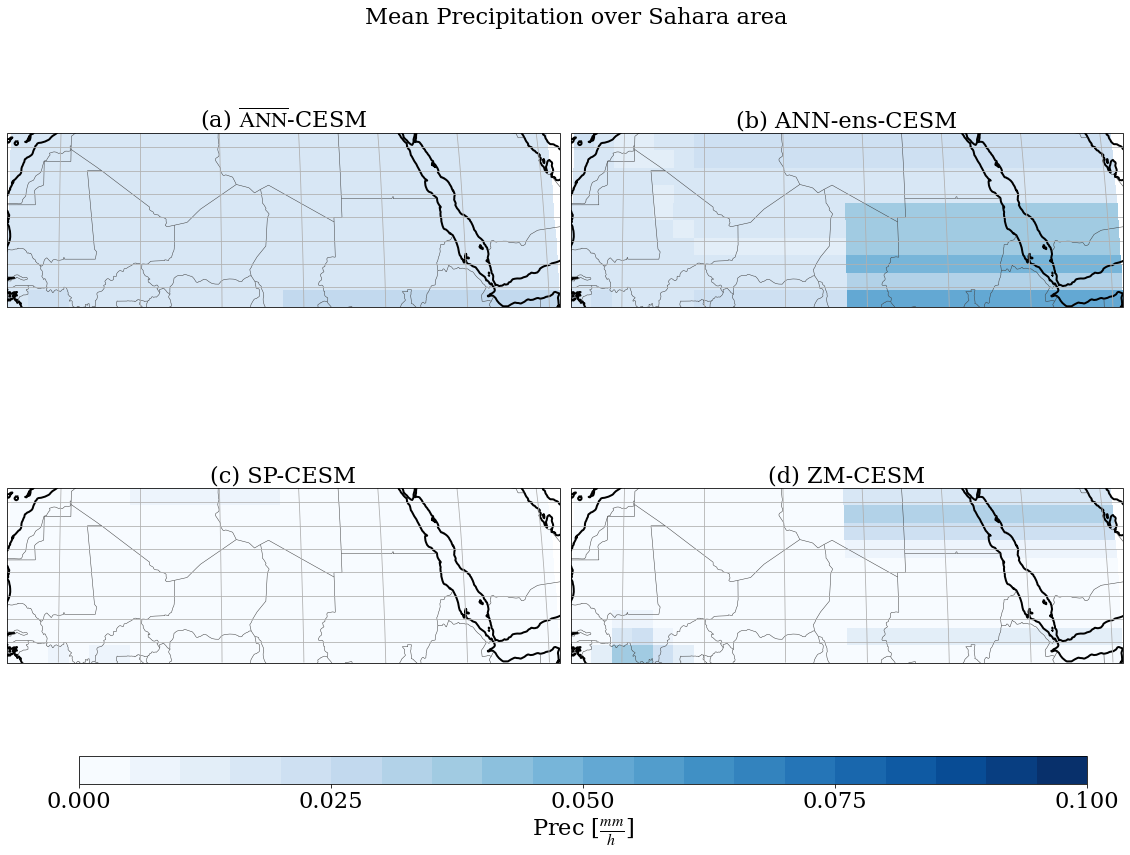

In [135]:
fig, ax = plt.subplots(2,2,subplot_kw={'projection':ccrs.Robinson(central_longitude=0)})
fig.set_size_inches(20,13)

contour_plot = ax[1,0].pcolormesh(lon[Sahara_Arab_lon], lat[Sahara_Arab_lat],
                                  np.mean(precip_SP_ref[:,Sahara_Arab_lat][:,:,Sahara_Arab_lon],0),
                                  cmap=seism_diff_Sahara, norm=norm_seism_Sahara_, transform=ccrs.PlateCarree())
ax[1,0].set_title('(c) SP-CESM', fontsize = fz)
ax[1,0].coastlines(linewidth=2.0,edgecolor='0.25')
ax[1,0].gridlines()
ax[1,0].add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')



contour_plot = ax[1,1].pcolormesh(lon[Sahara_Arab_lon], lat[Sahara_Arab_lat],
                                  np.mean(precip_ANN_ctrl_CESM_Feb_June[:,Sahara_Arab_lat][:,:,Sahara_Arab_lon],0),
                                  cmap=seism_diff_Sahara, norm=norm_seism_Sahara_, transform=ccrs.PlateCarree())
ax[1,1].set_title('(d) ZM-CESM', fontsize = fz)
ax[1,1].coastlines(linewidth=2.0,edgecolor='0.25')
ax[1,1].gridlines()
ax[1,1].add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')


contour_plot = ax[0,0].pcolormesh(lon[Sahara_Arab_lon], lat[Sahara_Arab_lat],
                                  np.mean(precip_ANN_i_CESM_Feb_June[:,Sahara_Arab_lat][:,:,Sahara_Arab_lon],0),
                                  cmap=seism_diff_Sahara, norm=norm_seism_Sahara_, transform=ccrs.PlateCarree())
ax[0,0].set_title(r'(a) $\mathrm{\overline{ANN}}$-CESM', fontsize = fz)
ax[0,0].coastlines(linewidth=2.0,edgecolor='0.25')
ax[0,0].gridlines()
ax[0,0].add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')


contour_plot = ax[0,1].pcolormesh(lon[Sahara_Arab_lon], lat[Sahara_Arab_lat],
                                  np.mean(precip_ANN_ens_CESM_Feb_June[:,Sahara_Arab_lat][:,:,Sahara_Arab_lon],0),
                                  cmap=seism_diff_Sahara, norm=norm_seism_Sahara_, transform=ccrs.PlateCarree())
ax[0,1].set_title(r'(b) ANN-ens-CESM', fontsize = fz)
ax[0,1].coastlines(linewidth=2.0,edgecolor='0.25')
ax[0,1].gridlines()
ax[0,1].add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')



p0 = ax[0,0].get_position().get_points().flatten()
p1 = ax[1,1].get_position().get_points().flatten()
ax_cbar = fig.add_axes([p0[0]+0.05, 0.09, p1[2]-0.20, 0.03])
plt.colorbar(contour_plot, cax=ax_cbar,ticks=np.arange(0,0.11,0.025), orientation='horizontal', label=r"Prec [$\frac{mm}{h}$]")
plt.subplots_adjust(hspace=0.01, wspace=0.02)
plt.suptitle("Mean Precipitation over Sahara area", y=0.92, x=0.52, fontsize = fz)



Text(0.52, 0.92, 'Std Precipitation over Sahara area')

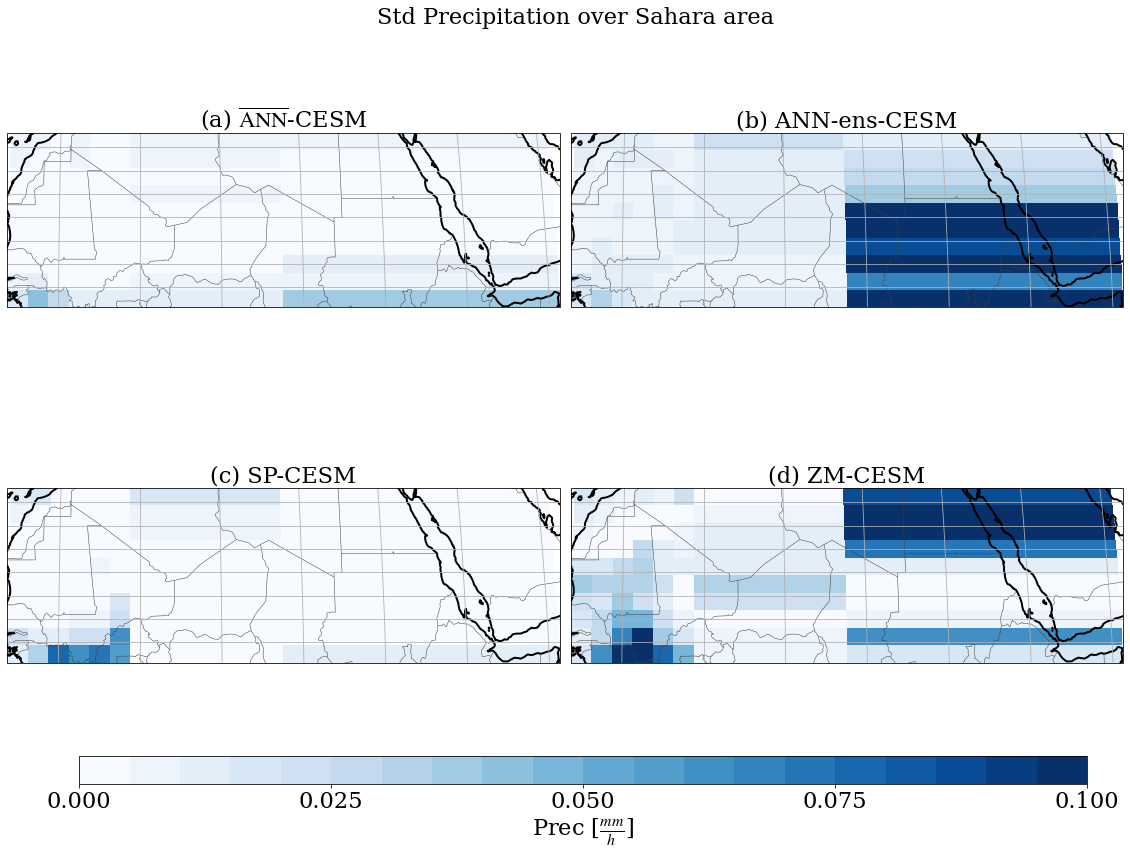

In [137]:
fig, ax = plt.subplots(2,2,subplot_kw={'projection':ccrs.Robinson(central_longitude=0)})
fig.set_size_inches(20,13)

contour_plot = ax[1,0].pcolormesh(lon[Sahara_Arab_lon], lat[Sahara_Arab_lat],
                                  np.std(precip_SP_ref[:,Sahara_Arab_lat][:,:,Sahara_Arab_lon],0),
                                  cmap=seism_diff_Sahara, norm=norm_seism_Sahara_, transform=ccrs.PlateCarree())
ax[1,0].set_title('(c) SP-CESM', fontsize = fz)
ax[1,0].coastlines(linewidth=2.0,edgecolor='0.25')
ax[1,0].gridlines()
ax[1,0].add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')



contour_plot = ax[1,1].pcolormesh(lon[Sahara_Arab_lon], lat[Sahara_Arab_lat],
                                  np.std(precip_ANN_ctrl_CESM_Feb_June[:,Sahara_Arab_lat][:,:,Sahara_Arab_lon],0),
                                  cmap=seism_diff_Sahara, norm=norm_seism_Sahara_, transform=ccrs.PlateCarree())
ax[1,1].set_title('(d) ZM-CESM', fontsize = fz)
ax[1,1].coastlines(linewidth=2.0,edgecolor='0.25')
ax[1,1].gridlines()
ax[1,1].add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')


contour_plot = ax[0,0].pcolormesh(lon[Sahara_Arab_lon], lat[Sahara_Arab_lat],
                                  np.std(precip_ANN_i_CESM_Feb_June[:,Sahara_Arab_lat][:,:,Sahara_Arab_lon],0),
                                  cmap=seism_diff_Sahara, norm=norm_seism_Sahara_, transform=ccrs.PlateCarree())
ax[0,0].set_title(r'(a) $\mathrm{\overline{ANN}}$-CESM', fontsize = fz)
ax[0,0].coastlines(linewidth=2.0,edgecolor='0.25')
ax[0,0].gridlines()
ax[0,0].add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')


contour_plot = ax[0,1].pcolormesh(lon[Sahara_Arab_lon], lat[Sahara_Arab_lat],
                                  np.std(precip_ANN_ens_CESM_Feb_June[:,Sahara_Arab_lat][:,:,Sahara_Arab_lon],0),
                                  cmap=seism_diff_Sahara, norm=norm_seism_Sahara_, transform=ccrs.PlateCarree())
ax[0,1].set_title(r'(b) ANN-ens-CESM', fontsize = fz)
ax[0,1].coastlines(linewidth=2.0,edgecolor='0.25')
ax[0,1].gridlines()
ax[0,1].add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')



p0 = ax[0,0].get_position().get_points().flatten()
p1 = ax[1,1].get_position().get_points().flatten()
ax_cbar = fig.add_axes([p0[0]+0.05, 0.09, p1[2]-0.20, 0.03])
plt.colorbar(contour_plot, cax=ax_cbar,ticks=np.arange(0,0.11,0.025), orientation='horizontal', label=r"Prec [$\frac{mm}{h}$]")
plt.subplots_adjust(hspace=0.01, wspace=0.02)
plt.suptitle("Std Precipitation over Sahara area", y=0.92, x=0.52, fontsize = fz)



# Western ITCZ region over Pacific

In [131]:
ITCZ_west_lat=np.where((lat>ITCZ_west_lat_min)&(lat<ITCZ_west_lat_max))[0]
ITCZ_west_lon=np.where((lon>ITCZ_west_lon_min)&(lon<ITCZ_west_lon_max))[0]


In [132]:
SPCESM_ITCZ_west_mean=np.mean(np.mean(SPCESM_the_mean_lst[:,ITCZ_west_lat][:,:,ITCZ_west_lon],2),1)
ANN_CESM_ITCZ_west_mean=np.mean(np.mean(ANN_CESM_the_mean_lst[:,ITCZ_west_lat][:,:,ITCZ_west_lon],2),1)
ANN_ens_CESM_ITCZ_west_mean=np.mean(np.mean(ANN_ens_CESM_the_mean_lst[:,ITCZ_west_lat][:,:,ITCZ_west_lon],2),1)
ZM_CESM_ITCZ_west_mean=np.mean(np.mean(ZM_CESM_the_mean_lst[:,ITCZ_west_lat][:,:,ITCZ_west_lon],2),1)

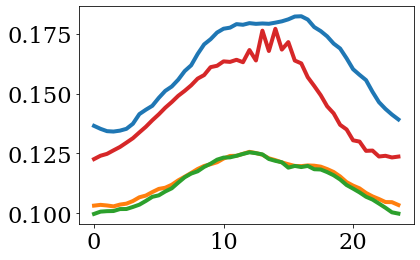

In [133]:
plt.plot(np.arange(0,24,0.5),SPCESM_ITCZ_west_mean)
plt.plot(np.arange(0,24,0.5),ANN_CESM_ITCZ_west_mean)
plt.plot(np.arange(0,24,0.5),ANN_ens_CESM_ITCZ_west_mean)
plt.plot(np.arange(0,24,0.5),ZM_CESM_ITCZ_west_mean)


# Eastern ITCZ region over Pacific

In [134]:
ITCZ_east_lat=np.where((lat>ITCZ_east_lat_min)&(lat<ITCZ_east_lat_max))[0]
ITCZ_east_lon=np.where((lon>ITCZ_east_lon_min)&(lon<ITCZ_east_lon_max))[0]


In [135]:
SPCESM_ITCZ_east_mean=np.mean(np.mean(SPCESM_the_mean_lst[:,ITCZ_east_lat][:,:,ITCZ_east_lon],2),1)
ANN_CESM_ITCZ_east_mean=np.mean(np.mean(ANN_CESM_the_mean_lst[:,ITCZ_east_lat][:,:,ITCZ_east_lon],2),1)
ANN_ens_CESM_ITCZ_east_mean=np.mean(np.mean(ANN_ens_CESM_the_mean_lst[:,ITCZ_east_lat][:,:,ITCZ_east_lon],2),1)
ZM_CESM_ITCZ_east_mean=np.mean(np.mean(ZM_CESM_the_mean_lst[:,ITCZ_east_lat][:,:,ITCZ_east_lon],2),1)

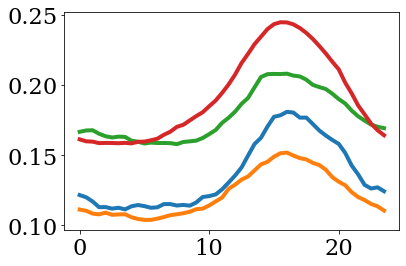

In [136]:
plt.plot(np.arange(0,24,0.5),SPCESM_ITCZ_east_mean)
plt.plot(np.arange(0,24,0.5),ANN_CESM_ITCZ_east_mean)
plt.plot(np.arange(0,24,0.5),ANN_ens_CESM_ITCZ_east_mean)
plt.plot(np.arange(0,24,0.5),ZM_CESM_ITCZ_east_mean)


# Double ITCZ region

In [137]:
Pacific_lat=np.where((lat>Pacific_lat_min)&(lat<Pacific_lat_max))[0]
Pacific_lon=np.where((lon>Pacific_lon_min)&(lon<Pacific_lon_max))[0]


In [138]:
SPCESM_Pacific_mean=np.mean(np.mean(SPCESM_the_mean_lst[:,Pacific_lat][:,:,Pacific_lon],2),1)
ANN_CESM_Pacific_mean=np.mean(np.mean(ANN_CESM_the_mean_lst[:,Pacific_lat][:,:,Pacific_lon],2),1)
ANN_ens_CESM_Pacific_mean=np.mean(np.mean(ANN_ens_CESM_the_mean_lst[:,Pacific_lat][:,:,Pacific_lon],2),1)
ZM_CESM_Pacific_mean=np.mean(np.mean(ZM_CESM_the_mean_lst[:,Pacific_lat][:,:,Pacific_lon],2),1)

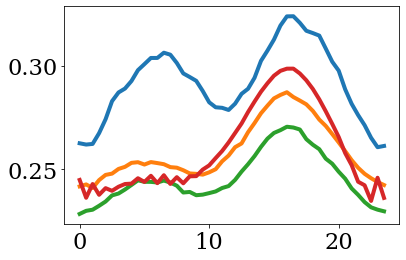

In [139]:
plt.plot(np.arange(0,24,0.5),SPCESM_Pacific_mean)
plt.plot(np.arange(0,24,0.5),ANN_CESM_Pacific_mean)
plt.plot(np.arange(0,24,0.5),ANN_ens_CESM_Pacific_mean)
plt.plot(np.arange(0,24,0.5),ZM_CESM_Pacific_mean)


# Australia

In [140]:
Australia_lat=np.where((lat>Australia_lat_min)&(lat<Australia_lat_max))[0]
Australia_lon=np.where((lon>Australia_lon_min)&(lon<Australia_lon_max))[0]


In [141]:
SPCESM_Australia_mean=np.mean(np.mean(SPCESM_the_mean_lst[:,Australia_lat][:,:,Australia_lon],2),1)
ANN_CESM_Australia_mean=np.mean(np.mean(ANN_CESM_the_mean_lst[:,Australia_lat][:,:,Australia_lon],2),1)
ANN_ens_CESM_Australia_mean=np.mean(np.mean(ANN_ens_CESM_the_mean_lst[:,Australia_lat][:,:,Australia_lon],2),1)
ZM_CESM_Australia_mean=np.mean(np.mean(ZM_CESM_the_mean_lst[:,Australia_lat][:,:,Australia_lon],2),1)

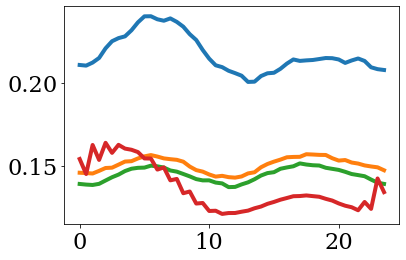

In [142]:
plt.plot(np.arange(0,24,0.5),SPCESM_Australia_mean)
plt.plot(np.arange(0,24,0.5),ANN_CESM_Australia_mean)
plt.plot(np.arange(0,24,0.5),ANN_ens_CESM_Australia_mean)
plt.plot(np.arange(0,24,0.5),ZM_CESM_Australia_mean)


# Tropical Indian Ocean 

In [143]:
Ind_Oc_lat=np.where((lat>Ind_Oc_lat_min)&(lat<Ind_Oc_lat_max))[0]
Ind_Oc_lon=np.where((lon>Ind_Oc_lon_min)&(lon<Ind_Oc_lon_max))[0]


In [144]:
SPCESM_Ind_Oc_mean=np.mean(np.mean(SPCESM_the_mean_lst[:,Ind_Oc_lat][:,:,Ind_Oc_lon],2),1)
ANN_CESM_Ind_Oc_mean=np.mean(np.mean(ANN_CESM_the_mean_lst[:,Ind_Oc_lat][:,:,Ind_Oc_lon],2),1)
ANN_ens_CESM_Ind_Oc_mean=np.mean(np.mean(ANN_ens_CESM_the_mean_lst[:,Ind_Oc_lat][:,:,Ind_Oc_lon],2),1)
ZM_CESM_Ind_Oc_mean=np.mean(np.mean(ZM_CESM_the_mean_lst[:,Ind_Oc_lat][:,:,Ind_Oc_lon],2),1)

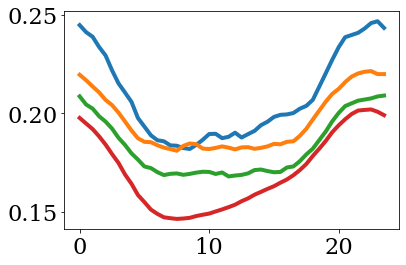

In [145]:
plt.plot(np.arange(0,24,0.5),SPCESM_Ind_Oc_mean)
plt.plot(np.arange(0,24,0.5),ANN_CESM_Ind_Oc_mean)
plt.plot(np.arange(0,24,0.5),ANN_ens_CESM_Ind_Oc_mean)
plt.plot(np.arange(0,24,0.5),ZM_CESM_Ind_Oc_mean)


# Southern Africa

In [146]:
S_Africa_lat=np.where((lat>S_Africa_lat_min)&(lat<S_Africa_lat_max))[0]
S_Africa_lon=np.where((lon>S_Africa_lon_min)&(lon<S_Africa_lon_max))[0]


In [147]:
SPCESM_S_Africa_mean=np.mean(np.mean(SPCESM_the_mean_lst[:,S_Africa_lat][:,:,S_Africa_lon],2),1)
ANN_CESM_S_Africa_mean=np.mean(np.mean(ANN_CESM_the_mean_lst[:,S_Africa_lat][:,:,S_Africa_lon],2),1)
ANN_ens_CESM_S_Africa_mean=np.mean(np.mean(ANN_ens_CESM_the_mean_lst[:,S_Africa_lat][:,:,S_Africa_lon],2),1)
ZM_CESM_S_Africa_mean=np.mean(np.mean(ZM_CESM_the_mean_lst[:,S_Africa_lat][:,:,S_Africa_lon],2),1)

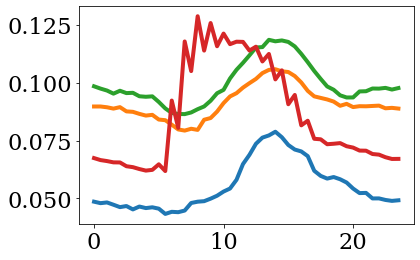

In [148]:
plt.plot(np.arange(0,24,0.5),SPCESM_S_Africa_mean)
plt.plot(np.arange(0,24,0.5),ANN_CESM_S_Africa_mean)
plt.plot(np.arange(0,24,0.5),ANN_ens_CESM_S_Africa_mean)
plt.plot(np.arange(0,24,0.5),ZM_CESM_S_Africa_mean)


In [3]:
# plot selected regions together 

Text(0.5, 0, 'Local Solar Time LST')

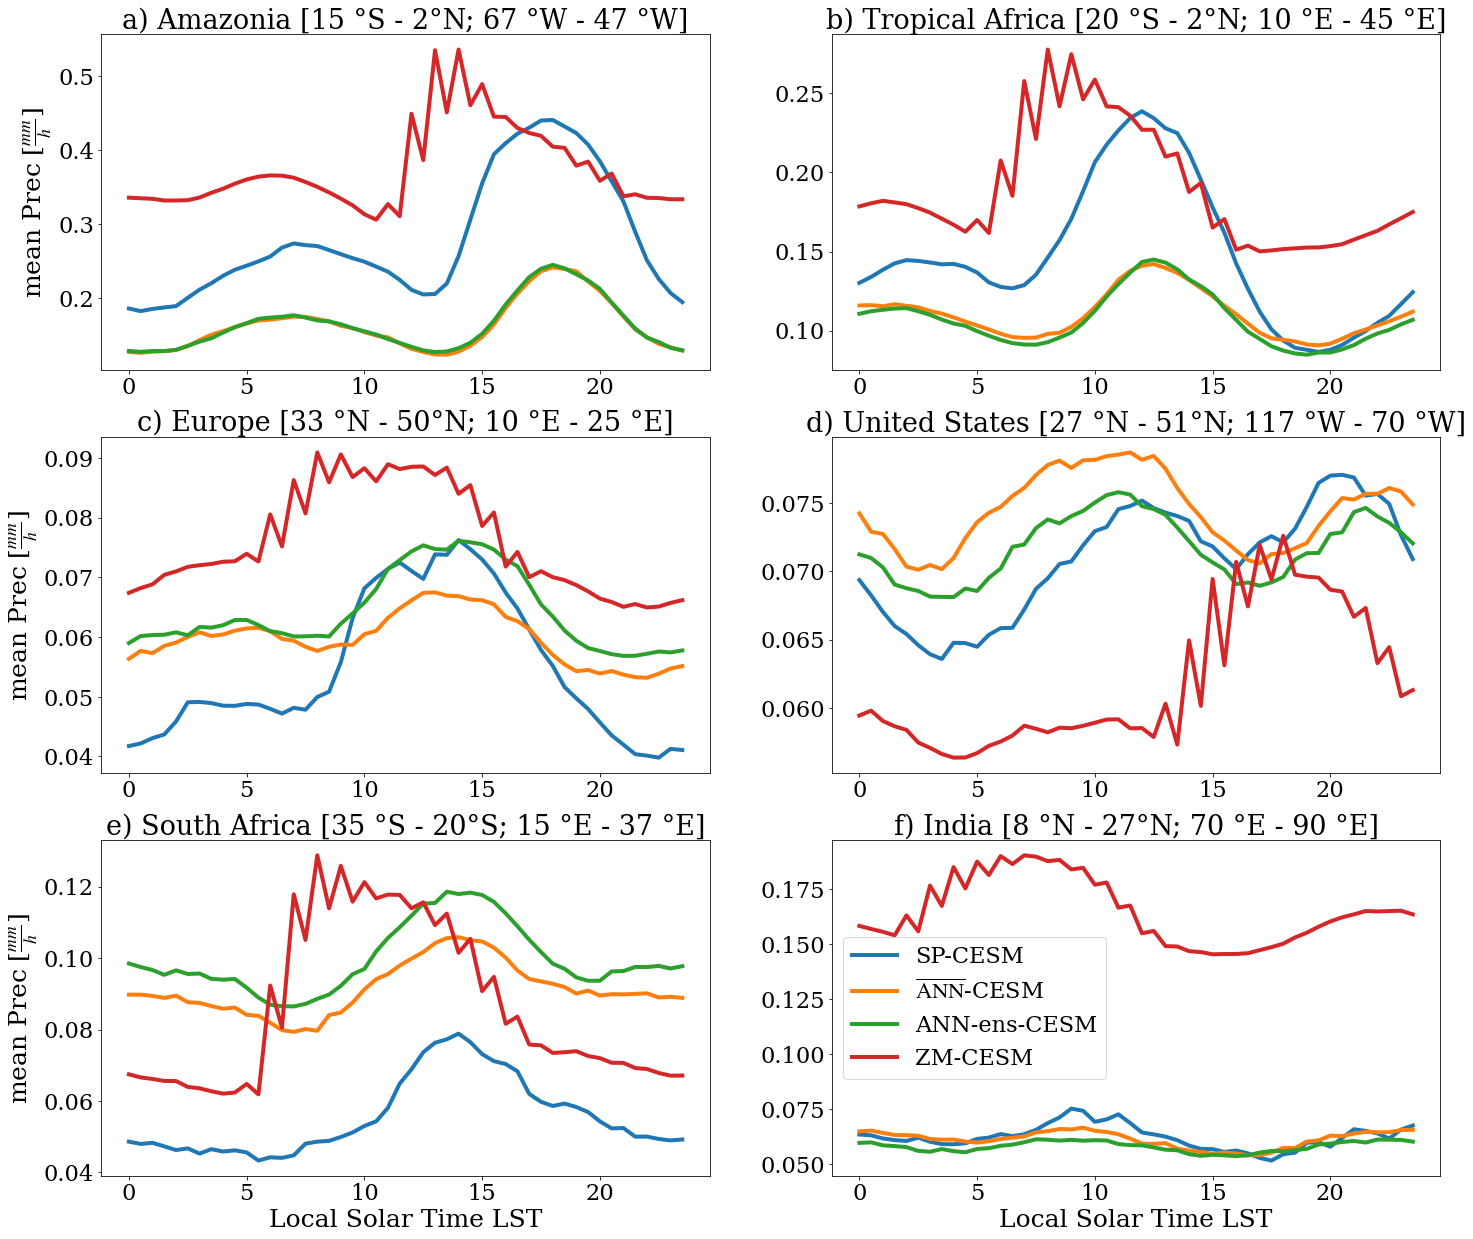

In [130]:
plt.figure(53,(24,21))
plt.subplot(3,2,1)
plt.title('a) Amazonia [15 °S - 2°N; 67 °W - 47 °W]')
plt.plot(np.arange(0,24,0.5),SPCESM_Amazon_mean)
plt.plot(np.arange(0,24,0.5),ANN_CESM_Amazon_mean)
plt.plot(np.arange(0,24,0.5),ANN_ens_CESM_Amazon_mean)
plt.plot(np.arange(0,24,0.5),ZM_CESM_Amazon_mean)
plt.ylabel(r'mean Prec [$\frac{mm}{h}$]',fontsize=25)

plt.subplot(3,2,2)
plt.title('b) Tropical Africa [20 °S - 2°N; 10 °E - 45 °E]')
plt.plot(np.arange(0,24,0.5),SPCESM_Africa_mean)
plt.plot(np.arange(0,24,0.5),ANN_CESM_Africa_mean)
plt.plot(np.arange(0,24,0.5),ANN_ens_CESM_Africa_mean)
plt.plot(np.arange(0,24,0.5),ZM_CESM_Africa_mean)

plt.subplot(3,2,3)
plt.title('c) Europe [33 °N - 50°N; 10 °E - 25 °E]')
plt.plot(np.arange(0,24,0.5),SPCESM_EU_mean)
plt.plot(np.arange(0,24,0.5),ANN_CESM_EU_mean)
plt.plot(np.arange(0,24,0.5),ANN_ens_CESM_EU_mean)
plt.plot(np.arange(0,24,0.5),ZM_CESM_EU_mean)
plt.ylabel(r'mean Prec [$\frac{mm}{h}$]',fontsize=25)

plt.subplot(3,2,4)
plt.title('d) United States [27 °N - 51°N; 117 °W - 70 °W]')
plt.plot(np.arange(0,24,0.5),SPCESM_US_mean)
plt.plot(np.arange(0,24,0.5),ANN_CESM_US_mean)
plt.plot(np.arange(0,24,0.5),ANN_ens_CESM_US_mean)
plt.plot(np.arange(0,24,0.5),ZM_CESM_US_mean)

plt.subplot(3,2,5)
plt.title('e) South Africa [35 °S - 20°S; 15 °E - 37 °E]')
plt.plot(np.arange(0,24,0.5),SPCESM_S_Africa_mean)
plt.plot(np.arange(0,24,0.5),ANN_CESM_S_Africa_mean)
plt.plot(np.arange(0,24,0.5),ANN_ens_CESM_S_Africa_mean)
plt.plot(np.arange(0,24,0.5),ZM_CESM_S_Africa_mean)
plt.ylabel(r'mean Prec [$\frac{mm}{h}$]',fontsize=25)
plt.xlabel('Local Solar Time LST',fontsize=25)

plt.subplot(3,2,6)
plt.title('f) India [8 °N - 27°N; 70 °E - 90 °E]')
plt.plot(np.arange(0,24,0.5),SPCESM_India_mean,label='SP-CESM')
plt.plot(np.arange(0,24,0.5),ANN_CESM_India_mean,label=r'$\mathrm{\overline{ANN}}$-CESM')
plt.plot(np.arange(0,24,0.5),ANN_ens_CESM_India_mean,label='ANN-ens-CESM')
plt.plot(np.arange(0,24,0.5),ZM_CESM_India_mean,label='ZM-CESM')
plt.legend()
plt.xlabel('Local Solar Time LST',fontsize=25)



Text(0.5, 0, 'Local Solar Time LST')

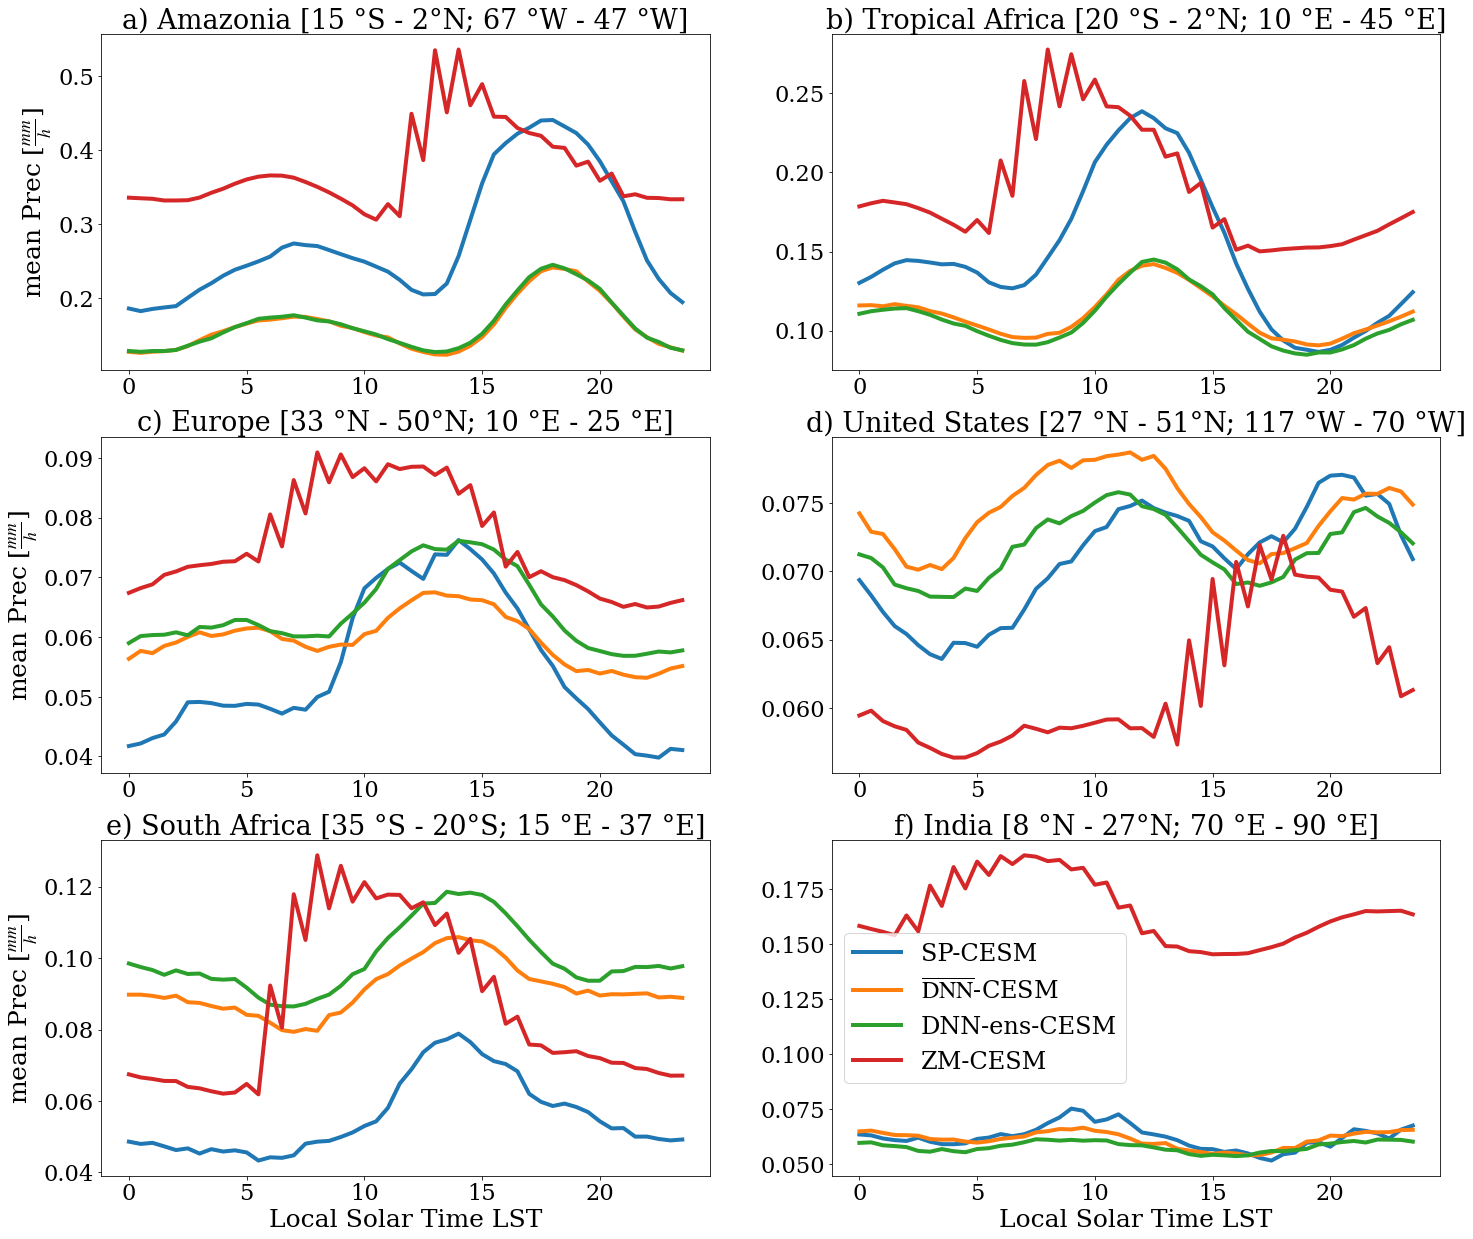

In [152]:
plt.figure(53,(24,21))
plt.subplot(3,2,1)
plt.title('a) Amazonia [15 °S - 2°N; 67 °W - 47 °W]')
plt.plot(np.arange(0,24,0.5),SPCESM_Amazon_mean)
plt.plot(np.arange(0,24,0.5),ANN_CESM_Amazon_mean)
plt.plot(np.arange(0,24,0.5),ANN_ens_CESM_Amazon_mean)
plt.plot(np.arange(0,24,0.5),ZM_CESM_Amazon_mean)
plt.ylabel(r'mean Prec [$\frac{mm}{h}$]',fontsize=25)

plt.subplot(3,2,2)
plt.title('b) Tropical Africa [20 °S - 2°N; 10 °E - 45 °E]')
plt.plot(np.arange(0,24,0.5),SPCESM_Africa_mean)
plt.plot(np.arange(0,24,0.5),ANN_CESM_Africa_mean)
plt.plot(np.arange(0,24,0.5),ANN_ens_CESM_Africa_mean)
plt.plot(np.arange(0,24,0.5),ZM_CESM_Africa_mean)

plt.subplot(3,2,3)
plt.title('c) Europe [33 °N - 50°N; 10 °E - 25 °E]')
plt.plot(np.arange(0,24,0.5),SPCESM_EU_mean)
plt.plot(np.arange(0,24,0.5),ANN_CESM_EU_mean)
plt.plot(np.arange(0,24,0.5),ANN_ens_CESM_EU_mean)
plt.plot(np.arange(0,24,0.5),ZM_CESM_EU_mean)
plt.ylabel(r'mean Prec [$\frac{mm}{h}$]',fontsize=25)

plt.subplot(3,2,4)
plt.title('d) United States [27 °N - 51°N; 117 °W - 70 °W]')
plt.plot(np.arange(0,24,0.5),SPCESM_US_mean)
plt.plot(np.arange(0,24,0.5),ANN_CESM_US_mean)
plt.plot(np.arange(0,24,0.5),ANN_ens_CESM_US_mean)
plt.plot(np.arange(0,24,0.5),ZM_CESM_US_mean)

plt.subplot(3,2,5)
plt.title('e) South Africa [35 °S - 20°S; 15 °E - 37 °E]')
plt.plot(np.arange(0,24,0.5),SPCESM_S_Africa_mean)
plt.plot(np.arange(0,24,0.5),ANN_CESM_S_Africa_mean)
plt.plot(np.arange(0,24,0.5),ANN_ens_CESM_S_Africa_mean)
plt.plot(np.arange(0,24,0.5),ZM_CESM_S_Africa_mean)
plt.ylabel(r'mean Prec [$\frac{mm}{h}$]',fontsize=25)
plt.xlabel('Local Solar Time LST',fontsize=25)

plt.subplot(3,2,6)
plt.title('f) India [8 °N - 27°N; 70 °E - 90 °E]')
plt.plot(np.arange(0,24,0.5),SPCESM_India_mean,label='SP-CESM')
plt.plot(np.arange(0,24,0.5),ANN_CESM_India_mean,label=r'$\mathrm{\overline{DNN}}$-CESM')
plt.plot(np.arange(0,24,0.5),ANN_ens_CESM_India_mean,label='DNN-ens-CESM')
plt.plot(np.arange(0,24,0.5),ZM_CESM_India_mean,label='ZM-CESM')
plt.legend(fontsize=24)
plt.xlabel('Local Solar Time LST',fontsize=25)



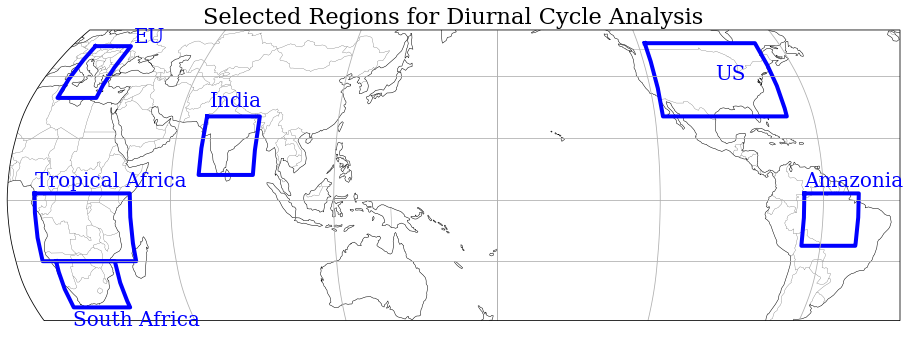

In [200]:
fig, ax = plt.subplots(1,1,subplot_kw={'projection':ccrs.Robinson(central_longitude=180)})
fig.set_size_inches(16,9)


ax.coastlines(linewidth=0.5,edgecolor='0.75')

ax.plot([US_lon_min,US_lon_max,US_lon_max,US_lon_min,US_lon_min],[US_lat_max,US_lat_max,US_lat_min,US_lat_min,US_lat_max],
        'b',transform=ccrs.PlateCarree())
ax.text(np.mean([US_lon_min,US_lon_max]),np.mean([US_lat_min,US_lat_max]),s='US',fontsize=20,color='b',transform=ccrs.PlateCarree())
ax.plot([EU_lon_min,EU_lon_max,EU_lon_max,EU_lon_min,EU_lon_min],[EU_lat_max,EU_lat_max,EU_lat_min,EU_lat_min,EU_lat_max],
        'b',transform=ccrs.PlateCarree())
ax.text(np.max([EU_lon_min,EU_lon_max]),np.max([EU_lat_min,EU_lat_max])+1,
        s='EU',fontsize=20,color='b',transform=ccrs.PlateCarree())

ax.plot([Amazon_lon_min,Amazon_lon_max,Amazon_lon_max,Amazon_lon_min,Amazon_lon_min],
        [Amazon_lat_max,Amazon_lat_max,Amazon_lat_min,Amazon_lat_min,Amazon_lat_max],
        'b',transform=ccrs.PlateCarree())
ax.text(np.min([Amazon_lon_min,Amazon_lon_max]),np.max([Amazon_lat_min,Amazon_lat_max])+2,
        s='Amazonia',fontsize=20,color='b',transform=ccrs.PlateCarree())



ax.plot([Africa_lon_min,Africa_lon_max,Africa_lon_max,Africa_lon_min,Africa_lon_min],
        [Africa_lat_max,Africa_lat_max,Africa_lat_min,Africa_lat_min,Africa_lat_max],
        'b',transform=ccrs.PlateCarree())

ax.text(np.min([Africa_lon_min,Africa_lon_max]),np.max([Amazon_lat_min,Amazon_lat_max])+2,
        s='Tropical Africa',fontsize=20,color='b',transform=ccrs.PlateCarree())

ax.plot([S_Africa_lon_min,S_Africa_lon_max,S_Africa_lon_max,S_Africa_lon_min,S_Africa_lon_min],
        [S_Africa_lat_max,S_Africa_lat_max,S_Africa_lat_min,S_Africa_lat_min,S_Africa_lat_max],
        'b',transform=ccrs.PlateCarree())

ax.text(np.min([Africa_lon_min,Africa_lon_max]),np.min([S_Africa_lat_min,S_Africa_lat_max])-6,
        s='South Africa',fontsize=20,color='b',transform=ccrs.PlateCarree())


ax.plot([India_lon_min,India_lon_max,India_lon_max,India_lon_min,India_lon_min],
        [India_lat_max,India_lat_max,India_lat_min,India_lat_min,India_lat_max],
        'b',transform=ccrs.PlateCarree())

ax.text(np.min([India_lon_min,India_lon_max]),np.max([India_lat_min,India_lat_max])+3,
        s='India',fontsize=20,color='b',transform=ccrs.PlateCarree())



ax.set_title('Selected Regions for Diurnal Cycle Analysis', fontsize = fz)
ax.gridlines()
ax.add_feature(cfeature.BORDERS,linewidth=0.25,edgecolor='0.25')


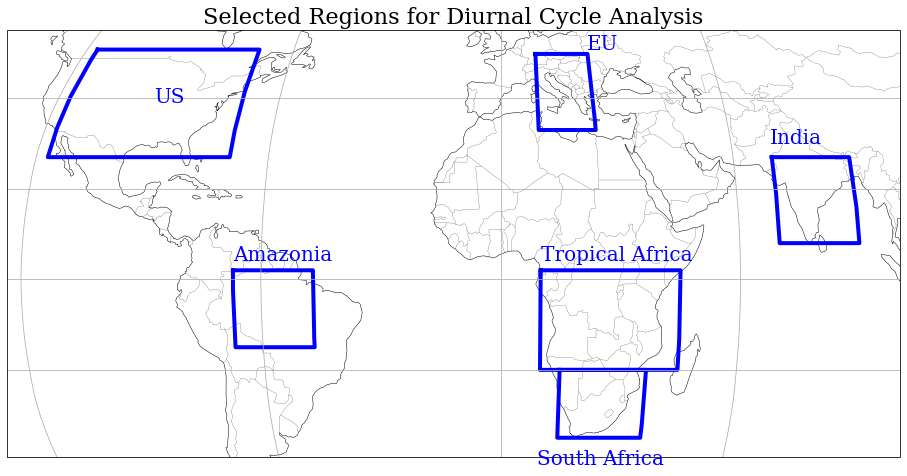

In [131]:
fig, ax = plt.subplots(1,1,subplot_kw={'projection':ccrs.Robinson(central_longitude=0)})
fig.set_size_inches(16,9)


ax.coastlines(linewidth=0.5,edgecolor='0.75')

ax.plot([US_lon_min,US_lon_max,US_lon_max,US_lon_min,US_lon_min],[US_lat_max,US_lat_max,US_lat_min,US_lat_min,US_lat_max],
        'b',transform=ccrs.PlateCarree())
ax.text(np.mean([US_lon_min,US_lon_max]),np.mean([US_lat_min,US_lat_max]),s='US',fontsize=20,color='b',transform=ccrs.PlateCarree())
ax.plot([EU_lon_min,EU_lon_max,EU_lon_max,EU_lon_min,EU_lon_min],[EU_lat_max,EU_lat_max,EU_lat_min,EU_lat_min,EU_lat_max],
        'b',transform=ccrs.PlateCarree())
ax.text(np.max([EU_lon_min,EU_lon_max]),np.max([EU_lat_min,EU_lat_max])+1,
        s='EU',fontsize=20,color='b',transform=ccrs.PlateCarree())

ax.plot([Amazon_lon_min,Amazon_lon_max,Amazon_lon_max,Amazon_lon_min,Amazon_lon_min],
        [Amazon_lat_max,Amazon_lat_max,Amazon_lat_min,Amazon_lat_min,Amazon_lat_max],
        'b',transform=ccrs.PlateCarree())
ax.text(np.min([Amazon_lon_min,Amazon_lon_max]),np.max([Amazon_lat_min,Amazon_lat_max])+2,
        s='Amazonia',fontsize=20,color='b',transform=ccrs.PlateCarree())



ax.plot([Africa_lon_min,Africa_lon_max,Africa_lon_max,Africa_lon_min,Africa_lon_min],
        [Africa_lat_max,Africa_lat_max,Africa_lat_min,Africa_lat_min,Africa_lat_max],
        'b',transform=ccrs.PlateCarree())

ax.text(np.min([Africa_lon_min,Africa_lon_max]),np.max([Amazon_lat_min,Amazon_lat_max])+2,
        s='Tropical Africa',fontsize=20,color='b',transform=ccrs.PlateCarree())

ax.plot([S_Africa_lon_min,S_Africa_lon_max,S_Africa_lon_max,S_Africa_lon_min,S_Africa_lon_min],
        [S_Africa_lat_max,S_Africa_lat_max,S_Africa_lat_min,S_Africa_lat_min,S_Africa_lat_max],
        'b',transform=ccrs.PlateCarree())

ax.text(np.min([Africa_lon_min,Africa_lon_max]),np.min([S_Africa_lat_min,S_Africa_lat_max])-6,
        s='South Africa',fontsize=20,color='b',transform=ccrs.PlateCarree())


ax.plot([India_lon_min,India_lon_max,India_lon_max,India_lon_min,India_lon_min],
        [India_lat_max,India_lat_max,India_lat_min,India_lat_min,India_lat_max],
        'b',transform=ccrs.PlateCarree())

ax.text(np.min([India_lon_min,India_lon_max]),np.max([India_lat_min,India_lat_max])+3,
        s='India',fontsize=20,color='b',transform=ccrs.PlateCarree())



ax.set_title('Selected Regions for Diurnal Cycle Analysis', fontsize = fz)
ax.gridlines()
ax.add_feature(cfeature.BORDERS,linewidth=0.25,edgecolor='0.25')
